# Classificação

## Avaliação de Modelos Classificação:

KS, Gini, AUC, F1, Recall, Precision 

1. **Recall**:

    A taxa de verdadeiro positivo (TPR, na sigla em inglês), ou a proporção de todos os positivos reais que foram classificados corretamente como positivos, também é conhecida como recall:
    $$\text{Recall: } \frac{TP}{TP + FN}$$
    
    Falsos negativos são positivos reais que foram classificados incorretamente como negativos, por isso aparecem no denominador. No exemplo de classificação de spam, a recuperação mede a fração de e-mails de spam que foram corretamente classificados como spam. É por isso que outro nome para o recall é probabilidade de detecção: ele responde à pergunta "Que fração de e-mails de spam é detectada por esse modelo?".

    Um modelo hipotético perfeito teria zero falsos negativos e, portanto, um recall (TPR, na sigla em inglês) de 1,0, ou seja, uma taxa de detecção de 100%.

    Em um conjunto de dados desequilibrado em que o número de positivos reais é muito baixo, digamos de um a dois exemplos no total, a precisão é menos significativa e menos útil como métrica.

    ---

2. **Taxa de Falso positivo (FPR)**:

    A taxa de falso positivo (FPR, na sigla em inglês) é a proporção de todos os negativos reais que foram classificados incorretamente como positivos, também conhecida como probabilidade de alarme falso. Ela é definida matematicamente como:
    $$\text{FPR: } \frac{FP}{FP + TN}$$

    Falsos positivos são verdadeiros negativos que foram classificados incorretamente, e é por isso que aparecem no denominador. No exemplo de classificação de spam, a FPR mede a fração de e-mails legítimos que foram classificados incorretamente como spam ou a taxa de alarmes falsos do modelo.

    Um modelo perfeito teria zero falsos positivos e, portanto, uma FPR de 0,0, ou seja, uma taxa de alarme falso de 0%.

    Em um conjunto de dados desequilibrado em que o número de negativos reais é muito baixo, digamos de um a dois exemplos no total, a FPR é menos significativa e menos útil como métrica.

    ---

3. **Precision**:

    A precisão é a proporção de todas as classificações positivas do modelo que são realmente positivas. Ela é matematicamente definida como:
    $$\text{Precision: } \frac{TP}{TP + FP}$$

    No exemplo de classificação de spam, a precisão mede a fração de e-mails classificados como spam que realmente eram spam.

    Um modelo perfeito hipotético teria zero falsos positivos e, portanto, uma precisão de 1,0.

    Em um conjunto de dados desequilibrado em que o número de positivos reais é muito baixo (por exemplo, de um a dois exemplos no total), a precisão é menos significativa e menos útil como métrica.

    A precisão melhora à medida que os falsos positivos diminuem, enquanto o recall melhora quando os falsos negativos diminuem. No entanto, como visto na seção anterior, aumentar o limiar de classificação tende a diminuir o número de falsos positivos e aumentar o número de falsos negativos, enquanto diminuir o limiar tem os efeitos opostos. Como resultado, a precisão e o recall geralmente mostram uma relação inversa, em que melhorar um deles piora o outro.

---

4. **F1-score**:

    A pontuação F1 é a média harmônica (um tipo de média) de precisão e recall.

    $$\text{F1-score} = 2*\frac{\text{Precisão * Recall}}{\text{Precisão + Recall}} = \frac{2TP}{2TP + FP + FN}$$

    Essa métrica equilibra a importância da precisão e do recall e é preferível à acurácia de conjuntos de dados desbalanceados. Quando a precisão e o recall têm pontuações perfeitas de 1,0, a F1 também terá uma pontuação perfeita de 1,0. De forma mais ampla, quando a precisão e o recall têm valores próximos, a F1 fica próxima do valor deles. Quando a precisão e o recall estiverem distantes, F1 será semelhante à métrica pior.


![{7056EF0E-99FB-4D27-A7DE-A794CACB9B9D}.png](attachment:{7056EF0E-99FB-4D27-A7DE-A794CACB9B9D}.png)

**Resumo - Quando usar**

1.  **Acurárcia**:

    Use como um indicador aproximado do progresso/convergência de treinamento do modelo para conjuntos de dados equilibrados.

    Para a performance do modelo, use apenas em combinação com outras métricas.

    Evite conjuntos de dados desequilibrados. Considere usar outra métrica.

2. **Recall**:

    Use quando os falsos negativos forem mais caros do que os falsos positivos.

3. **Taxa de Falso Positivo**:

	Use quando os falsos positivos forem mais caros do que os falsos negativos.

4. **Precisão**:

    Use quando for muito importante que as previsões positivas sejam precisas.


**KS**

O teste KS representa o teste de Kolmogorov-Smirnov, que compara as duas distribuições cumulativas e retorna a diferença máxima entre elas. É um teste não paramétrico, o que significa que você não precisa testar nenhuma suposição relacionada à distribuição de dados.

No teste KS, a hipótese nula afirma que ambas as distribuições cumulativas são semelhantes. Rejeitar a hipótese nula significa que as distribuições cumulativas são diferentes.

Na ciência de dados, ele compara a distribuição cumulativa de eventos e não eventos e KS é onde há uma diferença máxima entre as duas distribuições. Em palavras simples, isso nos ajuda a entender o quão bem nosso modelo preditivo é capaz de discriminar entre eventos e não eventos.

Exemplo: Suponha que você esteja construindo um modelo de propensão no qual o objetivo é identificar clientes em potencial que provavelmente comprarão um produto específico. Nesse caso, a variável dependente (alvo) está na forma binária, que tem apenas dois resultados: 0 (Não evento) ou 1 (Evento). "Evento" significa pessoas que compraram o produto. "Não evento" refere-se a pessoas que não compraram o produto. A estatística do teste KS mede se o modelo é capaz de distinguir entre clientes em potencial e não clientes em potencial.

**Método**:
- Você precisa ter duas variáveis antes de calcular KS. Uma é a variável dependente que deve ser binária. A segunda é a pontuação de probabilidade prevista, gerada a partir do modelo estatístico.
- Crie decis com base em colunas de probabilidade previstas, o que significa dividir a probabilidade em 10 partes. O primeiro decil deve conter a pontuação de probabilidade mais alta.
- Calcule a % cumulativa de eventos e não eventos em cada decil e, em seguida, calcule a diferença entre essas duas distribuições cumulativas.
- KS é onde a diferença é máxima
- Se o KS estiver no decil top 3 e pontuar acima de 40, é considerado um bom modelo preditivo. Ao mesmo tempo, é importante validar o modelo verificando outras métricas de desempenho também para confirmar que o modelo não está sofrendo de problemas de sobreajuste.

In [ ]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False, observed=False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    # print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

grouped = data.groupby('bucket', as_index = False)

## 1. Árvore de Decisão

### Introdução

Árvores de decisão são um método de aprendizado **supervisionado** e **não parametricos** utilizado em estatísticas, mineração de dados e aprendizado de máquina. Esses modelos são representações gráficas que permitem predizer ou classificar dados com base em observações. Existem dois tipos principais de árvores de decisão: árvores de classificação, que trabalham com variáveis de valores discretos e cujas folhas indicam rótulos de classe; e árvores de regressão, que lidam com variáveis de valores contínuos, como números reais, e podem ser estendidas para outros tipos de objetos com dissimilaridades.

Uma das principais vantagens das árvores de decisão é sua simplicidade e inteligibilidade, o que as torna amplamente utilizadas em tarefas como análise de decisão e mineração de dados. Elas não apenas descrevem os dados, mas também podem servir como base para a tomada de decisões. Por sua versatilidade, são extremamente populares em aprendizado de máquina e representam visualmente a lógica por trás de decisões e predições. Além disso, suas aplicações abrangem diversas áreas, oferecendo soluções claras e fáceis de interpretar.

![image.png](attachment:image.png)

![image.png](attachment:image.png)

**Ideia Geral**:

1. Árvore é construída de maneira top-down, recursivamente e usando a ideia de dividir para conquistar;
2. Testa atributo por atributo, qual melhor separa as classes do target
3. Repita para cada partição criada
4. Condições de para:
    - Todos os exemplos para um dado nó pertencem à mesma classe;
    - Não existem mais atributos para continuar o *particionamento*;

**Entropia x Gini**

![image.png](attachment:image.png)

**Entropia**:

1. Permite medir a *informação* fornecida por cada atributo;
2. Caracteriza a impureza de um conjunto de exemplos. Para um nó da árvore do **p** exemplos *positivos*, **n** exemplos *negativos*, $p_i$ a proporção de cada classe temos:

$$\text{entropia} : \sum_{i = 1}^{c}(-p_i \log_2{p_i})$$

- Para **c** sendo o número de classes.

exemplos:

$$
\begin{array}{|l|l|l|l|l|}
\hline
\textbf{ID registro}  & \textbf{Cabelo} & \textbf{Peso} & \textbf{Idade} & \textbf{Classe}  \\ \hline
\text{Homer}          & \text{0"}       & 250           &  36            & \textbf{M} \\ \hline
\text{Marge}          & \text{10"}       & 150           &  34            & \textbf{F} \\ \hline
\text{Bart}          & \text{2"}       & 90           &  10            & \textbf{M} \\ \hline
\text{Lisa}          & \text{6"}       & 78           &  8            & \textbf{F} \\ \hline
\text{Maggie}          & \text{4"}       & 20           &  1            & \textbf{F} \\ \hline
\text{Abe}          & \text{1"}       & 170           &  70            & \textbf{M} \\ \hline
\text{Selma}          & \text{8"}       & 160           &  41            & \textbf{F} \\ \hline
\text{Otto}          & \text{10"}       & 180           &  38            & \textbf{M} \\ \hline
\text{Krusty}          & \text{6"}       & 200           &  45            & \textbf{M} \\ \hline
\end{array}
$$

1. Classes: Total = 9, F = 4 e M = 5. Então a entropia inicial $\text{Entropia(4F,5M)} = -\frac{4}{9} \log_2{\frac{4}{9}} - \frac{5}{9} \log_2{\frac{5}{9}} = 0.9911$

2. Para Cabelo < 5, temos Entropia:
    - $Entropia(3F,2M) = -\frac{3}{5} \log_2{\frac{3}{5}} - \frac{2}{5} \log_2{\frac{2}{5}}  = 0.9710$
    - $Entropia(1F,3M) = -\frac{1}{4} \log_2{\frac{1}{4}} - \frac{3}{4} \log_2{\frac{3}{4}}  = 0.8113$

3. Ganho de Informação - GI (Cabelo $\leq$ 5) = $0.9911 - (\frac{4}{9} * 0.8113 + \frac{5}{9} * 0.9710) = 0.0911$

Repetir para todos as variáveis e ver qual tem maior ganho de informação.


**Gini**:

O Índice de Gini é uma medida de impureza que avalia a probabilidade de um item escolhido aleatoriamente ser classificado incorretamente, caso seja atribuído ao nó de maneira aleatória e independente, seguindo a distribuição dos rótulos no conjunto. Ele atinge seu valor mínimo, ($Gini = 0$), quando o nó é puro, ou seja, todos os elementos pertencem a uma única categoria ou classe alvo. Formula dada por:
$$\text{Gini(D)} = 1 - \sum_{i=1}^{c} p_i^2 $$

Onde:
- $p_i$ : Proporção de elementos da classe $i$ no conjunto $D$
- $c$ : Número de total de classes

1. Grupo 1: cabelo $\leq 5$, temos Gini:
    - $Gini_{\text{Grupo 1}} = 1 - \left( \left(\frac{3}{5}\right)^2 + \left(\frac{2}{5}\right)^2 \right) = 0.48$
2. Grupo 2: Cabelo > 5, temos:
    - $Gini_{\text{Grupo 2}} = 1 - \left( \left(\frac{1}{2}\right)^2 + \left(\frac{1}{2}\right)^2 \right)  = 0.5$
3. Gini ponderado:
    - $Gini_{\text{total}} = \frac{\text{registros no Grupo 1}}{\text{total de registros}} \cdot Gini_{\text{Grupo 1}} + \frac{\text{registros no Grupo 2}}{\text{total de registros}} \cdot Gini_{\text{Grupo 2}}$
    - $  Gini_{\text{total}} = \frac{5}{9} \cdot 0.48 + \frac{4}{9} \cdot 0.5 = 0.4889$

4. Conclusão:
    - O índice de Gini total para a divisão baseada em ( Cabelo $\leq$ 5 ) é aproximadamente 0.4889. Esse valor pode ser comparado com outras divisões para determinar a melhor separação dos dados. 

**Gini x Entropia**:

  A escolha entre Gini, entropia e ganho de informação depende do problema:

  - Gini: Mais rápido de calcular e eficiente em problemas de classificação com classes balanceadas.
  - Entropia: Preferidos quando há classes altamente desbalanceadas, pois a entropia captura melhor as mudanças na distribuição

A diferença é pequena, podendo encontrar a melhor através na busca de melhor hiperparametros. 

1. **Pré-poda**:
    - Interrompe o crescimento da árvore com base em critérios como o número mínimo de amostras por nó ou a profundidade máxima da árvore. Isso impede que a árvore se torne muito complexa e se ajuste excessivamente aos dados de treinamento.
2. **Pós-poda**:
    - Remove ramos que têm pouco poder preditivo após a árvore ser totalmente construída. A poda é feita usando validação cruzada para determinar quais ramos devem ser removidos, melhorando a capacidade de generalização do modelo.

**Vantagens**

- **Fácil de entender e interpretar:** As pessoas conseguem compreender os modelos de árvores de decisão após uma breve explicação. Além disso, as árvores podem ser exibidas graficamente de forma que seja fácil para não especialistas interpretarem.

- **Capacidade de lidar com dados numéricos e categóricos:** Diferentes técnicas geralmente se especializam em conjuntos de dados com um único tipo de variável. As árvores de decisão, especialmente versões mais recentes como C4.5, podem lidar com variáveis categóricas e numéricas.

- **Pouca necessidade de preparação de dados:** Outras técnicas frequentemente exigem normalização dos dados. As árvores de decisão conseguem trabalhar com preditores qualitativos sem a necessidade de criar variáveis fictícias.

- **Modelo de caixa branca:** Se uma situação é observável em um modelo, sua explicação pode ser facilmente entendida usando lógica booleana. Em contraste, modelos de "caixa preta" têm explicações dos resultados mais difíceis de compreender, como acontece com redes neurais artificiais.

- **Possibilidade de validação estatística:** Isso permite avaliar a confiabilidade do modelo.

- **Abordagem não paramétrica:** Não faz suposições sobre os dados de treinamento ou os resíduos de previsão, como distribuição, independência ou variância constante.

- **Bom desempenho com grandes conjuntos de dados:** Grandes quantidades de dados podem ser analisadas usando recursos computacionais padrão em um tempo razoável.

- **Alta precisão com modelagem flexível:** Métodos aplicados a pesquisas em saúde, por exemplo, podem apresentar maior precisão.

- **Aproxima-se da tomada de decisão humana:** É útil para modelar decisões ou comportamentos humanos.

- **Robusto contra colinearidade:** Particularmente em métodos como boosting.

- **Seleção de atributos embutida:** Atributos irrelevantes são menos utilizados e podem ser eliminados em execuções subsequentes. A hierarquia de atributos em uma árvore de decisão reflete sua importância, com os mais informativos posicionados no topo.

- **Capacidade de aproximar funções booleanas:** Por exemplo, funções XOR.

**Limitações**

- **Sensibilidade aos dados de treinamento:** Árvores de decisão podem ser pouco robustas. Uma pequena alteração nos dados de treinamento pode causar grandes mudanças na estrutura da árvore e, consequentemente, nas predições finais.  

- **Complexidade de aprendizado:** O problema de encontrar uma árvore de decisão ótima é classificado como NP-completo em vários aspectos de otimização, mesmo para conceitos simples. Por isso, algoritmos práticos de aprendizado de árvores de decisão utilizam heurísticas, como o algoritmo guloso, que toma decisões localmente ótimas em cada nó. Esses algoritmos não garantem a obtenção de uma árvore de decisão globalmente ótima. Métodos como a árvore de distância de informação dual (DID) foram propostos para reduzir os efeitos locais de otimalidade.  

- **Risco de overfitting:** Árvores de decisão podem se tornar excessivamente complexas, não generalizando bem para dados fora do conjunto de treinamento. Mecanismos como a poda são necessários para evitar esse problema, exceto em alguns algoritmos, como a abordagem de Inferência Condicional, que não requer poda.  

- **Profundidade média da árvore:** A profundidade média da árvore, definida pelo número de nós ou testes até a classificação, não é garantida como mínima ou pequena sob diferentes critérios de divisão.  

- **Tendência em variáveis categóricas:** Para dados com variáveis categóricas com diferentes números de níveis, o ganho de informação é tendencioso a favor de atributos com mais níveis. Para mitigar esse problema, pode-se escolher o atributo com a maior razão de ganho de informação entre aqueles cujo ganho de informação é maior que a média. Alternativamente, abordagens como Inferência Condicional, métodos em duas etapas ou seleção de atributos adaptativa podem ser utilizadas para evitar essa tendência.

**Resumo**:
1. Algoritmo Guloso
2. Algoritmo Não parametro
3. Algoritmo condicional no esquema grafo aciclico
4. Outliers não impactam
5. Não é um algoritmo de instância
6. Na teoria, funciona com variáveis númericos e categóricos
7. Não obrigatório ter a mesma escala os dados.
8. Gini mais eficiente do que Entropia
9. Custo Logaritmo $O(\log(n_samples))$
10. Baixo vies (ajusta bem aos dados de treinamento) e alta variancia(pequena alteração no train pode mudar toda a árvore)
11. Sofre com dados desbalanceados. 
12. Pré-poda
    - max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes, min_impurity_decrease
13. Pos poda:
    - ccp_alpha: quando maior valor penaliza árvores mais complexas.
14. Principais variaveis para hiperparâmetros:
    - criterion, splitter, pré poda, max_features, ccp_alpha

### Aplicação Sklearn

<div style="text-align: center;">
    <iframe type="text/html" src="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier" width="90%" height="500" style="text-align: center; border: solid; border-radius: 10px">
</div>

### Python

#### Kfold - Árvore

Média da Precisão: 0.8762594898785221
Média do Recall: 0.8880000000000001
Média do AUC: 0.881
Média do Gini: 0.762


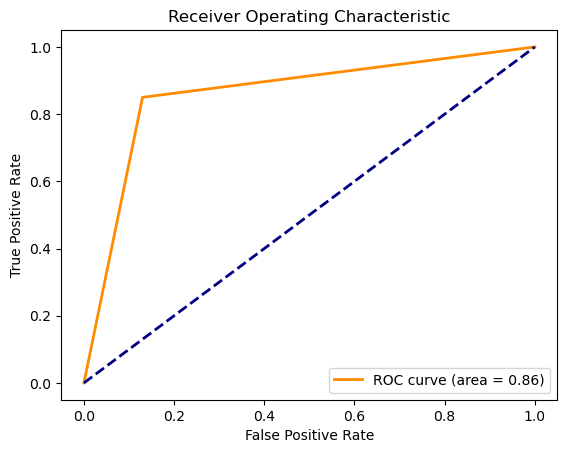

In [ ]:
from sklearn.datasets import load_iris, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve, log_loss
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


# Criando um conjunto de dados fictício
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=42)
# Transformando em DataFrame para melhor visualização
# X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])


# Configurar o k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar métricas
conf_matrices = []
precisions = []
recalls = []
aucs = []
ginis = []

# Loop pelos folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Treinar o modelo
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Previsões
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    
    # Matriz de confusão
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Precisão e recall
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
    # AUC e Gini
    auc_score = roc_auc_score(y_test, y_proba[:, 1])
    aucs.append(auc_score)
    ginis.append(2 * auc_score - 1)

# Exibir métricas médias
print("Média da Precisão:", np.mean(precisions))
print("Média do Recall:", np.mean(recalls))
print("Média do AUC:", np.mean(aucs))
print("Média do Gini:", np.mean(ginis))

# Plotar a curva ROC do último fold
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Fazer a função para o intervalo de validação cruzada

def intervalo(results , metodo):
    mean = np.mean(results)
    dv = np.std(results)
    print('{} média: {:.2f}%'.format(metodo,mean*100))
    print('Intervalo de {}: [{:.2f}% ~ {:.2f}%]'
           .format(metodo, (mean - 2*dv)*100, (mean + 2*dv)*100))


In [ ]:
intervalo(precisions, 'Precisão')
print('')
intervalo(recalls, 'Recall')
print('')
intervalo(aucs, 'AUC')
print('')
intervalo(ginis, 'Gini')
print('')


Precisão média: 87.63%
Intervalo de Precisão: [81.30% ~ 93.95%]

Recall média: 88.80%
Intervalo de Recall: [81.38% ~ 96.22%]

AUC média: 88.10%
Intervalo de AUC: [82.29% ~ 93.91%]

Gini média: 76.20%
Intervalo de Gini: [64.58% ~ 87.82%]



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.87      0.85      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



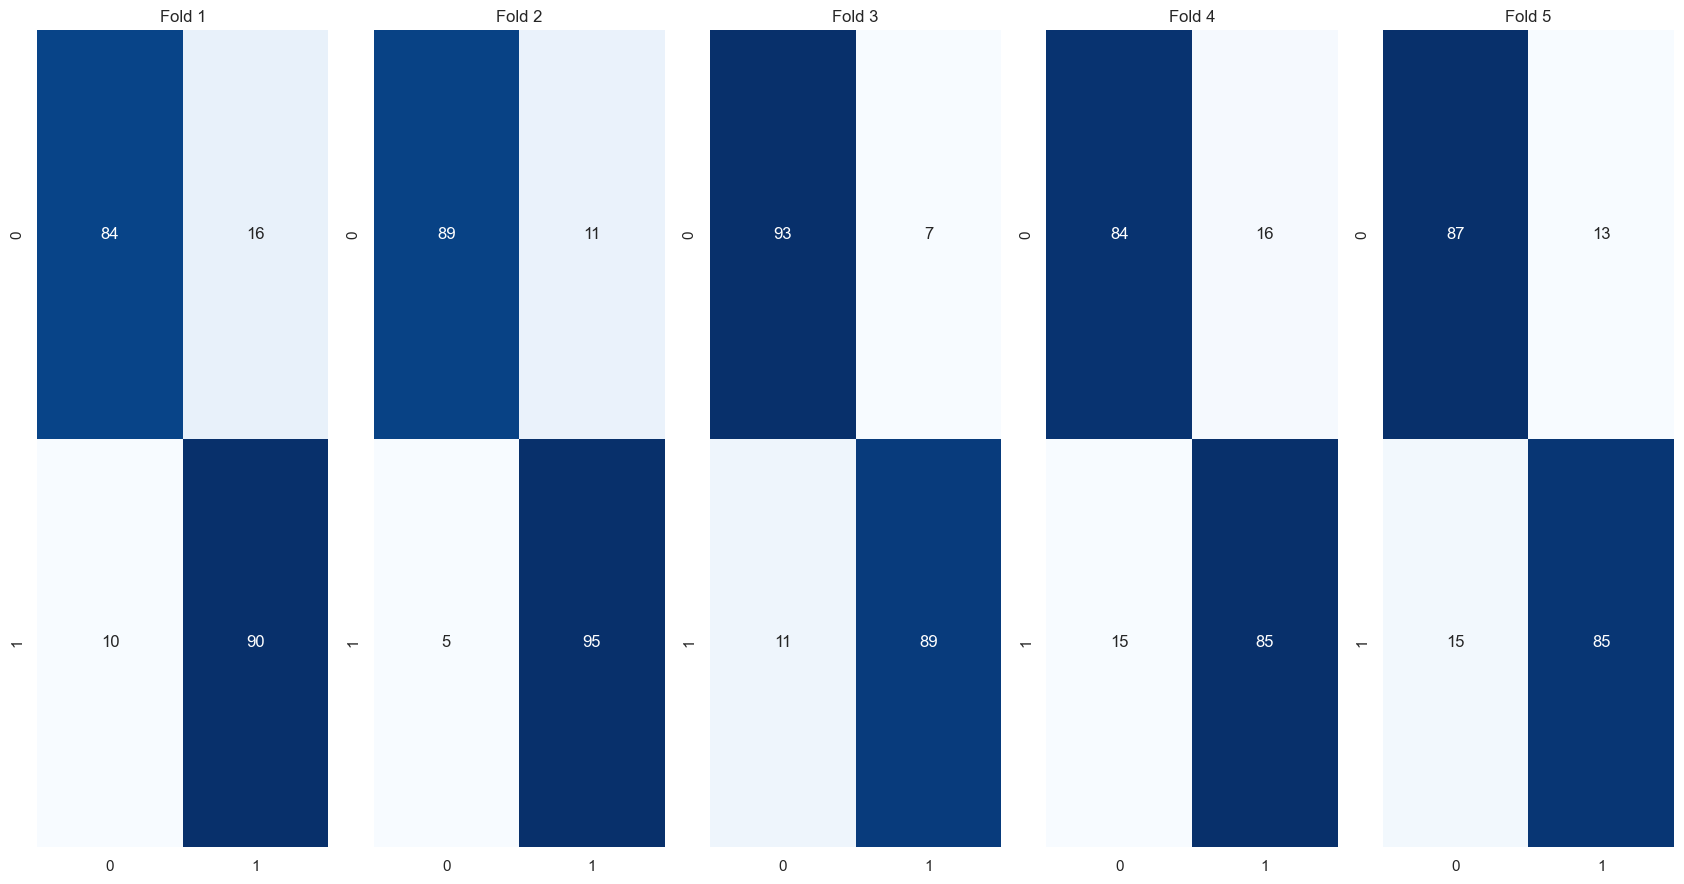

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(17,9)}) # isso é pras figuras ficarem maiore
plt.subplot(1, 5, 1)
sns.heatmap(conf_matrices[0], annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Fold 1')

plt.subplot(1, 5, 2)
sns.heatmap(conf_matrices[1], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Fold 2') 

plt.subplot(1, 5, 3)
sns.heatmap(conf_matrices[2], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Fold 3')

plt.subplot(1, 5, 4)
sns.heatmap(conf_matrices[3], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Fold 4')

plt.subplot(1, 5, 5)
sns.heatmap(conf_matrices[4], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Fold 5')
plt.tight_layout()


**Significado dos thresholds:**
- Um **threshold** (limiar) é o valor acima do qual uma probabilidade prevista será classificada como pertencente à classe positiva (1) e abaixo do qual será considerada como pertencente à classe negativa (0).
- Por padrão, muitos modelos de aprendizado de máquina usam 0,5 como threshold para fazer essa classificação, mas o código em questão explora diferentes thresholds e avalia como eles impactam as métricas de precisão (precision) e sensibilidade (recall).

Não funciona na árvore de decisão porque é por voto majoritário

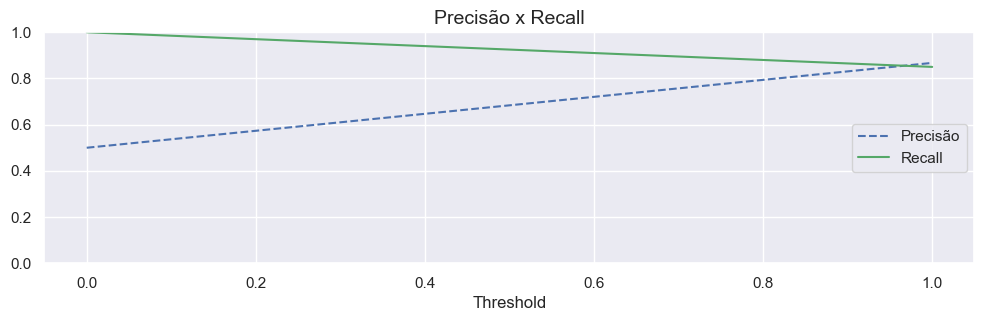

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test,  
                                                         y_proba[:, 1])
fig, ax = plt.subplots(figsize = (12,3))
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)
plt.show()

In [ ]:
# Definir um novo threshold
threshold = 0.7  # Exemplo: 70%

# Classificar com base no novo threshold
y_pred = (y_proba[:, 1] >= threshold).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.87      0.85      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [ ]:
y_proba[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

#### Validação Cruzada

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Melhores parâmetros encontrados: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Acurácia: 0.9122807017543859
Precisão: 1.0
Recall: 0.8611111111111112
AUC: 0.9883891828336272


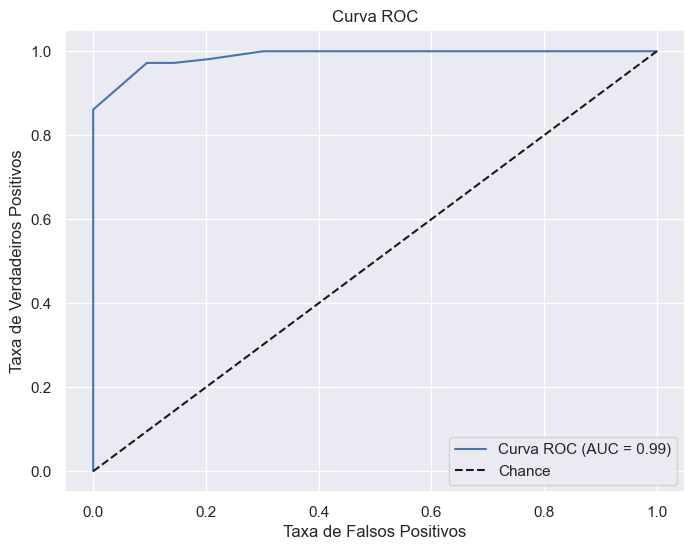

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instanciar o classificador de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)

# Definir o grid de hiperparâmetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Configurar o k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar o GridSearchCV com validação cruzada (5 folds)
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=1
)

# Ajustar o modelo com os dados de treinamento
grid_search.fit(X_train, y_train)

# Obter o melhor estimador encontrado na busca
best_model = grid_search.best_estimator_

# Previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Exibir os melhores parâmetros e as métricas
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_Df = pd.DataFrame(X, columns=data.feature_names)
import shap
def f(x):
    return best_model.predict_proba(x)[:, 1]


med = X_Df.mean().values.reshape((1, X_Df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_Df.iloc[0:1000, :])

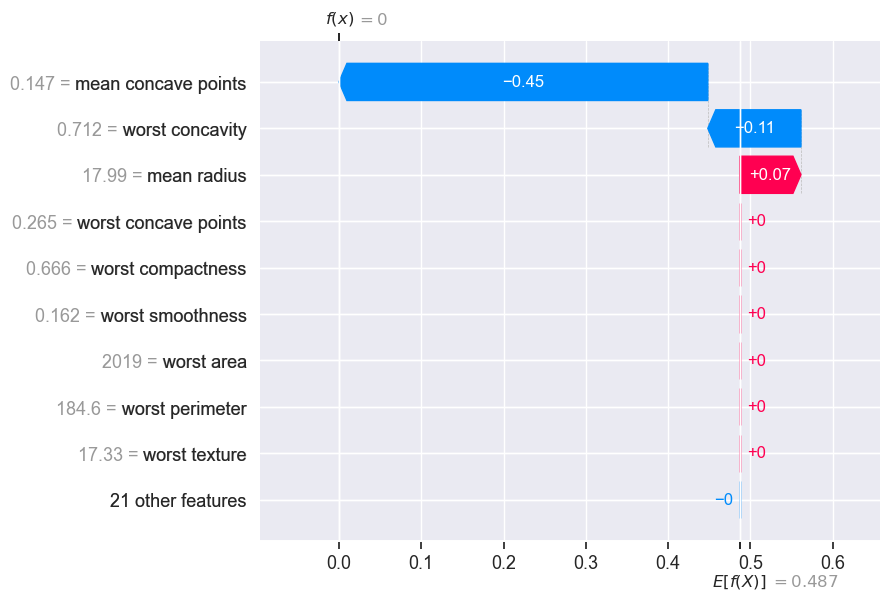

In [ ]:
shap.plots.waterfall(shap_values[0])

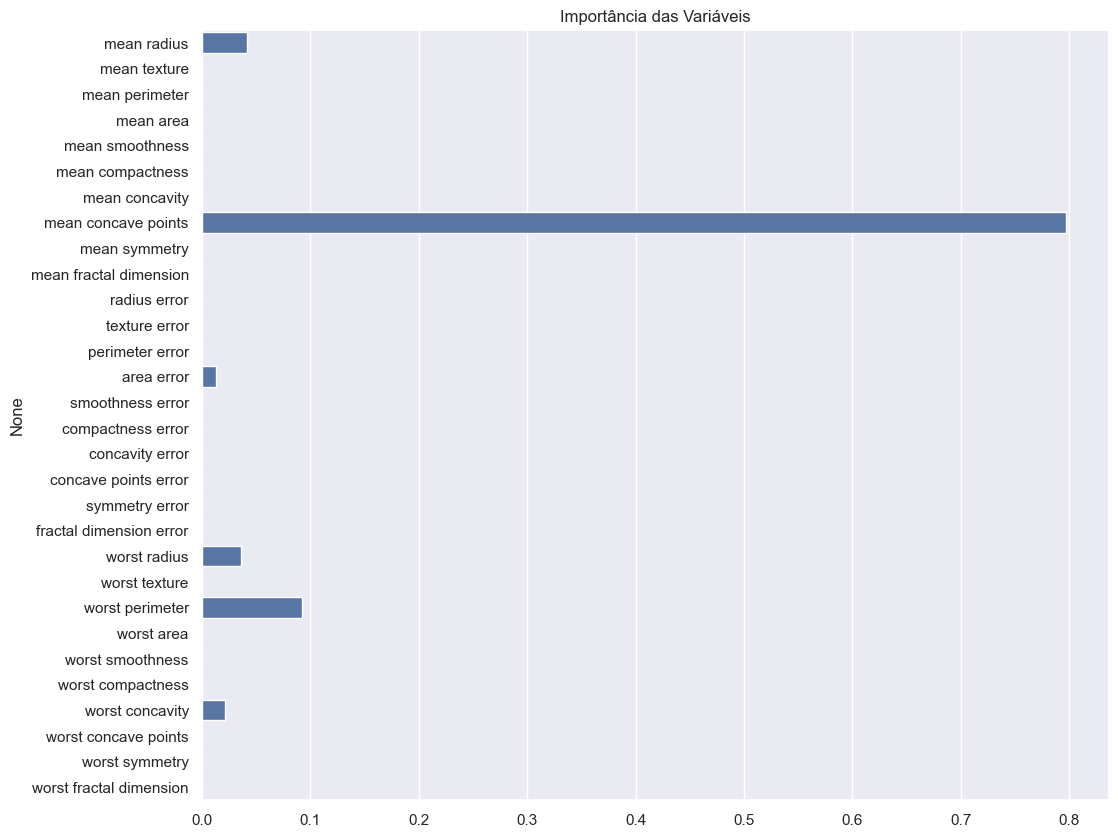

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(y=X_Df.columns, x=best_model.feature_importances_)
plt.title('Importância das Variáveis')
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores parâmetros encontrados: {'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'gini', 'ccp_alpha': 0.0}
Acurácia: 0.935672514619883
Precisão: 0.944954128440367
Recall: 0.9537037037037037
AUC: 0.9766313932980599


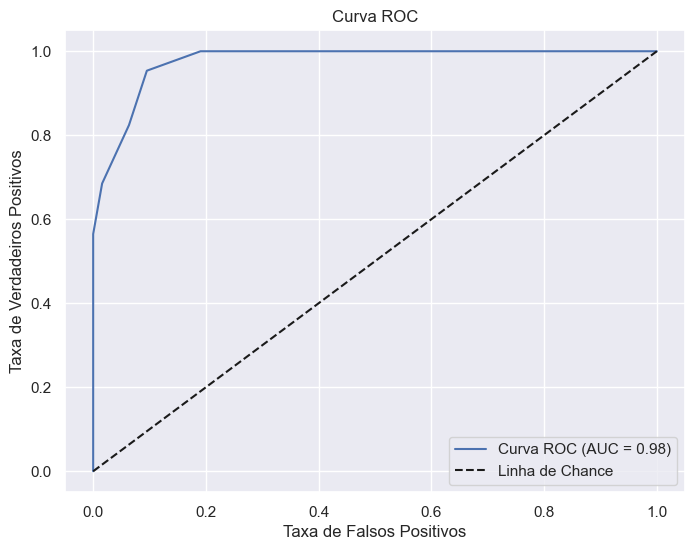

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir os dados em conjuntos de treinamento e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instanciar o classificator de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)

# Definir o dicionário com os hiperparâmetros a serem avaliados
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Configurar o k-fold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar o RandomizedSearchCV com 5 folds e 100 iterações
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Ajustar o modelo com os dados de treinamento
random_search.fit(X_train, y_train)

# Obter o melhor estimador a partir da busca
best_model = random_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Exibir os melhores parâmetros e as métricas
print("Melhores parâmetros encontrados:", random_search.best_params_)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Linha de Chance')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_Df = pd.DataFrame(X, columns=data.feature_names)
import shap
def f(x):
    return best_model.predict_proba(x)[:, 1]


med = X_Df.mean().values.reshape((1, X_Df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_Df.iloc[0:1000, :])

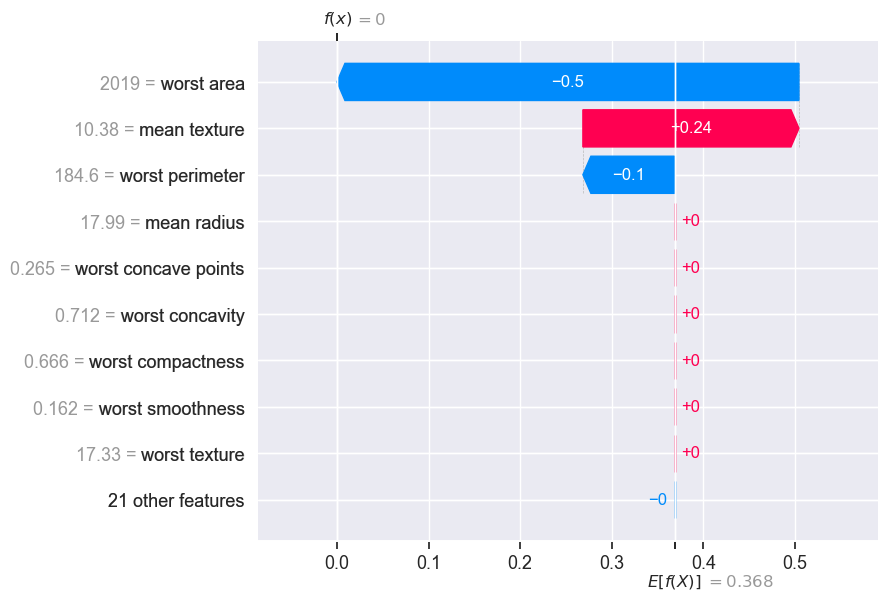

In [ ]:
shap.plots.waterfall(shap_values[0])

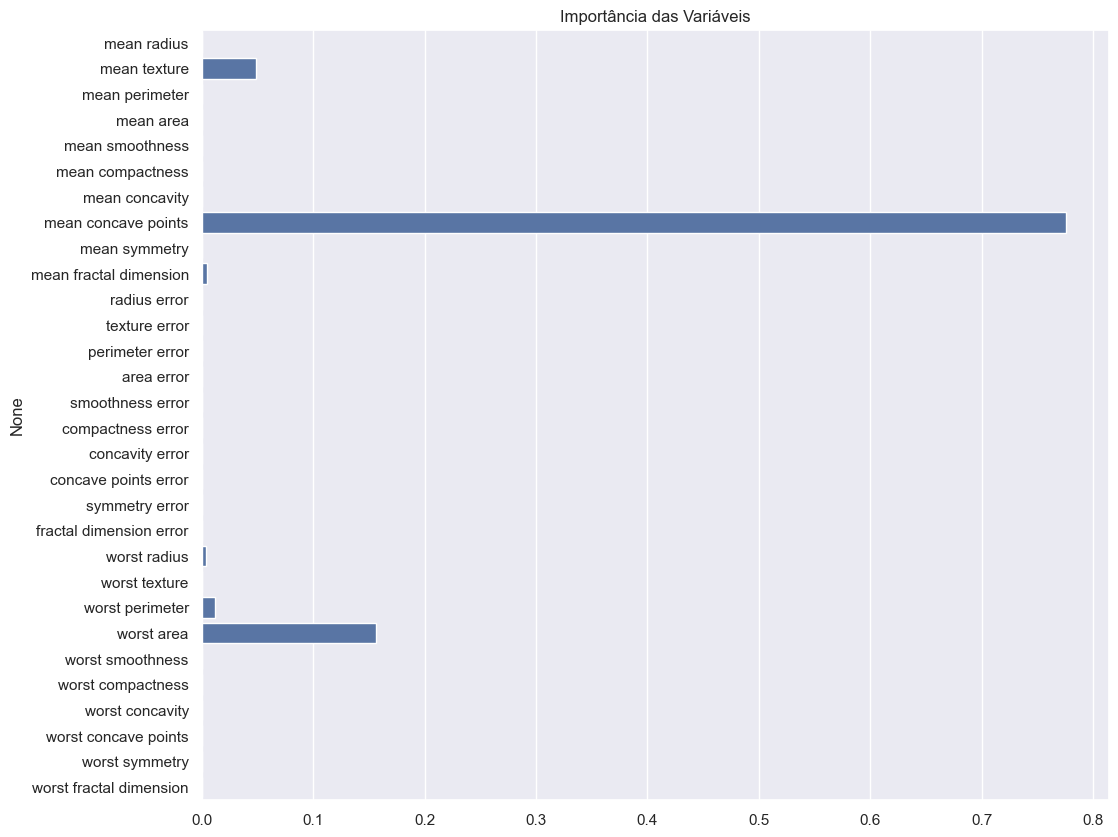

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(y=X_Df.columns, x=best_model.feature_importances_)
plt.title('Importância das Variáveis')
plt.show()

Fitting 398 folds for each of 100 candidates, totalling 39800 fits
Melhores parâmetros encontrados: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'ccp_alpha': 0.01}
Acurácia: 0.9649122807017544
Precisão: 0.9722222222222222
Recall: 0.9722222222222222
AUC: 0.9554673721340388


c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


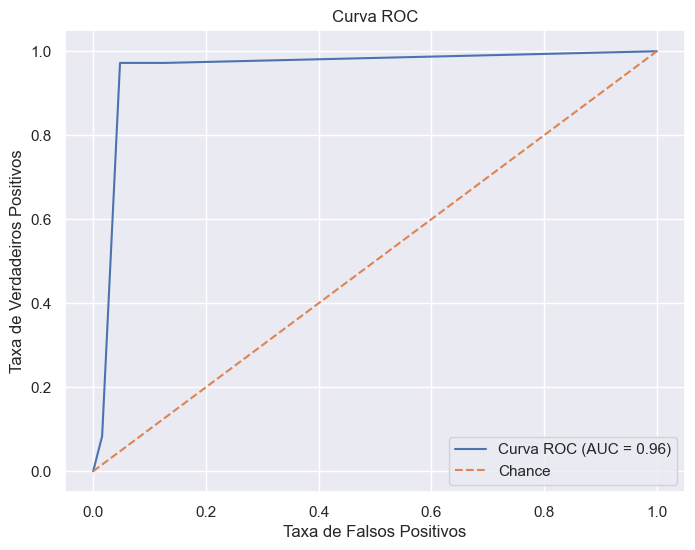

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir os dados em conjuntos de treinamento e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instanciar o classificador de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)

# Definir o dicionário de hiperparâmetros para avaliação
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Configurar o Leave-One-Out cross-validation
loo = LeaveOneOut()

# Configurar o RandomizedSearchCV utilizando LOO e 100 iterações
random_search_loo = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    scoring='roc_auc',
    cv=loo,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Ajustar o model com os dados de treinamento
random_search_loo.fit(X_train, y_train)

# Obter o melhor estimador encontrado
best_model = random_search_loo.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Exibir os melhores parâmetros e as métricas obtidas
print("Melhores parâmetros encontrados:", random_search_loo.best_params_)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Ensembles - Random Forest

### Introdução

Ensemble learning é uma técnica que combina multiplos, chamaos de "weak learners", para formar um modelo mais robusto e preciso. O objetivo é melhorar perfomance preditiva de um modelo:
- Redução do erro de generalização, que é a diferença entre o erro de treinamento e o erro de teste.
- Aumento da robustez e estabilidade do modelo, tornando-o menos sensível a variação nos dados.
- Mitigação de overffiting, especialmente em modelos complexos.

**Trade off viés e variância**:

- **Viés**: Refere-se ao erro introduzido por suposições feitas pelo modelo. Modelos com alto viés são geralmente simples e podem subajustar os dados, não capturando os padrões subjacentes (underfitting).

- **Variância**: Refere-se à sensibilidade do modelo a pequenas variações nos dados de treinamento. Modelos com alta variância são geralmente complexos e podem superajustar os dados, capturando ruído em vez de padrões (overfitting).

O ensemble tem a ideia de equilibrar esse trade off, pois modelos simples podem ter alto viés e modelos complexos podem ter alta variância. Logo combinando modelos podemos diminuir tanto o viés e a variância e gerar um modelo que generaliza melhor para novos dados.

Os principais métodos são:
- **Bagging (*bootstrap Aggregating*)**: Reduz a variância ao treinar multiplos modelos em diferentes subconjuntos de dados (obtidos por amostragem com reposição) e combina suas predições (Random Forest).
- **Boosting**: Reduz o viés e a variância ao treinar modelos em sequência, com um modelo corrigindo o erro do outro (Gradient Boosting, AdaBoost).
- **Stacking**: Combina diferentes tipos de modelos (meta-learning) para capturar padrões diversos, reduzindo viés e variância.

$$\textbf{Erro Total} = Viés^2 + Var + \text{Erro irreducível}$$

Os modelos buscam minimizar o viés e a variância (Var)

![image.png](attachment:image.png)

**Random Forest**:
1. Técnica de bagging que utiliza várias árvores de decisão para realizar classificação ou regressão. Cada árvore de decisão é treinada com uma amostra de bootstrap do conjunto de dados original. O bootstrap é uma técnica de reamostragem por reposição. A partir do conjunto dade dos original, várias amostras são geradas de forma aleatória, permitindo permitindo que um mesmo registro possa aparecer mais de uma vez em uma dada amostra, enquanto outros podem ficar de fora.

2. Como o bootstrap é usado em uma Random Forest?

    Em uma random forest, cada árvore de decisão é treinada com uma amostra bootstrap do conjunto de dados original. Eis os passos:
    - Amostragem com reposição:
    Para cada árvore da floresta, gera-se uma nova amostra aleatória do conjunto original. Essa amostra tem o mesmo tamanho do conjunto de dados original, mas, por conta da reposição, em média, cerca de 63,2% dos registros aparecem (alguns mais de uma vez) e cerca de 36,8% não são selecionados. Esses últimos serão chamados de **"Out-of-Bag" (OOB)**.
    - Diversificação das árvores:
    Como cada árvore é treinada com um conjunto de dados ligeiramente diferente, elas aprendem diferentes padrões e nuances dos dados. Essa diversificação é crucial para reduzir o overfitting, pois o erro de predição de cada árvore tende a ser mitigado quando suas previsões são combinadas (por votação ou média).
    - Utilização das amostras OOB:
    Os registros que não foram selecionados na amostra bootstrap de uma árvore (cerca de 36,8% dos dados) são chamados de amostras OOB. Essas amostras são úteis para estimar o erro do modelo de forma interna, eliminando a necessidade de um conjunto de validação externo.


3. Visualização Simplificada do Processo

    Imagem 2.

    - Cada árvore é, portanto, construída a partir de uma amostra diferente, o que aumenta a diversidade do conjunto.
    - Erro Out-of-Bag: Para cada árvore, os dados que não aparecem na amostra bootstrap podem ser usados para testar a árvore e estimar de forma confiável a sua performance.


4. Por que o bootstrap é tão importante?
    - Redução da Correlação entre Árvores: Ao treinar cada árvore em uma amostra diferente, as árvores não são todas expostas exatamente aos mesmos dados, o que as torna menos correlacionadas.
    - Estabilidade do Modelo: A combinação de várias árvores, cada uma com suas particularidades, resulta em um modelo mais robusto e com melhores desempenhos em dados não vistos.
    - Avaliação Interna (OOB): O uso das amostras OOB permite a validação interna sem a necessidade de separar uma parte significativa dos dados para teste.


Conclusão
Na random forest, o bootstrapping é a técnica que permite que cada árvore seja construída a partir de um subconjunto diferente dos dados originais, contribuindo para a diversidade do ensemble e melhorando sua capacidade de generalização. Essa estratégia de "aprendizado a partir de múltiplas perspectivas" é uma das chaves para o sucesso da random forest em reduzir o erro de predição e evitar overfitting.


Exemplo de bootstrap:

![image.png](attachment:image.png)

![image-3.png](attachment:image-3.png)

By Jtbchamp99 - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=113187525

Imagem 2, exemplo de Random Forest:

![image-2.png](attachment:image-2.png)

A inferência é realizada por meio da votação das previsões dos membros do ensemble, processo denominado agregação. Isso é ilustrado abaixo com um ensemble de quatro árvores de decisão. O exemplo de consulta é classificado por cada árvore. Como três das quatro árvores preveem a classe positiva, a classificação geral do ensemble é positiva.

![image.png](attachment:image.png)

By Jtbchamp99 - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=113187673

Embora as florestas aleatórias geralmente atinjam uma precisão superior à de uma única árvore de decisão, elas sacrificam a interpretabilidade intrínseca das árvores de decisão. Árvores de decisão estão entre uma família relativamente pequena de modelos de aprendizado de máquina que são facilmente interpretáveis, juntamente com modelos lineares, modelos baseados em regras e modelos baseados em atenção. Essa interpretabilidade é uma das principais vantagens das árvores de decisão. Ela permite que os desenvolvedores confirmem que o modelo aprendeu informações realistas a partir dos dados e possibilita que os usuários finais tenham confiança e segurança nas decisões tomadas pelo modelo. Por exemplo, seguir o caminho que uma árvore de decisão percorre para tomar sua decisão é bastante trivial, mas seguir os caminhos de dezenas ou centenas de árvores é muito mais difícil. Para alcançar tanto desempenho quanto interpretabilidade, algumas técnicas de compressão de modelo permitem transformar uma floresta aleatória em uma árvore de decisão mínima "born-again" que reproduz fielmente a mesma função de decisão.

Outra limitação das florestas aleatórias é que, se as características forem linearmente correlacionadas com a variável alvo, a floresta aleatória pode não melhorar a precisão do modelo base. Da mesma forma, em problemas com múltiplas variáveis categóricas.

**Principais Vantagens e Desvantagens da Random Forest**

A **Random Forest** é uma técnica de ensemble que constrói múltiplas árvores de decisão a partir de amostras aleatórias do conjunto de dados e depois agrega os resultados. Ela traz diversas vantagens e também apresenta algumas desvantagens. A seguir estão os pontos principais:

**Vantagens**

- **Redução do Overfitting:**  
  Cada árvore é treinada com uma amostra bootstrap do conjunto original, o que diminui a correlação entre elas. Ao agregar as respostas (por votação ou média), o modelo final tende a apresentar menor variância e a ser menos suscetível ao overfitting comparado a uma única árvore de decisão.

- **Robustez:**  
  O uso de várias árvores e a randomização aumentam a robustez do modelo contra ruídos e outliers. Dados inconsistentes costumam ter um impacto reduzido na predição final, pois a agregação suaviza as variações individuais.

- **Capacidade para Dados de Alta Dimensionalidade:**  
  A Random Forest lida bem com um grande número de variáveis e é capaz de identificar, através do cálculo da importância das features, quais delas são mais relevantes para a predição.

- **Utilização Eficiente dos Dados (Out-of-Bag - OOB):**  
  Como cada árvore é construída com uma amostra bootstrap, aproximadamente 36,8% dos dados não são utilizados para o treinamento de uma dada árvore. Esses dados OOB podem ser usados para uma validação interna, permitindo uma boa estimativa do erro do modelo sem a necessidade de um conjunto de teste separado.

- **Flexibilidade em Tarefas de Classificação e Regressão:**  
  A técnica pode ser aplicada tanto em problemas de classificação quanto em regressão, adaptando-se bem a diferentes cenários.

**## Desvantagens**

- **Complexidade Computacional e de Memória:**  
  Treinar dezenas, centenas ou milhares de árvores pode ser custoso em termos de tempo de processamento e memória, especialmente com conjuntos de dados de grande tamanho ou de alta dimensionalidade.

- **Menor Interpretabilidade:**  
  Embora cada árvore individual seja relativamente simples e interpretável, o conjunto formado por muitas árvores (o "ensemble") funciona como uma "caixa-preta". Isso dificulta extrair interpretações diretas e compreensíveis sobre quais variáveis conduzem as predições, ao contrário de uma única árvore de decisão.

- **Tempo de Previsão:**  
  Realizar predições usando um grande número de árvores pode ser mais demorado do que métodos mais simples, o que pode impactar aplicações em tempo real.

- **Dependência de Hiperparâmetros:**  
  Embora a Random Forest seja robusta, a escolha adequada de hiperparâmetros (como número de árvores, profundidade máxima, número de features a considerar em cada divisão, etc.) pode impactar significativamente os resultados. Em alguns casos, ajustar esses parâmetros pode ser um desafio.

**## Conclusão**

A **Random Forest** é uma ferramenta poderosa para problemas de predição, oferecendo alta precisão e robustez, especialmente quando os dados são complexos e ruidosos. Contudo, seu custo computacional e a dificuldade em interpretar os resultados podem ser barreiras para alguns contextos onde a interpretabilidade e recursos computacionais limitados são fatores críticos.

**Resumo**:
1. Combina modelos para obter um melhor resultado
2. Bagging, boosting e stacking
3. Viés (conceito aproximado) - Erro de predição na base de treino
4. Variância (conceito aproximado) - É a diferença/discrepância absoluta entre o erro treino e teste
5. Supervisonado
6. Não parametrico
7. Combinação paralela de modelos e reamostragem por reposição
8. Em classificação é utilizado a moda para determinar o melhor
9. Outliers não impactam
10. Sofre com dados desbalanceados.
11. Precisa de mesma escala? - Random Foreste não, dependendo do modelo sim.
12. Custo operacional depende do modelo - Random Forest é logaritmo
13. NB < Árvore <= Rf < KNN (BF)
14. Quando n_estimator é muito grande:
    - Modelo mais complexo e mais chance de possuir árvores mais correlacionadas
    - Tende ao overfitting
    - Tende ao alto viés e baixa variância.
    - Baixo erro na base de treino e alto erro na base de teste
15. Pré-poda
    - max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes, min_impurity_decrease
16. Pos poda:
    - ccp_alpha: quando maior valor penaliza árvores mais complexas.
17. Principais variaveis para hiperparâmetros:
    - criterion, n_estimators, pré poda, max_features, ccp_alpha

### Aplicação Sklearn

<div style="text-align: center;">
    <iframe type="text/html" src="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" width="90%" height="500" style="text-align: center; border: solid; border-radius: 10px">
</div>

### Python

Média da Precisão: 0.9273109243697478
Média do Recall: 0.9399999999999998
Média do AUC: 0.98302
Média do Gini: 0.9660400000000001


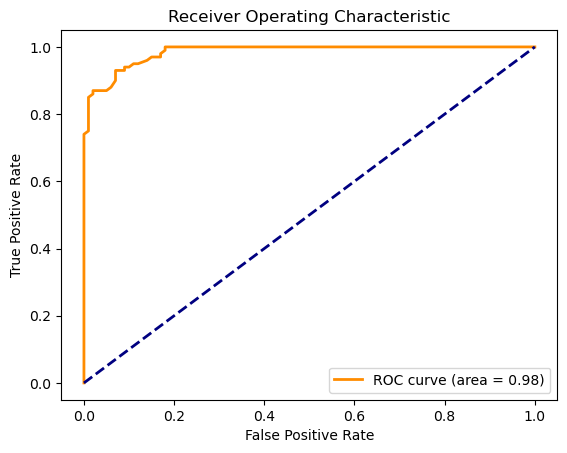

In [ ]:
from sklearn.datasets import load_iris, make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


# Criando um conjunto de dados fictício
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=42)
# Transformando em DataFrame para melhor visualização
# X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])


# Configurar o k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar métricas
conf_matrices = []
precisions = []
recalls = []
aucs = []
ginis = []

# Loop pelos folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Treinar o modelo
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Previsões
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    
    # Matriz de confusão
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Precisão e recall
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
    # AUC e Gini
    auc_score = roc_auc_score(y_test, y_proba[:, 1])
    aucs.append(auc_score)
    ginis.append(2 * auc_score - 1)

# Exibir métricas médias
print("Média da Precisão:", np.mean(precisions))
print("Média do Recall:", np.mean(recalls))
print("Média do AUC:", np.mean(aucs))
print("Média do Gini:", np.mean(ginis))

# Plotar a curva ROC do último fold
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Melhores parâmetros encontrados: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Acurácia: 0.9649122807017544
Precisão: 0.9553571428571429
Recall: 0.9907407407407407
AUC: 0.9976484420928866


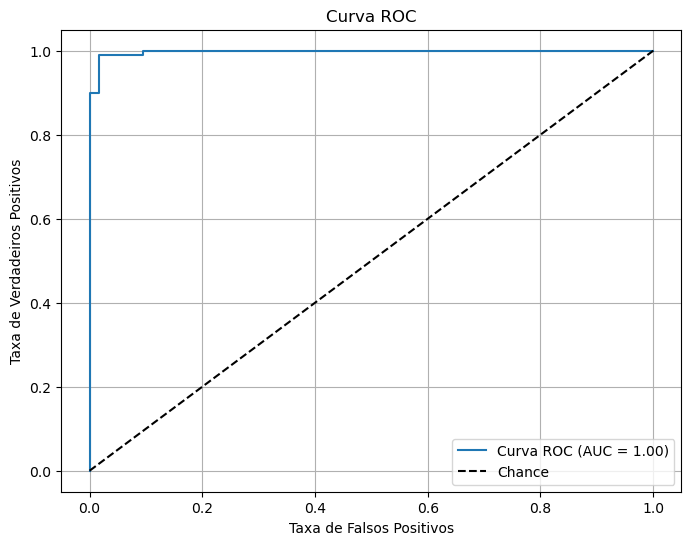

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instanciar o classificador de árvore de decisão
dt = RandomForestClassifier(random_state=42)

# Definir o grid de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Configurar o k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar o GridSearchCV com validação cruzada (5 folds)
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=1
)

# Ajustar o modelo com os dados de treinamento
grid_search.fit(X_train, y_train)

# Obter o melhor estimador encontrado na busca
best_model = grid_search.best_estimator_

# Previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Exibir os melhores parâmetros e as métricas
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_Df = pd.DataFrame(X, columns=data.feature_names)
import shap
def f(x):
    return best_model.predict_proba(x)[:, 1]


med = X_Df.mean().values.reshape((1, X_Df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_Df.iloc[0:1000, :])

PermutationExplainer explainer: 570it [00:10,  1.75it/s]                         


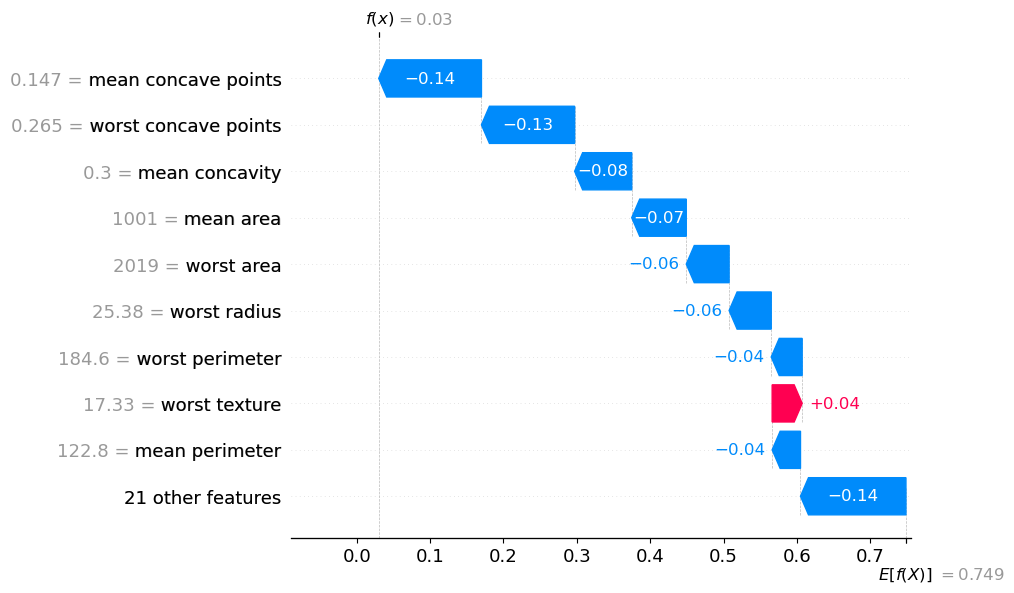

In [ ]:
shap.plots.waterfall(shap_values[0])

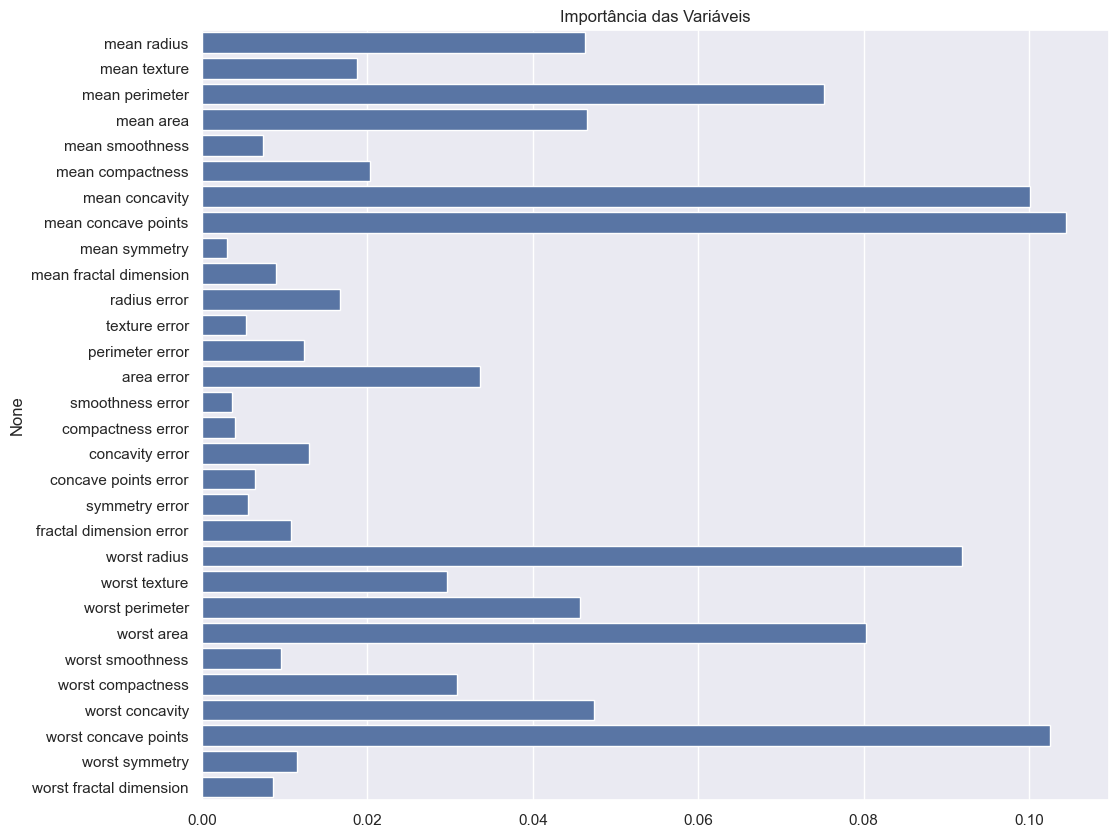

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(y=X_Df.columns, x=best_model.feature_importances_)
plt.title('Importância das Variáveis')
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores parâmetros encontrados: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Acurácia: 0.9649122807017544
Precisão: 0.9553571428571429
Recall: 0.9907407407407407
AUC: 0.9976484420928866


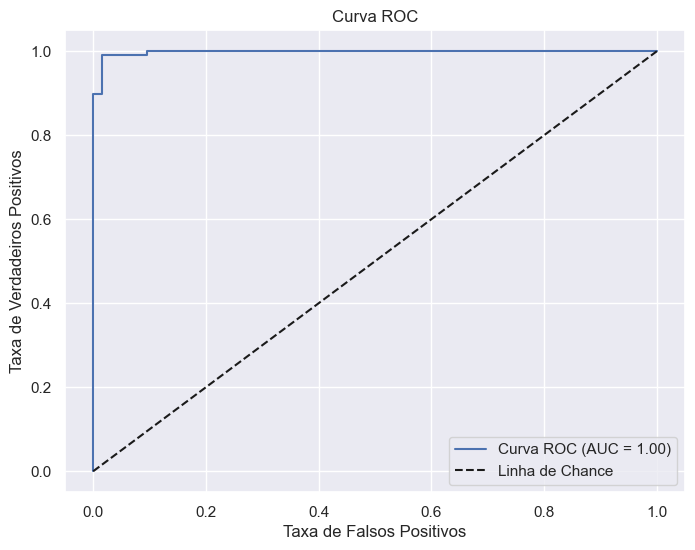

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir os dados em conjuntos de treinamento e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instanciar o classificator de árvore de decisão
dt = RandomForestClassifier(random_state=42)

# Definir o dicionário com os hiperparâmetros a serem avaliados
param_dist = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Configurar o k-fold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar o RandomizedSearchCV com 5 folds e 100 iterações
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Ajustar o modelo com os dados de treinamento
random_search.fit(X_train, y_train)

# Obter o melhor estimador a partir da busca
best_model = random_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Exibir os melhores parâmetros e as métricas
print("Melhores parâmetros encontrados:", random_search.best_params_)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Linha de Chance')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_Df = pd.DataFrame(X, columns=data.feature_names)
import shap
def f(x):
    return best_model.predict_proba(x)[:, 1]


med = X_Df.mean().values.reshape((1, X_Df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_Df.iloc[0:1000, :])

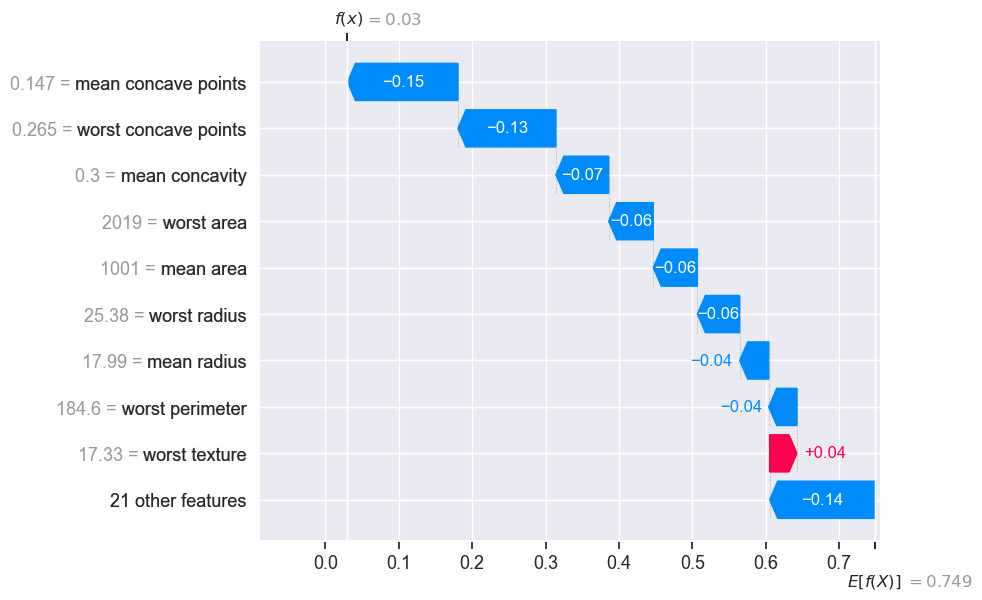

In [ ]:
shap.plots.waterfall(shap_values[0])

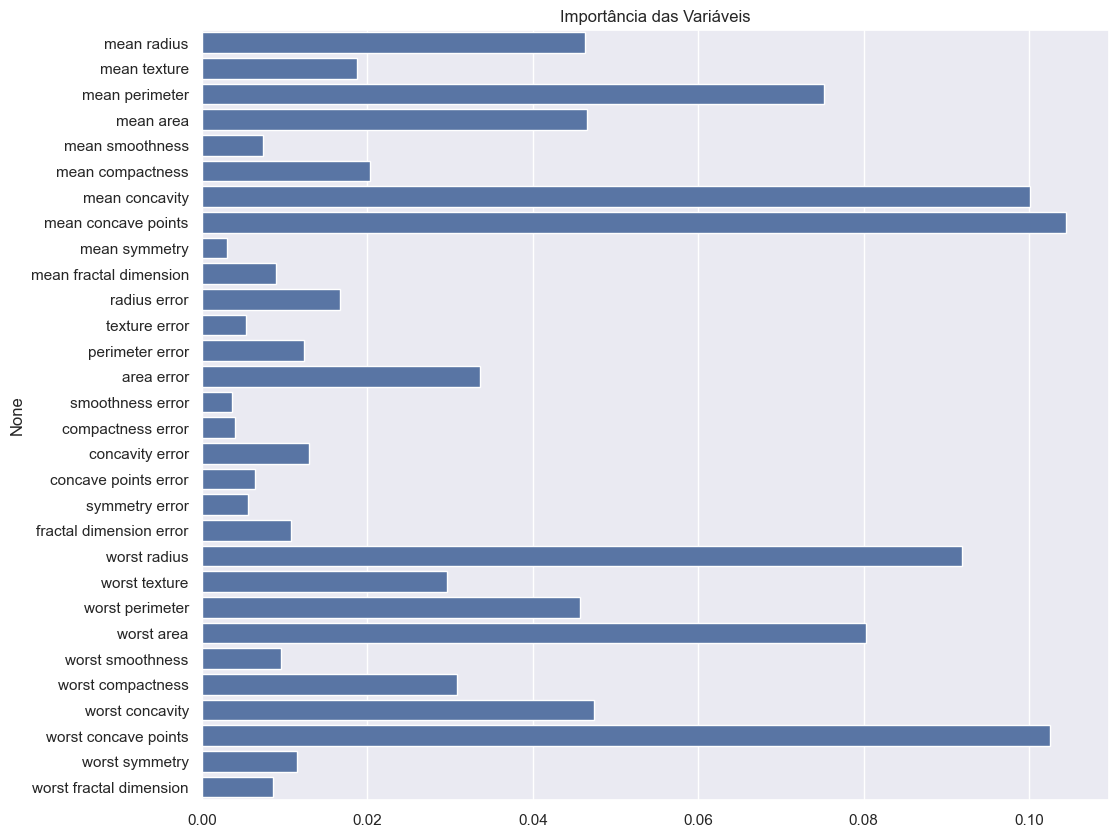

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(y=X_Df.columns, x=best_model.feature_importances_)
plt.title('Importância das Variáveis')
plt.show()

Fitting 398 folds for each of 100 candidates, totalling 39800 fits


c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores parâmetros encontrados: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'ccp_alpha': 0.1}
Acurácia: 0.9590643274853801
Precisão: 0.9391304347826087
Recall: 1.0
AUC: 0.9964726631393297


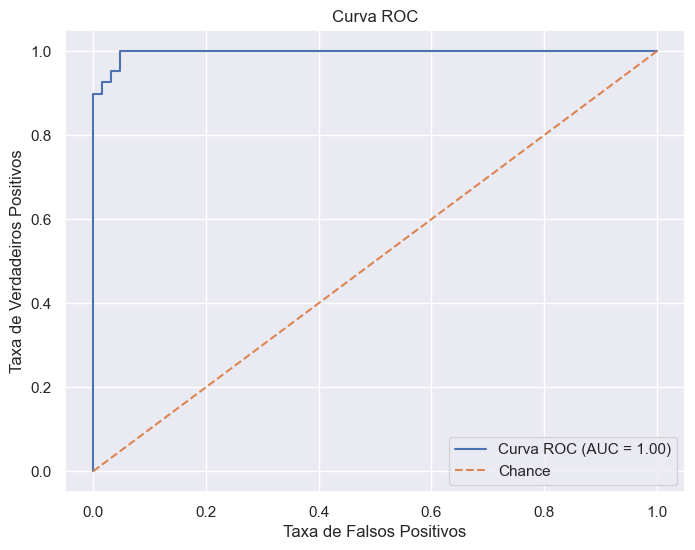

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir os dados em conjuntos de treinamento e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instanciar o classificador de árvore de decisão
dt = RandomForestClassifier(random_state=42)

# Definir o dicionário de hiperparâmetros para avaliação
param_dist = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Configurar o Leave-One-Out cross-validation
loo = LeaveOneOut()

# Configurar o RandomizedSearchCV utilizando LOO e 100 iterações
random_search_loo = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    scoring='roc_auc',
    cv=loo,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Ajustar o model com os dados de treinamento
random_search_loo.fit(X_train, y_train)

# Obter o melhor estimador encontrado
best_model = random_search_loo.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Exibir os melhores parâmetros e as métricas obtidas
print("Melhores parâmetros encontrados:", random_search_loo.best_params_)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
X_Df = pd.DataFrame(X, columns=data.feature_names)
import shap
def f(x):
    return best_model.predict_proba(x)[:, 1]


med = X_Df.mean().values.reshape((1, X_Df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_Df.iloc[0:1000, :])

PermutationExplainer explainer: 570it [00:20, 13.77it/s]                         


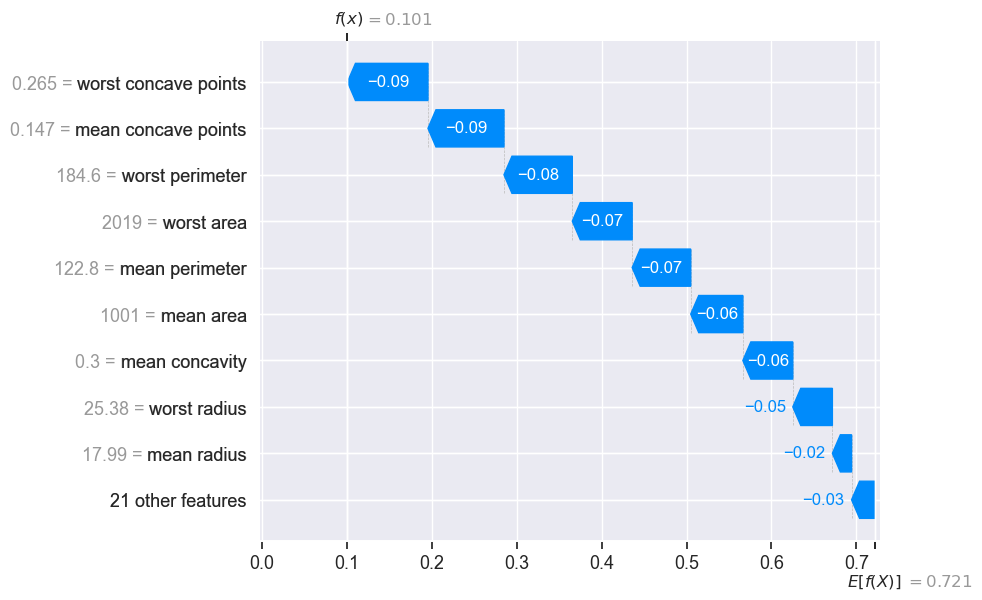

In [ ]:
shap.plots.waterfall(shap_values[0])

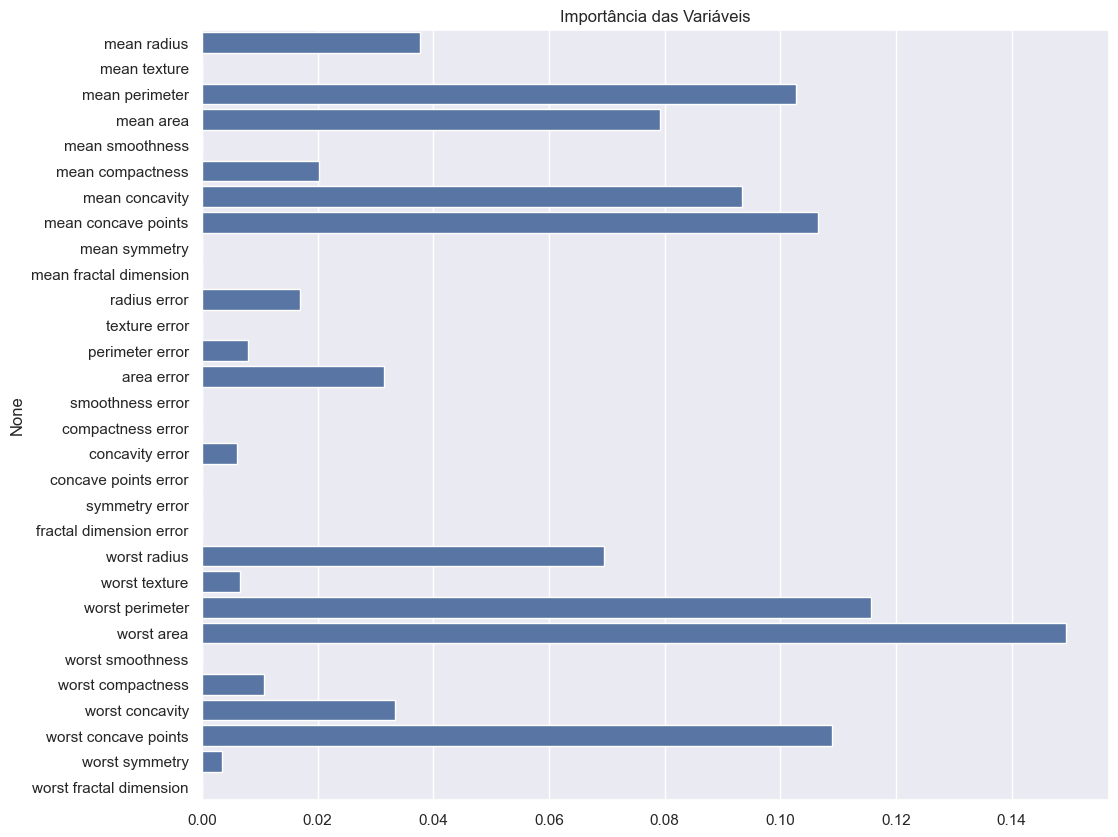

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(y=X_Df.columns, x=best_model.feature_importances_)
plt.title('Importância das Variáveis')
plt.show()

## Boosting

Boosting é uma meta-heurística de conjunto destinada, principalmente, a reduzir o viés (em oposição à variância). Ele também pode melhorar a estabilidade e a precisão dos algoritmos de classificação e regressão de ML. Portanto, é amplamente utilizado em aprendizado supervisionado para converter aprendizes fracos em aprendizes fortes. 

### AdaBoosting

o AdaBoost trabalha "adaptativamente", concentrando os esforços nos exemplos que os classificadores anteriores erraram, de forma a corrigir esses erros em iterações sucessivas.

**Como o AdaBoost Funciona (Passo a Passo)**

1. **Inicialização dos Pesos:**

    Cada amostra do conjunto de treinamento recebe inicialmente um peso igual. Se há N amostras, cada uma começa com peso 1/N.

2. **Iterações Sequenciais:**

    - **Treinamento do Classificador Fraco:**
    Em cada iteração, um classificador fraco (por padrão, uma árvore de decisão com profundidade 1, ou stump) é treinado. Este treinamento leva em consideração os pesos atuais, o que significa que as amostras com pesos maiores (ou seja, aquelas que foram previamente classificadas incorretamente) terão mais influência.

    - **Cálculo do Erro:**
    Depois do treinamento, calcula-se a taxa de erro ponderada do classificador. Esse erro é a soma dos pesos das amostras incorretamente classificadas.

    - **Determinação do Peso do Classificador:**
    Com base no erro, o algoritmo calcula um "peso" (geralmente denotado por α ou alpha) para o classificador. Esse peso reflete a confiabilidade do classificador: classifcadores com menor erro recebem um peso maior e, portanto, têm mais influência na decisão final.

    - **Atualização dos Pesos das Amostras:**
    Os pesos são atualizados de forma a dar mais importância às amostras que foram classificadas incorretamente. Assim, na próxima iteração, o novo classificador fraco se concentrará mais nessas amostras difíceis.

3. **Agregação Final:**

    Após executar um número predefinido de iterações (controlado pelo parâmetro n_estimators), os classificadores fracos são combinados numa votação ponderada. Cada classificador contribui de acordo com o seu peso (alpha), e a classe final é definida pela soma dos votos ponderados.

**Parâmetros Importantes**:

- **n_estimators**: Define quantos classificadores fracos serão treinados. Mais estimadores podem melhorar a performance, mas também aumentam o risco de overfitting.

- **learning_rate**: Atua como um fator de regularização, diminuindo o peso de cada classificador. Valores menores implicam uma contribuição mais suave de cada classificador.

- **base_estimator**: Especifica o modelo fraco a ser utilizado. Embora o padrão seja uma árvore de decisão rasa, você pode escolher outro modelo, desde que ele se comporte como um classificador fraco.



![image.png](attachment:image.png)

**Considerações Finais**
- **Adaptação**: O AdaBoost adapta-se aos erros dos classificadores anteriores ao focar nas amostras mais difíceis.
- **Sensibilidade a Ruídos**: Por elevar o peso das amostras mal classificadas, o AdaBoost pode tornar-se sensível a outliers e ruídos no conjunto de dados.
- **Versatilidade**: Pode ser aplicado tanto para problemas de classificação quanto de regressão (com a devida adaptação).




**Resumo**:
1. Supervisonado
2. Não parametrico
3. Não necessita que os dados estejam normalizados/padronizados
4. Cada estimador utilza dados ligeramente modificados
5. Cada estimador tem um peso diferente em cada classe predita
6. peso = $\frac{1}{N}$, onde N é o número de amostra
7. $\alpha = \ln{\frac{1 - \text{Erro total}}{\text{Erro Total}}}$, onde $\alpha$ é o Peso que um estimador terá no final da predição (binária)
8. Como calculamos o peso ajustado das amostras classificadas incorretamente por um estimador?
    - $\text{Novo Peso} = \text{Peso Antigo} * e^{\alpha}$
9. Como calculamos o peso ajustado das amostras classificadas corretamente por um estimador?
    - $\text{Novo Peso} = \text{Peso Antigo} * e^{-\alpha}$
10. Dado que temos um problema de classificação binária (classes 0 e 1) e dado que já temos um AdaBoost treinado com "K" estimadores, como podemos utilizar os estimadores para predizer a classe final escolhida pelo ensemble?
    - Podemos separar os estimadores em dois conjuntos, um contendo os estimadores que classificaram o ponto como pertencendo a classe 1 e outro com os estimadores que classificaram o ponto como pertencendo a classe zero, em seguida, podemos realizar a soma do peso (alpha) de cada estimador (dentro de cada grupo) para verificar qual destes dois grupos teve o maior valor de soma, sendo escolhido para a predição o grupo com maior valor desta soma.
11. Técnicas de Bagging tendem a ser utilizadas para reduzir a variância presente em estimadores individuais
12. Técnicas de Boosting tendem a ser utilizadas para reduzir o viés presente em estimadores individuais
13. Quais as diferenças entre Bagging e Boosting?:
    - No Boosting os modelos base aprendem de forma adaptativa, já no Bagging os modelos base aprende de forma independente;
    - No Bagging os modelos base estão dispostos e aprendem em paralelo, já no Boosting os modelos base estão dispostos e aprendem em série;
    - Os modelos base no Boosting aprendem com os erros dos modelos base anteriores, já no Bagging os modelos base aprendem de forma independente e com alta variabilidade;

#### Aplicação Sklearn

<div style="text-align: center;">
    <iframe type="text/html" src="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html" width="90%" height="500" style="text-align: center; border: solid; border-radius: 10px">
</div>

#### Python

Média da Precisão: 0.8836466553884579
Média do Recall: 0.908
Média do AUC: 0.9570500000000001
Média do Gini: 0.9141


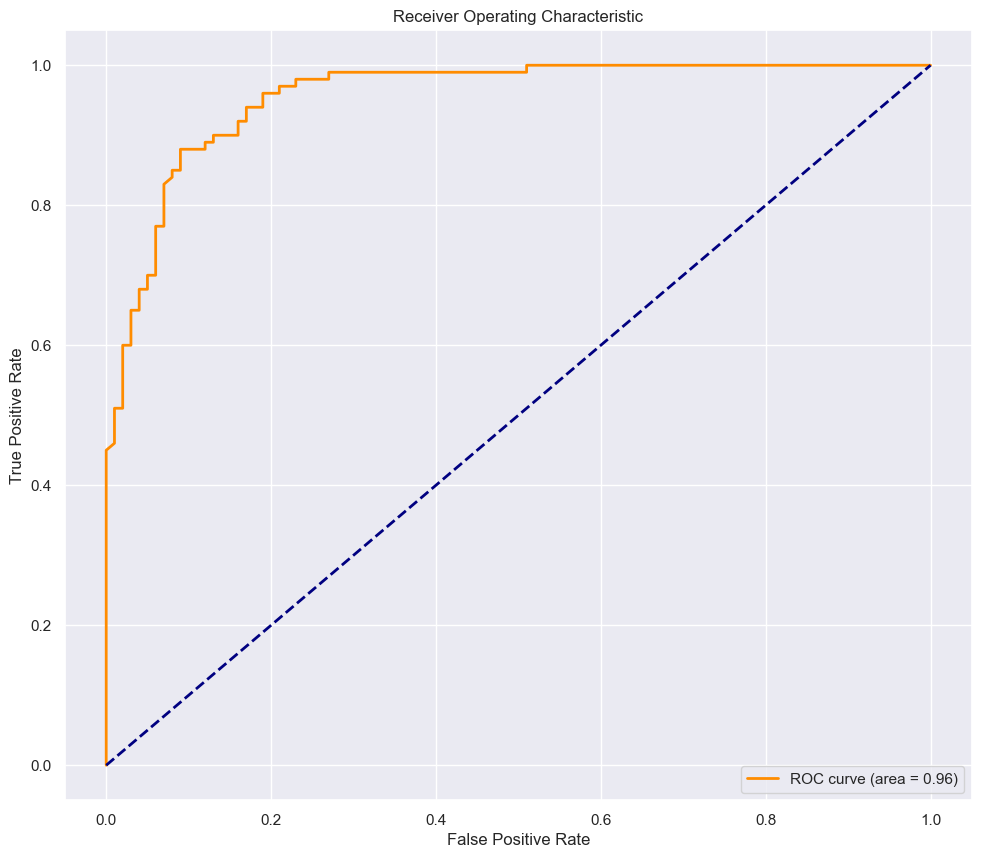

In [ ]:
from sklearn.datasets import load_iris, make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


# Criando um conjunto de dados fictício
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=42)
# Transformando em DataFrame para melhor visualização
# X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])


# Configurar o k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar métricas
conf_matrices = []
precisions = []
recalls = []
aucs = []
ginis = []

# Loop pelos folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Treinar o modelo
    clf = AdaBoostClassifier(algorithm='SAMME',random_state=42)
    clf.fit(X_train, y_train)
    
    # Previsões
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    
    # Matriz de confusão
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Precisão e recall
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
    # AUC e Gini
    auc_score = roc_auc_score(y_test, y_proba[:, 1])
    aucs.append(auc_score)
    ginis.append(2 * auc_score - 1)

# Exibir métricas médias
print("Média da Precisão:", np.mean(precisions))
print("Média do Recall:", np.mean(recalls))
print("Média do AUC:", np.mean(aucs))
print("Média do Gini:", np.mean(ginis))

# Plotar a curva ROC do último fold
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Melhores parâmetros encontrados: {'learning_rate': 1.5, 'n_estimators': 150}
Acurácia: 0.9707602339181286
Precisão: 0.9724770642201835
Recall: 0.9814814814814815
AUC: 0.9955908289241623


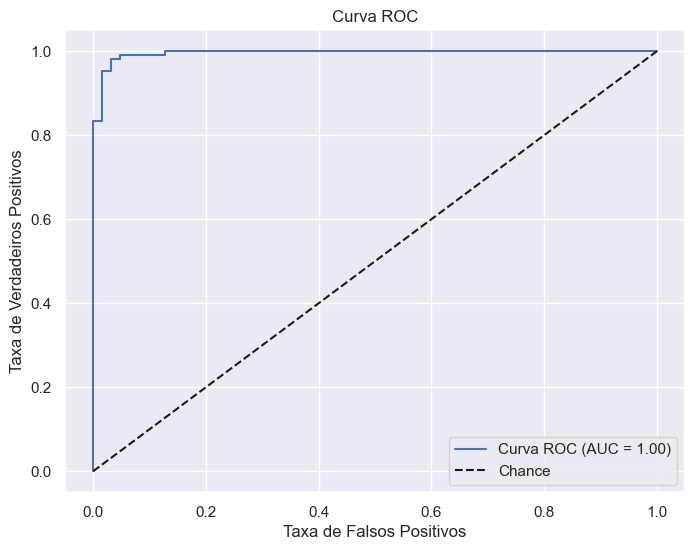

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instanciar o classificador de árvore de decisão
dt = AdaBoostClassifier(algorithm='SAMME',random_state=42)

# Definir o grid de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0, 1.5],

}


# Configurar o k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar o GridSearchCV com validação cruzada (5 folds)
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=1
)

# Ajustar o modelo com os dados de treinamento
grid_search.fit(X_train, y_train)

# Obter o melhor estimador encontrado na busca
best_model = grid_search.best_estimator_

# Previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Exibir os melhores parâmetros e as métricas
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_Df = pd.DataFrame(X, columns=data.feature_names)
import shap
def f(x):
    return best_model.predict_proba(x)[:, 1]


med = X_Df.mean().values.reshape((1, X_Df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_Df.iloc[0:1000, :])

PermutationExplainer explainer: 570it [00:42, 10.12it/s]                         


In [ ]:
X_Df['target'] = y
X_Df['prob'] = best_model.predict_proba(X)[:, 1]  # Probabilidade da classe positiva
df_ks = ks(X_Df, target='target', prob='prob')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.689065  0.773553      57          0     15.97%         0.00%   
2       0.660566  0.688915      57          0     15.97%         0.00%   
3       0.638416  0.660526      57          0     15.97%         0.00%   
4       0.617935  0.638036      57          0     15.97%         0.00%   
5       0.591522  0.617846      56          0     15.69%         0.00%   
6       0.566891  0.590666      56          1     15.69%         0.47%   
7       0.415254  0.566310      17         40      4.76%        18.87%   
8       0.350899  0.415125       0         57      0.00%        26.89%   
9       0.310346  0.350213       0         57      0.00%        26.89%   
10      0.239082  0.308723       0         57      0.00%        26.89%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             15.97

C:\Users\vgflg\AppData\Local\Temp\ipykernel_23900\572846000.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('bucket', as_index = False)


In [ ]:
df_ks

min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.689065  0.773553      57          0     15.97%         0.00%   
2       0.660566  0.688915      57          0     15.97%         0.00%   
3       0.638416  0.660526      57          0     15.97%         0.00%   
4       0.617935  0.638036      57          0     15.97%         0.00%   
5       0.591522  0.617846      56          0     15.69%         0.00%   
6       0.566891  0.590666      56          1     15.69%         0.47%   
7       0.415254  0.566310      17         40      4.76%        18.87%   
8       0.350899  0.415125       0         57      0.00%        26.89%   
9       0.310346  0.350213       0         57      0.00%        26.89%   
10      0.239082  0.308723       0         57      0.00%        26.89%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             15.97%            0.00%  16.0  
2             31.93%            0.00%  31.9  
3             47.90%            0.00%  47.9  
4             63.87%            0.00%  63.9  
5             79.55%            0.00%  79.6  
6             95.24%            0.47%  94.8  
7            100.00%           19.34%  80.7  
8            100.00%           46.23%  53.8  
9            100.00%           73.11%  26.9  
10           100.00%          100.00%   0.0

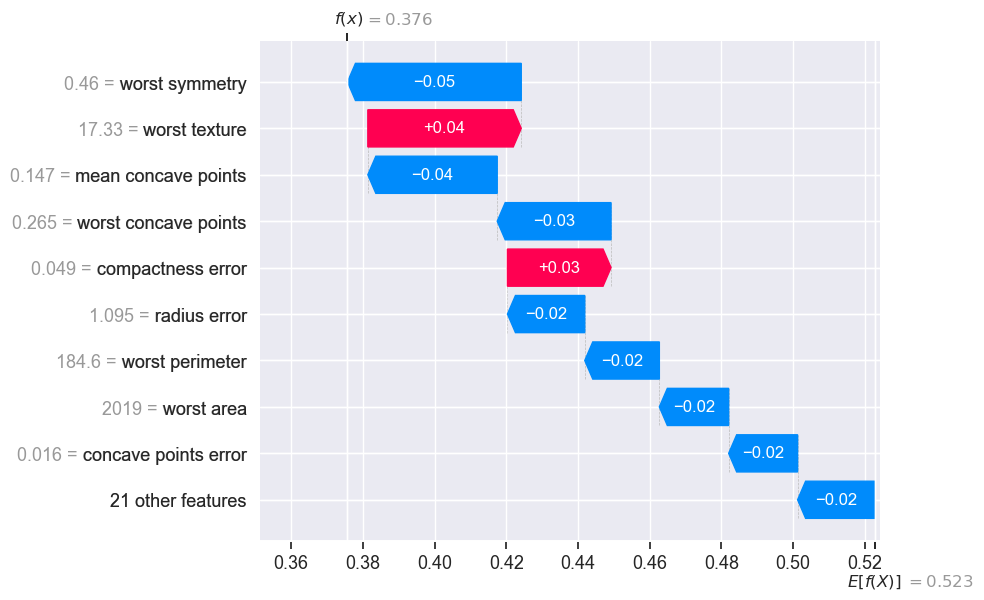

In [ ]:
shap.plots.waterfall(shap_values[0])

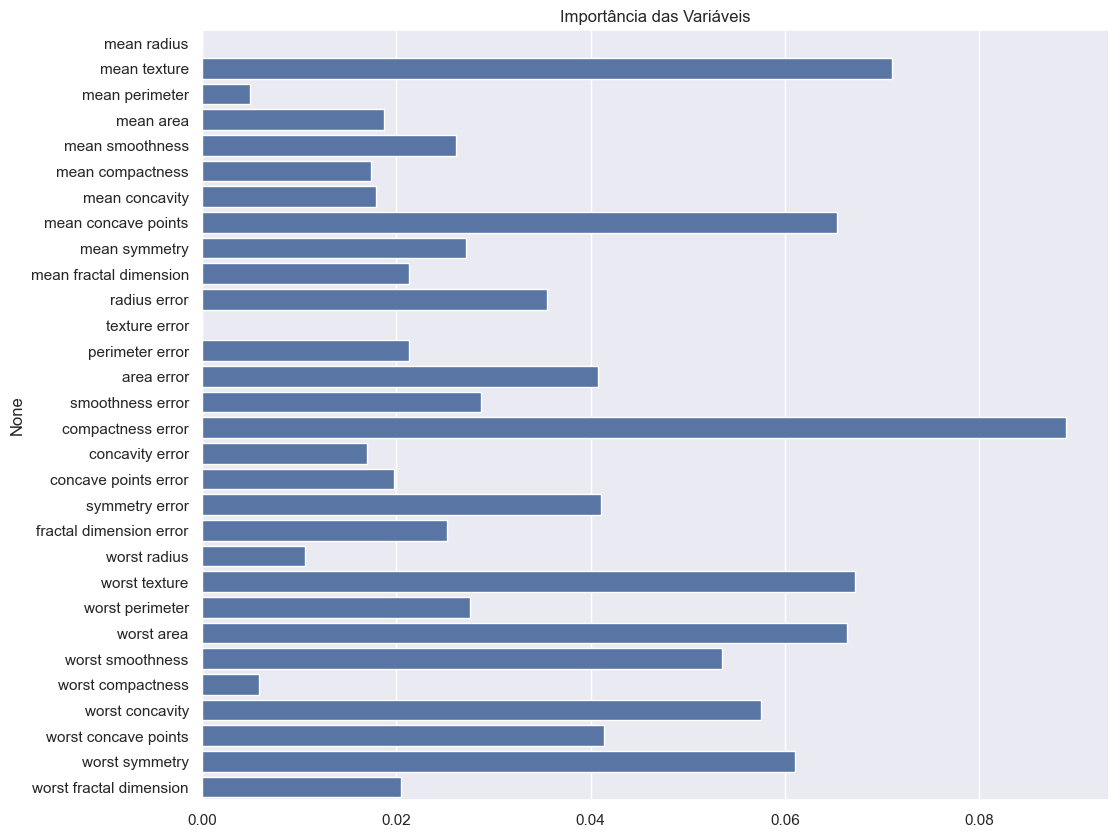

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(y=X_Df.columns, x=best_model.feature_importances_)
plt.title('Importância das Variáveis')
plt.show()

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Melhores parâmetros encontrados: {'n_estimators': 150, 'learning_rate': 1.5}
Acurácia: 0.9707602339181286
Precisão: 0.9724770642201835
Recall: 0.9814814814814815
AUC: 0.9955908289241623


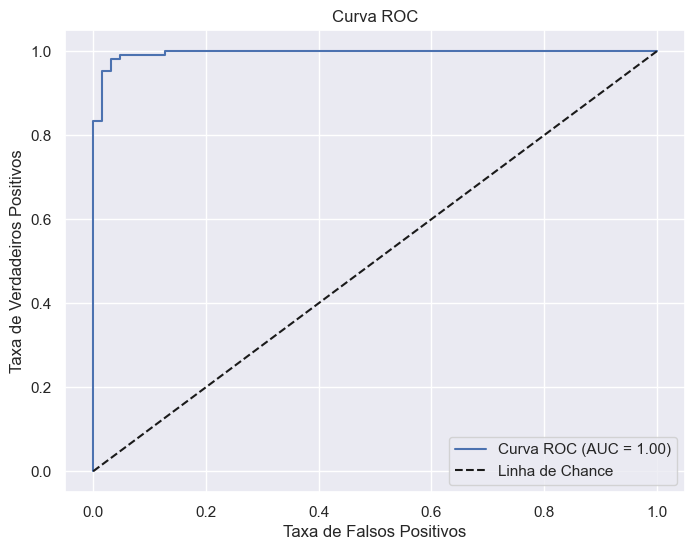

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir os dados em conjuntos de treinamento e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instanciar o classificator de árvore de decisão
dt = AdaBoostClassifier(algorithm='SAMME',random_state=42)

# Definir o dicionário com os hiperparâmetros a serem avaliados
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0, 1.5],

}
# Configurar o k-fold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar o RandomizedSearchCV com 5 folds e 100 iterações
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Ajustar o modelo com os dados de treinamento
random_search.fit(X_train, y_train)

# Obter o melhor estimador a partir da busca
best_model = random_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Exibir os melhores parâmetros e as métricas
print("Melhores parâmetros encontrados:", random_search.best_params_)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Linha de Chance')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_Df = pd.DataFrame(X, columns=data.feature_names)
import shap
def f(x):
    return best_model.predict_proba(x)[:, 1]


med = X_Df.mean().values.reshape((1, X_Df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_Df.iloc[0:1000, :])

PermutationExplainer explainer: 570it [00:44,  9.84it/s]                         


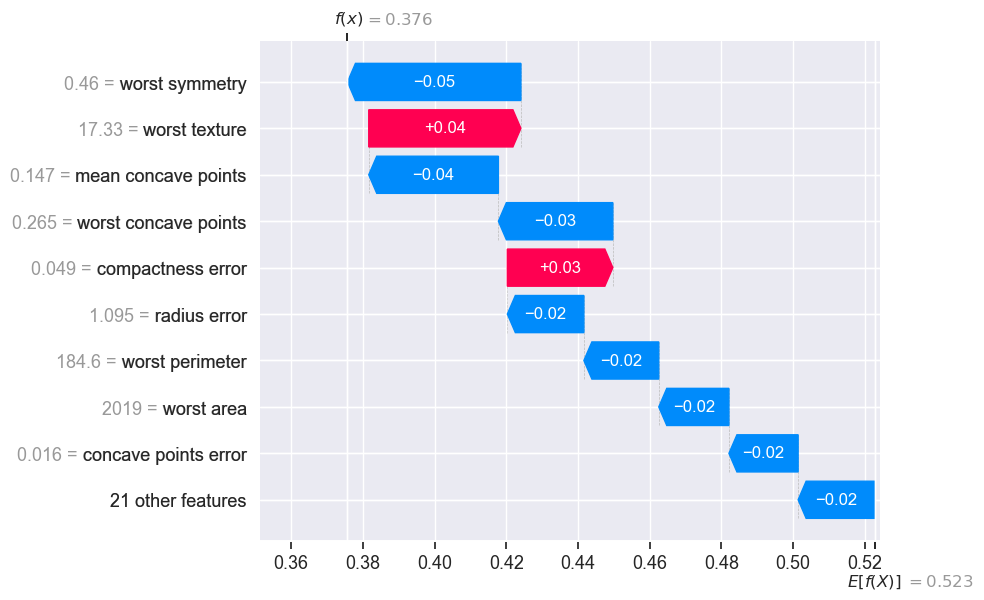

In [ ]:
shap.plots.waterfall(shap_values[0])

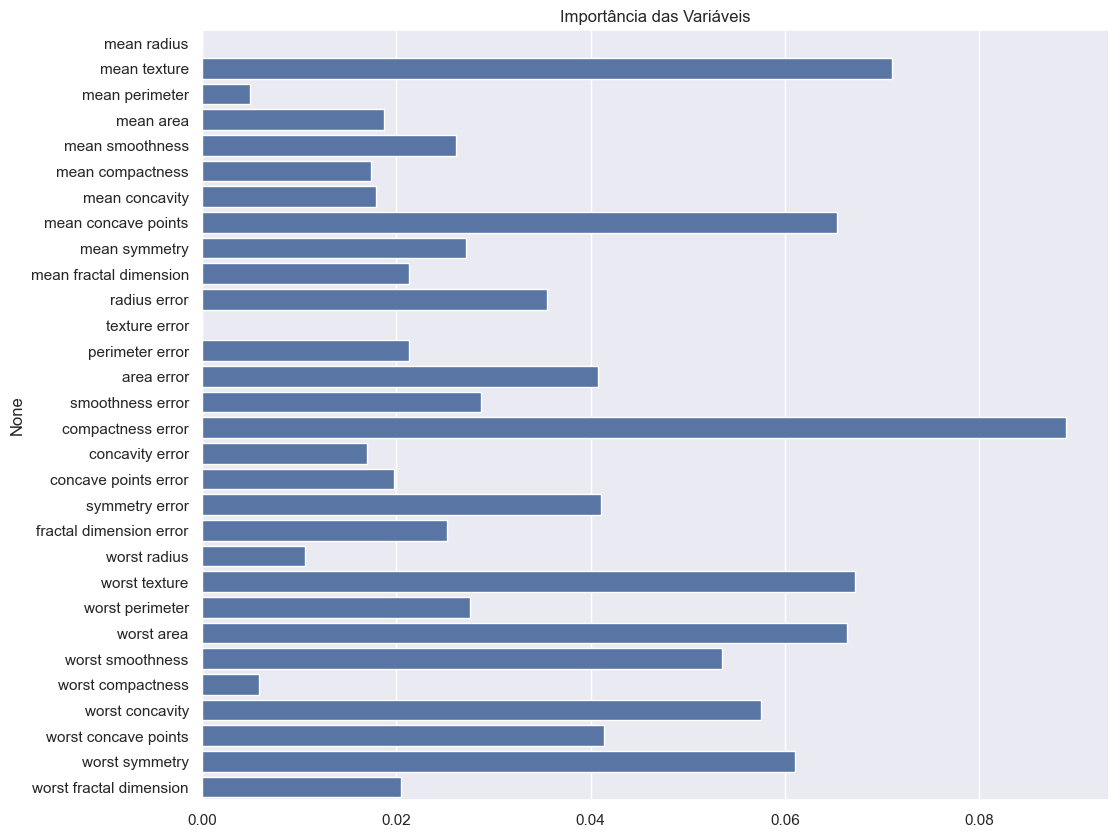

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(y=X_Df.columns, x=best_model.feature_importances_)
plt.title('Importância das Variáveis')
plt.show()

### Gradient Boosting

O Gradient Boosting é um método de ensemble que constrói um modelo preditivo forte combinando vários modelos fracos, geralmente árvores de decisão rasas, de forma sequencial. Diferente de outros métodos de boosting—como o AdaBoost, que ajusta os pesos das amostras para dar maior ênfase às classificações erradas—o Gradient Boosting foca em reduzir os erros residuais do modelo atual, aplicando uma espécie de "gradiente descendente" no espaço das funções preditivas


**Como Funciona o Gradient Boosting**

O algoritmo consiste em uma série de passos iterativos onde, a cada etapa, um novo modelo é treinado para corrigir os erros (ou resíduos) do modelo agregado até então.

1. **Inicialização do Modelo**

Inicialmente, o algoritmo define um modelo simples ( $f_0(x)$ ) como ponto de partida.

 - Para regressão: Um valor constante, normalmente a média dos valores-alvo.
 - Para classificação: Pode ser escolhido o log-odds ou um valor constante relacionado à distribuição das classes.

2. **Iterações Sequenciais (Forward Stagewise)**

    Para cada iteração ( $t = 1, 2, \dots, T$ ):

    1. **Cálculo dos Resíduos (Pseudo-resíduos):**

        O algoritmo calcula o negativo do gradiente da função de perda em relação à previsão atual ( $f_{t-1}(x)$ ).
        - Em problemas de regressão com erro quadrático, os resíduos são simplesmente:[ $r_{ti} = y_i - f_{t-1}(x_i)$ ]
        - Em problemas de classificação, a definição dos pseudo-resíduos depende da função de perda escolhida (por exemplo, perda logística).

    2. **Treinamento do Modelo Fraco:**

        Um novo modelo fraco (geralmente uma árvore de decisão com profundidade limitada) é treinado para prever esses resíduos ( $r_{ti}$ ). Esse modelo, chamado de ( $h_t(x)$ ), tenta captar a variação que o modelo corrente não explicou.
        
    3. **Atualização do Modelo Agregado:**

        O modelo final é atualizado de forma aditiva:[ $f_t(x) = f_{t-1}(x) + \eta \cdot h_t(x)$ ]
        
        Onde:
        - ( $\eta$ ) é a taxa de aprendizado (learning rate), um parâmetro que controla o tamanho do passo de cada nova adição.
        - O somatório acumulado das contribuições dos modelos fracos vai aproximando o modelo final da função ideal, minimizando a função de perda definida.

3. **Resultado Final**:

    Após ( T ) iterações, o modelo final é uma soma ponderada dos modelos fracos:
    $$f(x) = f_0(x) + \eta \sum_{t=1}^{T} h_t(x) $$
    Na prática, esse modelo é utilizado para realizar as previsões:
    - Regrssão: O valor final ( $f(x)$ ) é a predição.
    - Classificação: Normalmente, para problemas binários, aplica-se uma transformação logística à predição e toma-se a classe com base na probabilidade resultante.









![image.png](attachment:image.png)

**Parâmetros Principais e Considerações**:

- **n_estimators**: Número total de modelos fracos (iterações). Mais estimadores podem aumentar a capacidade do modelo, mas também o tempo de treinamento.
- **learning_rate**: Reduz a influência de cada árvore adicionada. Uma taxa menor geralmente demanda mais estimadores, mas pode levar a melhor desempenho e prevenir overfitting.
- **max_depth**: Limita a complexidade de cada árvore. Árvores rasas (por exemplo, max_depth=3) são comumente usadas para atuar como classificadores ou regressoras fracos.
- **subsample**: Permite usar uma fração das amostras disponíveis para treinar cada árvore, ajudando a reduzir o overfitting.
- **loss**: A função de perda a ser minimizada. No GradientBoostingClassifier, o padrão é a deviance (perda logística) para problemas de classificação binária, e no GradientBoostingRegressor costuma ser o erro quadrático para regressão.





Vantagens e Desafios
- Vantagens:

    - Flexibilidade: Permite otimizar quase qualquer função de perda diferenciável.
    - Desempenho: Muito eficaz em diversas tarefas, ganhando competições.
    - Controle de Complexidade: Parâmetros como learning_rate e max_depth ajudam a prevenir overfitting.

- Desafios:

    - Sensibilidade a Ruídos: Pode ser sensível a outliers.
    - Tempo de Treinamento: Com um número elevado de estimadores e dados grandes, o tempo de treinamento pode crescer.
    - Ajuste de Parâmetros: Requer ajuste cuidadoso dos hiperparâmetros para obter o melhor balanço entre viés e variância.






#### Aplicação Sklearn

<div style="text-align: center;">
    <iframe type="text/html" src="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html" width="90%" height="500" style="text-align: center; border: solid; border-radius: 10px">
</div>

#### Python

Média da Precisão: 0.9114123163095126
Média do Recall: 0.9359999999999999
Média do AUC: 0.9766200000000002
Média do Gini: 0.9532399999999999


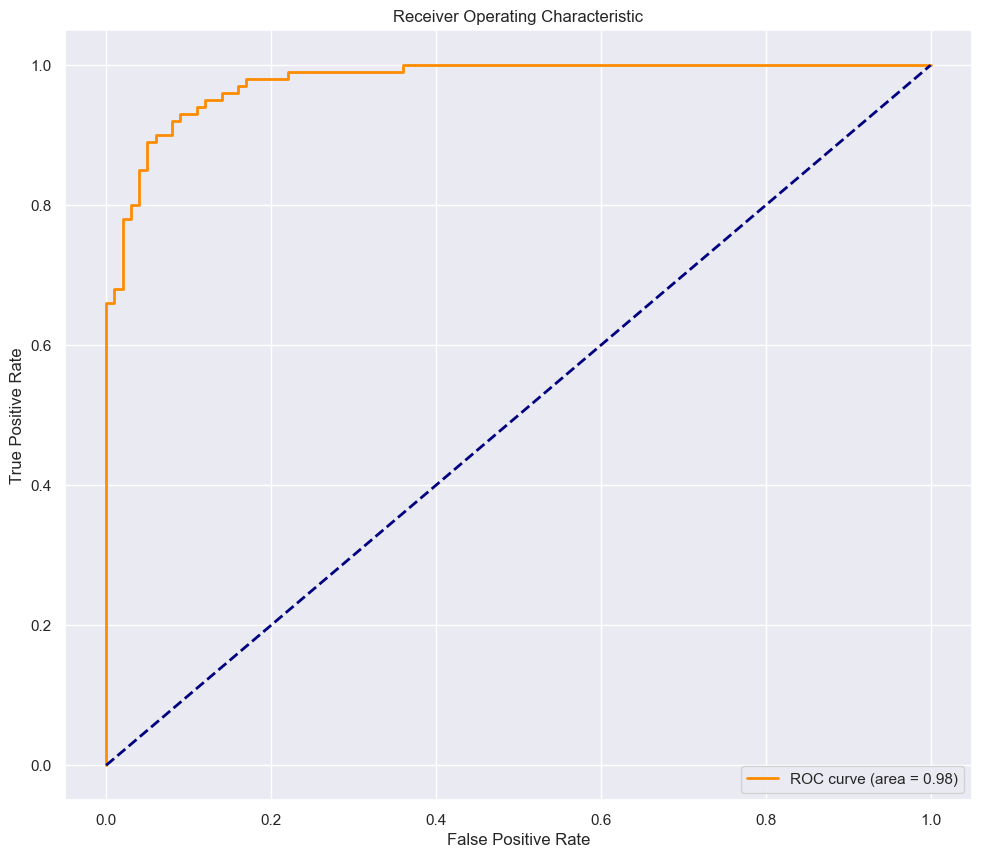

In [ ]:
from sklearn.datasets import load_iris, make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


# Criando um conjunto de dados fictício
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=42)
# Transformando em DataFrame para melhor visualização
# X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])


# Configurar o k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar métricas
conf_matrices = []
precisions = []
recalls = []
aucs = []
ginis = []

# Loop pelos folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Treinar o modelo
    clf = GradientBoostingClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Previsões
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    
    # Matriz de confusão
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Precisão e recall
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
    # AUC e Gini
    auc_score = roc_auc_score(y_test, y_proba[:, 1])
    aucs.append(auc_score)
    ginis.append(2 * auc_score - 1)

# Exibir métricas médias
print("Média da Precisão:", np.mean(precisions))
print("Média do Recall:", np.mean(recalls))
print("Média do AUC:", np.mean(aucs))
print("Média do Gini:", np.mean(ginis))

# Plotar a curva ROC do último fold
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Melhores parâmetros encontrados: {'ccp_alpha': 0.0, 'learning_rate': 1.5, 'loss': 'exponential', 'max_leaf_nodes': 10, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 50, 'subsample': 1.0}
Acurácia: 0.9590643274853801
Precisão: 0.963302752293578
Recall: 0.9722222222222222
AUC: 0.9939741328630217


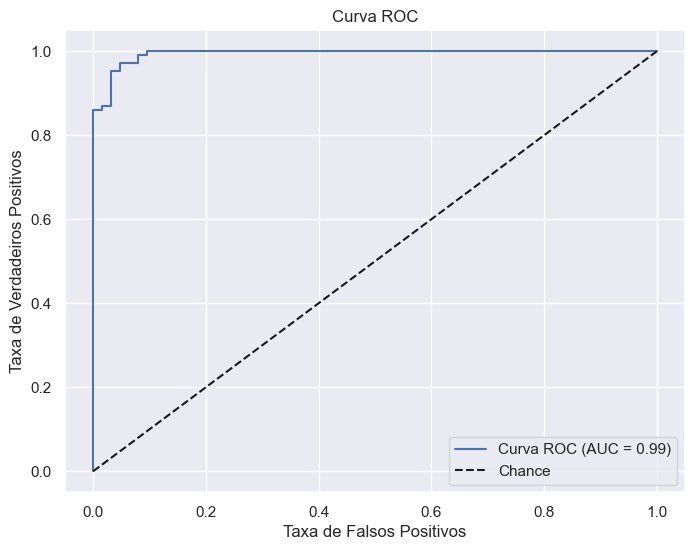

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instanciar o classificador de árvore de decisão
dt = GradientBoostingClassifier(random_state=42)

# Definir o grid de hiperparâmetros
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0, 0.5, 1.5],
    'n_estimators': [50, 100, 150],
    'subsample': [0.5, 1.0],
    # 'max_depth': [1, 3, 5, 10],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.05, 0.1],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_leaf_nodes': [None, 10, 20],

}


# Configurar o k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar o GridSearchCV com validação cruzada (5 folds)
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=1
)

# Ajustar o modelo com os dados de treinamento
grid_search.fit(X_train, y_train)

# Obter o melhor estimador encontrado na busca
best_model = grid_search.best_estimator_

# Previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Exibir os melhores parâmetros e as métricas
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_Df = pd.DataFrame(X, columns=data.feature_names)
import shap
def f(x):
    return best_model.predict_proba(x)[:, 1]


med = X_Df.mean().values.reshape((1, X_Df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_Df.iloc[0:1000, :])

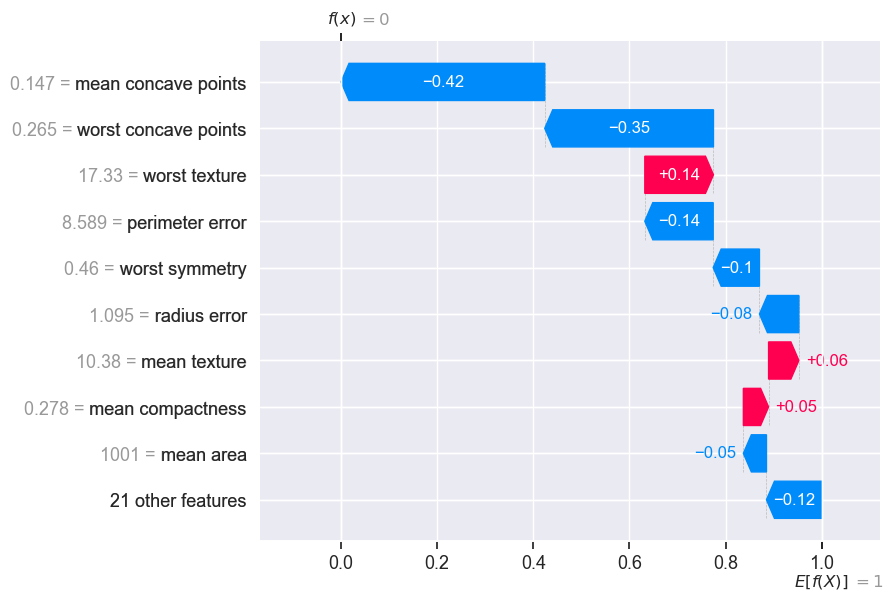

In [ ]:
shap.plots.waterfall(shap_values[0])

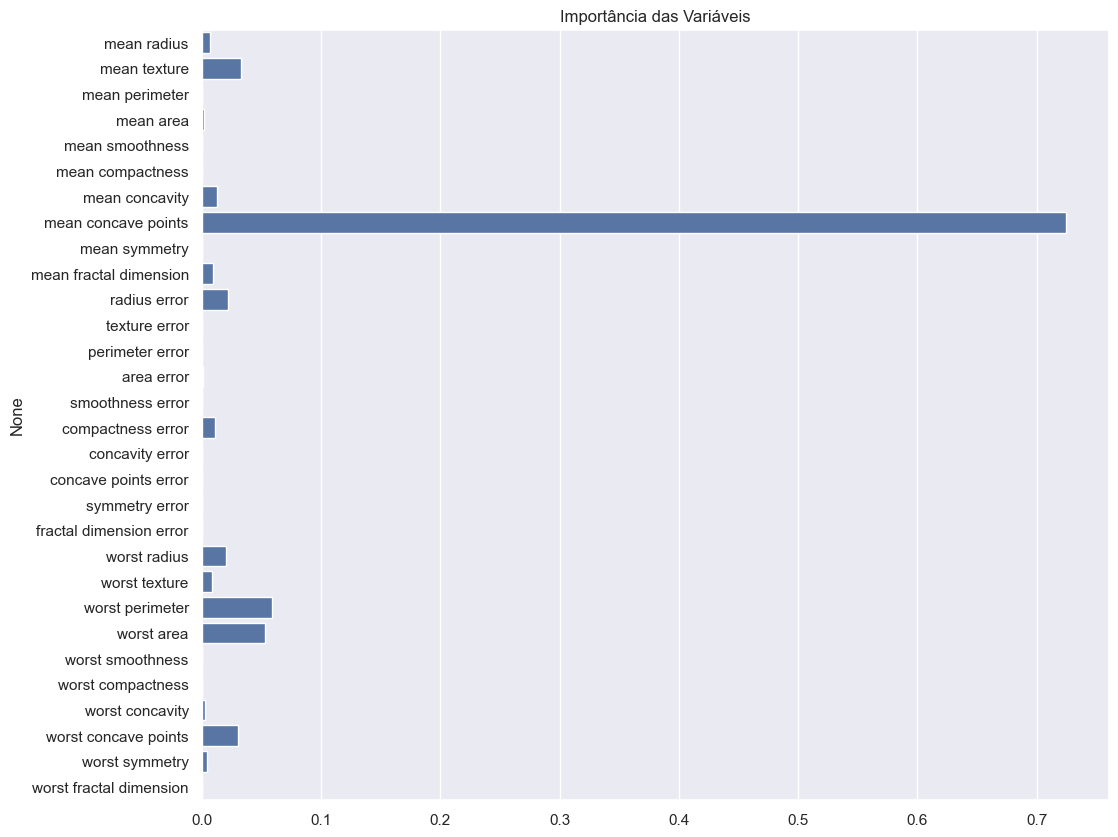

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(y=X_Df.columns, x=best_model.feature_importances_)
plt.title('Importância das Variáveis')
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores parâmetros encontrados: {'subsample': 0.5, 'n_estimators': 150, 'min_weight_fraction_leaf': 0.0, 'max_leaf_nodes': 10, 'loss': 'exponential', 'learning_rate': 1.5, 'ccp_alpha': 0.0}
Acurácia: 0.9532163742690059
Precisão: 0.9629629629629629
Recall: 0.9629629629629629
AUC: 0.993533215755438


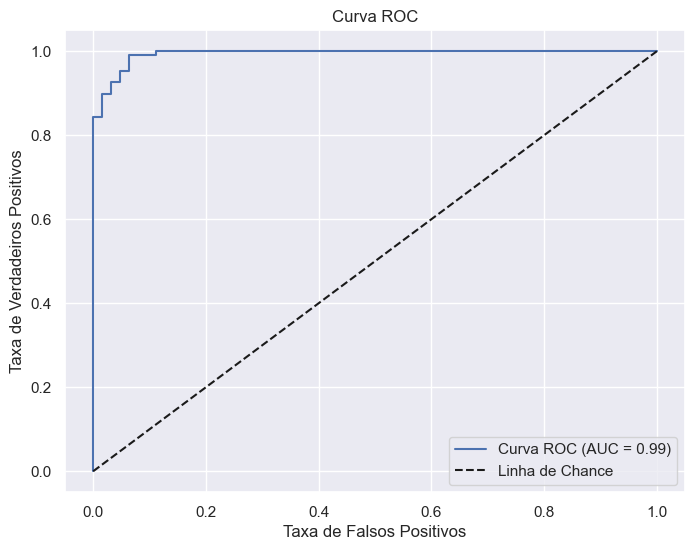

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve
)

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir os dados em conjuntos de treinamento e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instanciar o classificator de árvore de decisão
dt = GradientBoostingClassifier(random_state=42)

# Definir o dicionário com os hiperparâmetros a serem avaliados
param_dist =  {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0, 0.5, 1.5],
    'n_estimators': [50, 100, 150],
    'subsample': [0.5, 1.0],
    # 'max_depth': [1, 3, 5, 10],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.05, 0.1],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_leaf_nodes': [None, 10, 20],

}
# Configurar o k-fold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar o RandomizedSearchCV com 5 folds e 100 iterações
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Ajustar o modelo com os dados de treinamento
random_search.fit(X_train, y_train)

# Obter o melhor estimador a partir da busca
best_model = random_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Exibir os melhores parâmetros e as métricas
print("Melhores parâmetros encontrados:", random_search.best_params_)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Linha de Chance')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_Df = pd.DataFrame(X, columns=data.feature_names)
import shap
def f(x):
    return best_model.predict_proba(x)[:, 1]


med = X_Df.mean().values.reshape((1, X_Df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_Df.iloc[0:1000, :])

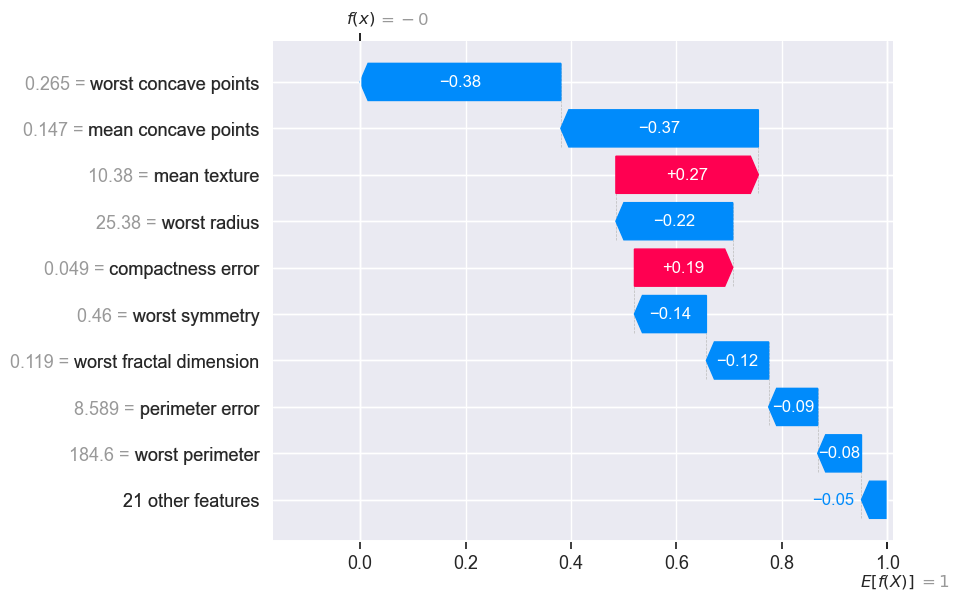

In [ ]:
shap.plots.waterfall(shap_values[0])

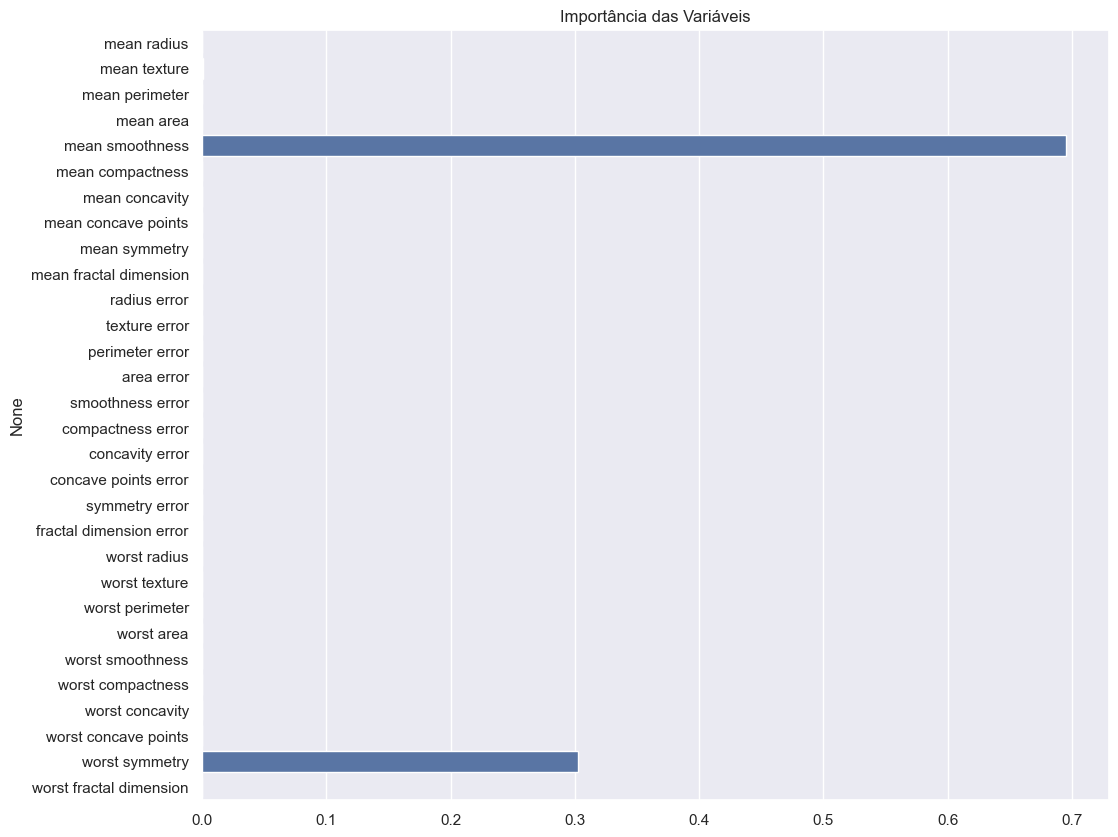

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,10)})
sns.barplot(y=X_Df.columns, x=best_model.feature_importances_)
plt.title('Importância das Variáveis')
plt.show()

## Xgboosting

A seguir, segue uma explicação detalhada sobre o XGBoost – do inglês *eXtreme Gradient Boosting* – que é um dos algoritmos de **boosting** por gradiente mais populares e eficientes, muito utilizado em problemas de regressão e classificação. Esse algoritmo constrói um modelo aditivo, onde cada novo modelo (tipicamente uma árvore de decisão) corrige os erros residuals do conjunto dos modelos anteriores, fazendo uso de informações de segunda ordem (gradiente e hessiana) e regularização para diminuir o risco de overfitting.

---

**## 1. Etapas do Algoritmo**

**### a) Inicialização  **

- **Predição Inicial:**  
  O algoritmo começa com uma predição inicial constante para todos os exemplos. Por exemplo, em um problema de regressão, essa predição pode ser a média dos valores alvo.  
  \[
  $$\hat{y}_i^{(0)} = \text{constante} \quad \text{para todo } i$$
  \]

**### b) Iteração (Boosting Round)**

Para cada rodada de boosting (para \( m = 1 \) até \( M \), onde \( M \) é o número de árvores):

1. **Cálculo dos Resíduos e Derivadas:**  
   - **Gradiente:** \( $g_i = \frac{\partial l(y_i, \hat{y}^{(m-1)}_i)}{\partial \hat{y}^{(m-1)}_i}$ \)  
   - **Hessiana:** \( $h_i = \frac{\partial^2 l(y_i, \hat{y}^{(m-1)}_i)}{\partial (\hat{y}^{(m-1)}_i)^2}$ \)  
   
   Essas derivadas são calculadas a partir da função de perda \( $l(y_i, \hat{y}_i)$ \) e fornecem uma medida de quanto e em que direção o modelo precisa ser ajustado.

2. **Construção da Árvore \( f_m(x) \):**  

   A árvore é construída para minimizar uma aproximação de segundo grau da função de perda. Essa aproximação é feita através de uma expansão de Taylor:
   \[
   $$L^{(m)} \approx \sum_{i=1}^n \left[ l\left(y_i, \hat{y}_i^{(m-1)}\right) + g_i f_m(x_i) + \frac{1}{2} h_i f_m(x_i)^2 \right] + \Omega(f_m)$$
   \]
   onde a função de regularização é dada por:
   \[
   $$\Omega(f) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^{T} w_j^2$$
   \]
   - \( T \): número de folhas (terminal nodes) da árvore  
   - \( w_j \): peso associado à folha \( j \)  
   - \( \gamma \) e \( \lambda \): parâmetros que controlam a regularização

3. **Cálculo do Ganho para um Split:**  
   Quando se decide dividir um nó, o ganho é calculado para determinar se o split melhora significativamente a redução da perda. A fórmula para o ganho (com uma penalização adicional \( \gamma \)) é:
   \[
   $$\text{Gain} = \frac{1}{2} \left[\frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{\left(G_L + G_R\right)^2}{H_L + H_R + \lambda}\right] - \gamma$$
   \]
   - \( G_L \) e \( H_L \): soma dos gradientes e das hessianas no nó esquerdo  
   - \( G_R \) e \( H_R \): soma dos gradientes e das hessianas no nó direito

4. **Atualização do Modelo:**  
   Após a construção da árvore \( $f_m(x)$ \), o modelo é atualizado adicionando-se a nova árvore ponderada por um fator de *learning rate* (taxa de aprendizado, \( $\eta$ \)):
   \[
   $$\hat{y}_i^{(m)} = \hat{y}_i^{(m-1)} + \eta f_m(x_i)$$
   \]

5. **Iteração até Convergência:**  
   O processo é repetido até que o número de iterações (ou árvores) desejado seja atingido ou até que o modelo não apresente mais ganhos significativos em termos de redução da função de perda.

---

**### ASCII Diagram do Processo**

```
                      XGBoost - Processo de Boosting
      +-----------------------------------------------------+
      |         Modelo Inicial (Predição Constante)         |
      +-----------------------------------------------------+
                           |
                           v
               +---------------------------+
               |  Calcular Erro / Resíduo  |
               +---------------------------+
                           |
                           v
           +--------------------------------+
           | Calcular Gradiente (g) &       |
           | Hessiana (h) para cada exemplo |
           +--------------------------------+
                           |
                           v
               +---------------------------+
               |   Construir uma Árvore    |
               |   (Baseado em g e h, com   |
               |     divisão via ganho)     |
               +---------------------------+
                           |
                           v
             +-----------------------------------+
             | Atualizar o Modelo:               |
             | y_pred <- y_pred + eta * f_m(x)     |
             +-----------------------------------+
                           |
                           v
           +------------------------------------+
           | Repetir o processo para m = 1,...,M |
           +------------------------------------+
                           |
                           v
             +-----------------------------------+
             |        Predição Final             |
             +-----------------------------------+
```

---

**## 2. Principais Hiperparâmetros e Seus Efeitos**

Cada hiperparâmetro controla aspectos específicos do modelo e pode afetar o desempenho e a capacidade de generalização:

1. **Learning Rate (\( $\eta$ \))**  
   - **Descrição:** Controla a contribuição de cada nova árvore na atualização do modelo.  
   - **Efeito:**  
     - Valores baixos (ex.: 0.01–0.1) resultam em ajustes mais graduais, exigindo mais árvores para convergência, mas geralmente promovem melhor generalização.  
     - Valores altos podem acelerar o treinamento, mas aumentam o risco de overfitting e instabilidade na convergência.

2. **Número de Estimadores (\( $n\_estimators$ \))**  
   - **Descrição:** Número total de árvores (ou rounds) a serem construídas.  
   - **Efeito:**  
     - Um número maior aumenta a capacidade do modelo, mas também o risco de overfitting se usado em conjunto com uma alta taxa de aprendizado.

3. **Profundidade Máxima (\( $max\_depth$ \))**  
   - **Descrição:** Limita a profundidade máxima de cada árvore.  
   - **Efeito:**  
     - Profundidades maiores possibilitam a modelagem de interações complexas, mas podem levar a modelos excessivamente complexos e sobreajustados.  
     - Profundidades menores resultam em árvores “rasas”, que são mais simples e menos propensas a overfitting, mas podem subajustar se o padrão dos dados for complexo.

4. **Min_child_weight**  
   - **Descrição:** Valor mínimo da soma dos pesos de amostras necessários em um nó para que ele seja dividido.  
   - **Efeito:**  
     - Valores maiores tornam as árvores mais conservadoras, prevenindo splits que não tragam melhora significativa e ajudando a evitar overfitting.  
     - Valores menores podem permitir splits em nós com poucos dados, aumentando o risco de ruído ser incorporado ao modelo.

5. **Gamma (\( $\gamma$ \)) ou min_split_loss  
   - **Descrição:** Mínima redução na perda exigida para que um split seja realizado.  
   - **Efeito:**  
     - Um gamma maior exige que somente divisões com ganhos significativos sejam aceitas, simplificando o modelo.  
     - Um gamma menor permite divisões mais “frívolas” que podem capturar ruídos.

6. **Subsample**  
   - **Descrição:** Proporção das amostras usadas para cada árvore.  
   - **Efeito:**  
     - Valores menores (ex.: 0.5–0.9) ajudam a reduzir a variância, promovendo um efeito semelhante ao *bagging*, o que pode reduzir o risco de overfitting.  
     - Subsample igual a 1 utiliza toda a base de dados, podendo aumentar a correlação entre as árvores.

7. **Colsample_bytree**  
   - **Descrição:** Proporção das features (colunas) consideradas para construir cada árvore.  
   - **Efeito:**  
     - Reduzir esse valor pode levar a uma maior diversidade entre as árvores e melhorar a generalização, sobretudo em dados com muitas features redundantes ou correlacionadas.

8. **Regularização L1 (\( $reg\_alpha$ \)) e L2 (\( $reg\_lambda$ \))**  
   - **Descrição:** Parâmetros de regularização que penalizam os pesos das folhas.  
   - **Efeito:**  
     - **L1 ($reg\_alpha$):** Encoraja a esparsidade, podendo zerar alguns pesos e simplificar o modelo.  
     - **L2 ($reg\_lambda$):** Penaliza os pesos altos de forma quadrática, o que ajuda a reduzir a magnitude dos pesos e melhora a estabilidade.

---

**## 3. Fórmulas Matemáticas-Chave**

1. **Atualização do Modelo:**  
   Cada iteração adiciona a predição da nova árvore ao modelo atual:
   \[
   $$\hat{y}_i^{(m)} = \hat{y}_i^{(m-1)} + \eta f_m(x_i)$$
   \]

2. **Expansão de Taylor para Aproximação da Função de Perda:**  
   Ao aproximar a perda depois da inclusão da árvore \( f_m \):
   \[
   $$L^{(m)} \approx \sum_{i=1}^n \left[ l\left(y_i, \hat{y}^{(m-1)}_i\right) + g_i f_m(x_i) + \frac{1}{2} h_i f_m(x_i)^2 \right] + \Omega(f_m)$$
   \]
   onde:
   \[
   $$g_i = \frac{\partial l(y_i, \hat{y}^{(m-1)}_i)}{\partial \hat{y}^{(m-1)}_i}, \quad h_i = \frac{\partial^2 l(y_i, \hat{y}^{(m-1)}_i)}{\partial (\hat{y}^{(m-1)}_i)^2}$$
   \]

3. **Função de Regularização da Árvore:**  
   Penaliza a complexidade da árvore, onde \( T \) é o número de folhas e \( w_j \) os pesos:
   \[
   $$\Omega(f) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^{T} w_j^2$$
   \]

4. **Cálculo do Ganho para Divisão de um Nó:**  
   Dados os somatórios dos gradientes e Hessianas dos nós esquerdo (L) e direito (R):
   \[
   $$\text{Gain} = \frac{1}{2} \left[\frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{\left(G_L + G_R\right)^2}{H_L + H_R + \lambda}\right] - \gamma$$
   \]

---

**## Conclusão**

O XGBoost integra de forma engenhosa técnicas de otimização de gradiente, regularização e amostragem (tanto de linhas quanto de colunas) para criar modelos robustos e escaláveis. Cada hiperparâmetro atua em um aspecto específico (taxa de aprendizado, complexidade das árvores, regularização, etc.), e seu ajuste fino é fundamental para obter um bom desempenho e evitar tanto subajuste quanto sobreajuste. Na prática, a combinação cuidadosa desses parâmetros – geralmente ajustada por meio de validação cruzada ou técnicas de busca (grid search, random search ou métodos bayesianos) – pode levar a resultados excepcionais em diversas tarefas de predição.

Caso você queira se aprofundar ainda mais, podemos explorar como ajustar esses hiperparâmetros em experimentos reais ou comparar o XGBoost com outros algoritmos de boosting. Há também variações e extensões, como o uso de GPU para aceleração do treinamento e a integração em pipelines de machine learning.

## LGBM

A seguir, apresento uma explicação detalhada do LightGBM (Light Gradient Boosting Machine), abordando as etapas do algoritmo, os principais hiperparâmetros e como cada um deles afeta o modelo, ilustrando também com um esquema em ASCII e fórmulas matemáticas essenciais.

---

**## 1. O que é o LightGBM?**

O LightGBM é uma biblioteca de boosting baseada em gradientes desenvolvida para ser rápida e escalável. Ele se destaca por utilizar:

- **Histograma de Features:** Agrupa valores contínuos em bins discretos para acelerar a busca pelo melhor split e reduzir o uso de memória.
- **Crescimento Leaf-wise:** Em vez de construir árvores de forma nível a nível (*level-wise*), ele adota uma abordagem **leaf-wise**, onde a cada iteração a folha que gera a maior redução na perda é dividida. Essa estratégia pode capturar relações complexas, mas exige cuidado com a regularização para evitar overfitting.

---

**## 2. Etapas do Algoritmo LightGBM**

**a) Inicialização**

- **Predição Inicial:**  
  O modelo começa com uma predição inicial constante para todos os exemplos. Em muitos casos, para problemas de regressão, essa predição é definida como a média dos valores alvo:
  \[
  $$\hat{y}^{(0)}_i = \text{constante} \quad \text{para todo } i$$
  \]

**b) Iteração (para m = 1 até M)**

Para cada iteração, o LightGBM realiza os seguintes passos:

1. **Cálculo dos Gradientes e Hessianas:**  
   A partir da função de perda \( $l(y_i, \hat{y}_i)$ \), calcula-se para cada exemplo:
   - **Gradiente:** \( $g_i = \frac{\partial l(y_i, \hat{y}^{(m-1)}_i)}{\partial \hat{y}^{(m-1)}_i}$ \)  
   - **Hessiana:** \( $h_i = \frac{\partial^2 l(y_i, \hat{y}^{(m-1)}_i)}{\partial (\hat{y}^{(m-1)}_i)^2}$ \)  

   Essas quantidades indicam, respectivamente, o quanto e em que direção o modelo precisa ser ajustado.

2. **Construção dos Histogramas:**  
   Antes de buscar os melhores splits, o LightGBM discretiza os valores contínuos de cada feature em um número pré-definido de **bins**. Essa etapa reduz o custo computacional, permitindo uma busca rápida e eficiente dos melhores cortes.

3. **Construção da Árvore com Estratégia Leaf-wise:**  
   Diferentemente dos métodos *level-wise*, no qual todas as folhas de um mesmo nível são divididas simultaneamente, o LightGBM:
   
   - **Seleção da Folha Ideal:** Identifica a folha que, se dividida, trará a maior redução na função de perda.
   - **Cálculo do Ganho do Split:**  
     Para uma divisão candidata, o ganho (ou redução da perda) é calculado por:
     \[
     $$\text{Gain} = \frac{1}{2}\left(\frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L+ H_R + \lambda}\right) - \gamma$$
     \]
     Aqui:
     - \(G_L\) e \(H_L\) são a soma dos gradientes e das hessianas da parte esquerda da divisão;
     - \(G_R\) e \(H_R\) são os correspondentes da parte direita;
     - \($\lambda$\) e \($\gamma$\) são termos de regularização que penalizam splits que não tragam um ganho significativo.

4. **Atualização do Modelo:**  
   Após construir a árvore \( $f_m(x)$ \) baseada nos splits escolhidos, o modelo é atualizado de forma aditiva:
   \[
   $$\hat{y}^{(m)}_i = \hat{y}^{(m-1)}_i + \eta\, f_m(x_i)$$
   \]
   onde \($\eta$\) é o *learning rate*, controlando o tamanho do ajuste.

5. **Iteração até Convergência:**  
   Esse processo se repete por \( M \) iterações (ou até que um critério de parada seja atingido), refinando o modelo a cada etapa.

---

**## 3. Principais Hiperparâmetros e seus Efeitos**

Cada hiperparâmetro controla um aspecto específico do modelo:

1. **Learning Rate (\(\eta\))**  
   - **Descrição:** Define o tamanho dos passos na atualização do modelo.  
   - **Efeito:** Taxas menores proporcionam ajustes mais graduais e geralmente melhor generalização, exigindo mais iterações. Taxas maiores aceleram o treinamento, porém aumentam o risco de overfitting.

2. **Número de Iteradores (n_estimators ou num_boost_round)**  
   - **Descrição:** Número total de árvores a serem construídas.  
   - **Efeito:** Aumentar o número de iteradores pode melhorar a performance, mas se combinado com um learning rate alto, eleva o risco de overfitting.

3. **Número de Folhas (num_leaves)**  
   - **Descrição:** Define o número máximo de folhas em cada árvore.  
   - **Efeito:** Um número maior permite capturar interações mais complexas, aumentando a capacidade do modelo. Contudo, números excessivamente altos sem regularização podem levar a modelos altamente sobreajustados.

4. **Máxima Profundidade (max_depth)**  
   - **Descrição:** Limita a profundidade da árvore.  
   - **Efeito:** Restringe o nível de interações que o modelo pode aprender. Profundidades elevadas podem modelar padrões complexos, mas também correm maior risco de overfitting; valores baixos promovem árvores mais simples.

5. **min_data_in_leaf**  
   - **Descrição:** Quantidade mínima de amostras necessárias em uma folha para que ocorra uma divisão.  
   - **Efeito:** Valores maiores garantem que cada folha tenha dados suficientes, tornando as divisões mais robustas e ajudando a mitigar o overfitting.

6. **feature_fraction**  
   - **Descrição:** Proporção das features escolhidas aleatoriamente em cada iteração para a construção da árvore.  
   - **Efeito:** Ao utilizar apenas uma fração das features, o modelo promove diversidade entre as árvores, reduzindo a correlação e prevenindo overfitting. Por exemplo, um valor de 0.8 significa que 80% das features são usadas em cada árvore.

7. **bagging_fraction** e **bagging_freq**  
   - **Descrição:**  
     - *bagging_fraction* define a fração dos dados usados para treinar cada árvore.
     - *bagging_freq* especifica com que frequência (a cada quantas iterações) essa amostragem é aplicada.
   - **Efeito:** Essa técnica de amostragem pode diminuir a variância, melhorando a robustez do modelo.

8. **Regularização (lambda_l1, lambda_l2)**  
   - **Descrição:** Penalizações L1 e L2 aplicadas aos pesos das folhas.  
   - **Efeito:** Ajudam a controlar a complexidade do modelo, prevenindo overfitting ao restringir pesos excessivos.

---

**## 4. Fórmulas Matemáticas-Chave**

1. **Atualização do Modelo:**
   \[
   $$\hat{y}^{(m)}_i = \hat{y}^{(m-1)}_i + \eta\, f_m(x_i)$$
   \]

2. **Expansão de Taylor para Aproximação da Função de Perda:**
   \[
   $$L^{(m)} \approx \sum_{i=1}^{n}\left[g_i f_m(x_i) + \frac{1}{2} h_i f_m(x_i)^2\right] + \Omega(f_m)$$
   \]
   onde \( $\Omega(f_m)$ \) é o termo de regularização que penaliza a complexidade da árvore.

3. **Função de Regularização:**
   \[
   $$\Omega(f_m) = \gamma\, T + \frac{1}{2}\lambda\, \sum_{j=1}^{T} w_j^2$$
   \]
   - \( T \): Número de folhas na árvore.
   - \( $w_j$ \): Peso associado à folha \( j \).
   - \($\gamma$\) e \($\lambda$\): Parâmetros que controlam a penalização (regularização).

4. **Cálculo do Ganho para um Split:**
   \[
   $$\text{Gain} = \frac{1}{2}\left(\frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L+ H_R + \lambda}\right) - \gamma$$
   \]
   Essa fórmula quantifica a redução na perda quando um nó é dividido, onde \($G_L$, $H_L$\) e \($G_R$, $H_R$\) representam as somas dos gradientes e das hessianas nas partições esquerda e direita, respectivamente.

---

**## 5. Esquema ASCII do Processo LightGBM**

```
                    LightGBM - Processo de Boosting
+----------------------------------------------------------+
|          Modelo Inicial (Predição Constante)             |
+----------------------------------------------------------+
                          |
                          v
          +----------------------------------+
          | Calcular Gradientes e Hessianas  |
          |    para cada amostra             |
          +----------------------------------+
                          |
                          v
          +----------------------------------+
          |  Construir Histogramas para      |
          |         cada Feature             |
          +----------------------------------+
                          |
                          v
          +----------------------------------+
          | Selecionar a folha com o maior   |
          |     ganho (redução de perda)     |
          +----------------------------------+
                          |
                          v
          +----------------------------------+
          | Dividir a folha escolhida com o  |
          |     melhor split baseado no      |
          |        cálculo do ganho           |
          +----------------------------------+
                          |
                          v
          +----------------------------------+
          | Atualizar Modelo:                |
          | y_pred = y_pred + eta * f_m(x)     |
          +----------------------------------+
                          |
                          v
          +----------------------------------+
          | Repetir para m = 1, 2, ..., M     |
          +----------------------------------+
                          |
                          v
          +----------------------------------+
          |         Predição Final           |
          +----------------------------------+
```

---

**## Conclusão**

O LightGBM é uma ferramenta poderosa que combina inovações — como o uso de histogramas para acelerar o processamento e a estratégia leaf-wise para crescimento de árvores — com técnicas de regularização eficientes para controlar a complexidade. Cada hiperparâmetro desempenha um papel crucial: enquanto o *learning rate*, número de iterações e o número de folhas definem a velocidade e a capacidade do modelo, parâmetros como *min_data_in_leaf*, *feature_fraction*, e os termos de regularização ajudam a evitar o overfitting.

Essa compreensão detalhada não só permite aplicar o LightGBM de forma eficaz em problemas de regressão e classificação, mas também facilita a sintonização fina do modelo para obter o melhor desempenho possível. Se quiser se aprofundar, podemos explorar casos práticos de ajuste de hiperparâmetros ou comparações com outras bibliotecas de boosting.

## Regressão Logistica

Em estatística, um modelo logístico (ou modelo logit) é um modelo estatístico que modela o log-odds de um evento como uma combinação linear de uma ou mais variáveis independentes. 

Na análise de regressão, a regressão logística (ou regressão logit) estima os parâmetros de um modelo logístico (os coeficientes nas combinações lineares ou não lineares). Na regressão logística binária, existe uma única variável dependente binária, codificada por uma variável indicadora, onde os dois valores são rotulados como "0" e "1", enquanto as variáveis independentes podem ser uma variável binária (duas classes, codificadas por uma variável indicadora) ou uma variável contínua (qualquer valor real). A probabilidade correspondente ao valor rotulado como "1" pode variar entre 0 (certamente o valor "0") e 1 (certamente o valor "1"), daí a rotulagem. 

A função que converte log-odds em probabilidade é a função logística, daí o nome. A unidade de medida para a escala log-odds é chamada de logit (de logistic unit), daí os nomes alternativos. 


Na regressão logística, o termo odds refere-se à relação entre a probabilidade de um evento ocorrer (( P )) e a probabilidade de ele não ocorrer (( 1 - P )). Em termos matemáticos, os odds são expressos como:
$$\text{Odds} = \frac{P}{1 - P} $$

Explicação Intuitiva:
- Se ( P = 0.5 ) (50%), os odds seriam ( 1 ), indicando que o evento é igualmente provável de ocorrer ou não ocorrer.
- Se ( P > 0.5 ), os odds serão maiores que 1, sugerindo que o evento é mais provável de ocorrer.
- Se ( P < 0.5 ), os odds serão menores que 1, indicando que o evento é menos provável de ocorrer.

Por exemplo:
- Se ( P = 0.75 ), os odds seriam ( 0.75 / (1 - 0.75) = 3 ), ou seja, o evento tem 3 vezes mais chance de ocorrer do que não ocorrer.
- Se ( P = 0.2 ), os odds seriam ( 0.2 / (1 - 0.2) = 0.25 ), o que significa que a chance de não ocorrer é 4 vezes maior.

1. **Relação com a Regressão Logística**:

    Na regressão logística, a previsão do modelo é feita no domínio dos log-odds ou logaritmo dos odds, que é representado como:

    $$[ \text{log-odds} = \ln\left(\frac{P}{1 - P}\right) ]$$

    A função linear no modelo logístico é usada para calcular os log-odds:
    $$[ \ln\left(\frac{P}{1 - P}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n ]$$

    A partir disso, o modelo converte os log-odds de volta para a probabilidade (( P )) utilizando a função sigmoide:
    $$[ P = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}} ]$$


2. **Interpretação dos Coeficiente**:

    Cada coeficiente ($\beta_i$) no modelo de regressão logística indica a variação no log-odds associada a um aumento unitário na variável ($x_i$). Para uma interpretação mais direta, você pode converter o coeficiente em odds ratio

    $$[ \text{Odds Ratio} = e^{\beta_i} ]$$

    - Se ($\beta_i$ > 0):

        Um aumento em ($x_i$) multiplica os odds por um fator maior que 1, aumentando a chance do evento ocorrer.

    - Se ($\beta_i$ < 0):

        Um aumento em ($x_i$) multiplica os odds por um fator menor que 1, diminuindo a chance do evento ocorrer.

    - Se ($\beta_i$ = 0):

         A variável ($x_i$) não tem influência sobre os odds.

    
3. **Exemplo**:

    Suponha que para uma variável ($x_1$) temos ($\beta_1$ = 0.7). O correspondente odds ratio será:
    $$[ e^{0.7} \approx 2.01 ]$$

    Isso significa que, para cada aumento unitário em ($x_1$), os odds de ocorrência do evento são multiplicados por aproximadamente 2, ou seja, dobram.

Em resumo, os odds e seus derivados (log-odds e odds ratio) são fundamentais na regressão logística, pois permitem transformar uma relação não linear (na escala de probabilidades) em uma relação linear e, dessa forma, facilitar a estimação e interpretação dos efeitos das variáveis preditoras sobre o resultado.






**Como o modelo de regressão logística do scikit-learn encontra os melhores $\boldsymbol{\beta}$ com explicação matemática**:

O modelo de regressão logística do scikit-learn encontra os melhores valores dos coeficientes ($\boldsymbol{\beta}$) resolvendo um problema de otimização convexa. Em essência, ele estima os valores de $\boldsymbol{\beta}$ que maximizam a verossimilhança dos dados (ou, de forma equivalente, minimizam a função de custo, que é a negativa do log da verossimilhança). A seguir, detalhamos o processo matemático.


1. **Modelo e Probabilidade**

    Na regressão logística para um problema binário ($y \in \{0, 1\}$), definimos a probabilidade de um exemplo pertencer à classe 1, dado o vetor de características $\mathbf{x}$, da seguinte forma:

    $$
    P(y=1 \mid \mathbf{x}; \boldsymbol{\beta}) = \sigma(z) = \frac{1}{1 + e^{-z}}
    $$

    com

    $$
    z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p = \boldsymbol{\beta}^T \mathbf{x}
    $$

    Onde:  
        - **$\boldsymbol{\beta}$** é o vetor de parâmetros (coeficientes).  
         **$\sigma(z)$** é a função sigmoide, que mapeia qualquer valor real para o intervalo ($0,1$).

---

2. **Função de Verossimilhança e Log-Verossimilhança**

    Para um conjunto de $n$ observações $\{(\mathbf{x}_i, y_i)\}_{i=1}^{n}$, a verossimilhança $L(\boldsymbol{\beta})$ é dada por:

    $$
    L(\boldsymbol{\beta}) = \prod_{i=1}^{n} P(y_i \mid \mathbf{x}_i; \boldsymbol{\beta}) = \prod_{i=1}^{n} \sigma(\boldsymbol{\beta}^T \mathbf{x}_i)^{y_i} \left(1 - \sigma(\boldsymbol{\beta}^T \mathbf{x}_i)\right)^{1-y_i}
    $$

    Em vez de maximizar o produto, é mais conveniente maximizar a soma dos logaritmos, obtendo a **log-verossimilhança**:

    $$
    \ell(\boldsymbol{\beta}) = \sum_{i=1}^{n} \left( y_i \ln\big(\sigma(\boldsymbol{\beta}^T \mathbf{x}_i)\big) + (1-y_i)\ln\big(1-\sigma(\boldsymbol{\beta}^T \mathbf{x}_i)\big) \right)
    $$

    De forma equivalente, a otimização pode ser feita minimizando a **função de custo** (função perda), que é a negativa da log-verossimilhança:

    $$
    J(\boldsymbol{\beta}) = -\ell(\boldsymbol{\beta})
    $$

    Observe que essa função é convexa, garantindo que qualquer mínimo local seja, de fato, o mínimo global.

---

3. **Otimização dos Coeficientes:**

    1. **Gradiente da Função de Custo**

        Para encontrar o $\boldsymbol{\beta}$ que minimiza $J(\boldsymbol{\beta})$, calcula-se o gradiente da função de custo. Suponha que a previsão $p_i$ para o exemplo $i$ seja:

        $$
        p_i = \sigma(\boldsymbol{\beta}^T \mathbf{x}_i)
        $$

        A derivada da função de custo em relação a $\boldsymbol{\beta}$ é dada por:

        $$
        \nabla J(\boldsymbol{\beta}) = - \sum_{i=1}^{n} \left( y_i - p_i \right) \mathbf{x}_i
        $$

        Ou, de forma matricial:

        $$
        \nabla J(\boldsymbol{\beta}) = -\mathbf{X}^T \left( \mathbf{y} - \boldsymbol{p} \right)
        $$

        Onde:  
        - **$\mathbf{X}$** é a matriz de características (cada linha representa um exemplo $\mathbf{x}_i$).  
        - **$\mathbf{y}$** é o vetor dos rótulos.  
        - **$\boldsymbol{p}$** é o vetor das probabilidades $p_i = \sigma(\boldsymbol{\beta}^T \mathbf{x}_i)$.


    2. **Atualização Iterativa**

        Como $J(\boldsymbol{\beta})$ é convexa, métodos de otimização iterativa podem ser empregados para encontrar o mínimo. Alguns métodos comuns são:

        - **Gradient Descent:**  

          Atualiza os coeficientes na direção oposta ao gradiente:

          $$
          \boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \eta \, \nabla J(\boldsymbol{\beta}^{(t)})
          $$

          Onde:  
          - $\eta$ é a taxa de aprendizado.

        - **Métodos Quase-Newton (por exemplo, LBFGS):**  

          O scikit-learn utiliza, por padrão, solvers como o **lbfgs** para problemas de regressão logística, principalmente em aplicações multiclasse. Esses métodos aproximam a segunda derivada (o Hessiano) para atualizações mais eficientes. O Hessiano é dado por:

          $$
          H = \nabla^2 J(\boldsymbol{\beta}) = \sum_{i=1}^{n} p_i (1-p_i) \, \mathbf{x}_i \mathbf{x}_i^T
          $$

          Com o gradiente e o Hessiano (ou sua aproximação), obtemos a atualização:

          $$
          \boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - H^{-1} \, \nabla J(\boldsymbol{\beta}^{(t)})
          $$

    3. **Regularização (Opcional)**

        Em muitos casos, a regressão logística no scikit-learn implementa regularização (por exemplo, L2 ou L1). Nesses casos, a função de custo é ajustada para incluir um termo de penalização:

        - **L2 Regularização:**  

       A função de custo fica:

        $$
        J_{\text{reg}}(\boldsymbol{\beta}) = -\ell(\boldsymbol{\beta}) + \lambda \|\boldsymbol{\beta}\|_2^2
        $$

        - **L1 Regularização:**  
        A função de custo passa a ser:

        $$
        J_{\text{reg}}(\boldsymbol{\beta}) = -\ell(\boldsymbol{\beta}) + \lambda \|\boldsymbol{\beta}\|_1
        $$

        Esta regularização altera os gradientes e, consequentemente, a atualização dos coeficientes durante o processo de otimização.

---

4. **Procedimento no Scikit-Learn**

    Ao chamar o método `fit` em uma instância de `LogisticRegression` no scikit-learn, o seguinte ocorre:

    1. **Inicialização:**  

      Os coeficientes $\boldsymbol{\beta}$ são inicializados (geralmente com zeros ou valores pequenos aleatórios).

    2. **Iterações de Otimização:**  

      O solver escolhido (por exemplo, LBFGS, liblinear ou sag) realiza atualizações iterativas dos coeficientes, utilizando os gradientes (e, se aplicável, aproximações do Hessiano) para minimizar $$J(\boldsymbol{\beta})$$.

    3. **Convergência:**  

      O processo é interrompido quando as mudanças em $\boldsymbol{\beta}$ se tornam suficientemente pequenas, ou quando um número máximo de iterações é atingido.

    4. **Resultado:**  

      Os coeficientes finais $\boldsymbol{\beta}$ são aqueles que maximizam a verossimilhança dos dados (ou, equivalentemente, minimizam a função de custo).

---

5. **Resumo**

  - **Modelo:**

      $$
      P(y=1 \mid \mathbf{x}; \boldsymbol{\beta}) = \frac{1}{1 + e^{-\boldsymbol{\beta}^T \mathbf{x}}}
      $$

  - **Log-Verossimilhança:**

      $$
      \ell(\boldsymbol{\beta}) = \sum_{i=1}^{n} \Big( y_i \ln\big(\sigma(\boldsymbol{\beta}^T \mathbf{x}_i)\big) + (1-y_i)\ln\big(1-\sigma(\boldsymbol{\beta}^T \mathbf{x}_i)\big) \Big)
      $$

  - **Função de Custo a Minimizar:**

      $$
      J(\boldsymbol{\beta}) = -\ell(\boldsymbol{\beta})
      $$

      (com acréscimo dos termos de regularização, se aplicáveis).

  - **Otimização:**  
      São utilizados métodos iterativos como o *gradient descent* ou algoritmos quase-Newton (por exemplo, LBFGS) para atualizar os coeficientes até a convergência.

Essa é a base matemática que permite ao modelo de regressão logística do scikit-learn encontrar os melhores coeficientes para ajustar os dados.

**Como a regressão logística lida com multiclass**:

1. **One-vs-Rest (OvR)**:

    - **Conceito**:

        No método One-vs-Rest, o problema multiclass é transformado em vários problemas binários. Para cada classe, o modelo ajusta um classificador que se
    
    - **Como Funciona**:

        Se você tem (K) classes, são treinados (K) classificadores binários. Cada classificador (k) estima a probabilidade de um dado exemplo pertencer à classe (k) versus não pertencer a ela. Na hora de predizer, o modelo escolhe a classe cujo classificador atribui a maior probabilidade.

![image.png](attachment:image.png)

2. **Ove-vs-one**:

    - **Conceito**:

        In the One vs. One classification strategy tailored for a dataset with N distinct classes, a total of N * (N-1) / 2 binary classifiers are generated. This approach involves creating a binary classifier for every possible pair of classes. Consider a classification problem with three types: Dog, Cat, and Snake (N=3).

        For this scenario, we divide the primary dataset into N * (N-1) / 2 = 3 binary classifier problems

![image-2.png](attachment:image-2.png)

3. **Multinomial (Softmax) Logistic Regression**:

    - **Conceito**:

        Em vez de construir vários classificadores binários, a regressão logística multinomial modela as (K) classes diretamente. Essa abordagem é também conhecida como softmax regression e utiliza a função softmax para converter pontuações lineares em probabilidades.

    - **Funcionamento Matemático:**

        Para cada classe ($i \in {1, 2, \dots, K}$), o modelo calcula uma pontuação:
        $$ z_i = \mathbf{w}_i^T \mathbf{x} + b_i $$
        As probabilidades são dadas pela função softmax:
        $$ P(y=i \mid \mathbf{x}) = \frac{\exp(z_i)}{\sum_{j=1}^{K} \exp(z_j)} $$

    - **Como é Otimizado**:

        O modelo maximiza a verossimilhança (ou, equivalentemente, minimiza a entropia cruzada) considerando todas as classes simultaneamente. Essa abordagem é mais natural para problemas multiclass e pode capturar relações entre as classes de maneira mais integrada.

![image-3.png](attachment:image-3.png)

**# Vantagens e Desvantagens da Regressão Logística**

A regressão logística é uma técnica estatística e de machine learning amplamente utilizada para problemas de classificação, principalmente os binários, mas que também pode ser adaptada para problemas multiclasses. A seguir, apresentamos os principais pontos positivos e negativos desse método.

---

**## Vantagens**:

1. **Simplicidade e Interpretabilidade**  
   - Fácil de implementar e entender.  
   - Os coeficientes ($\beta$) podem ser interpretados diretamente como *odds ratios*, permitindo uma interpretação clara do efeito de cada variável preditora.

2. **Eficiência Computacional**  
   - Exige poucos recursos, sendo rápido para treinar mesmo em conjuntos de dados relativamente grandes.

3. **Produz Probabilidades**  
   - Fornece estimativas de probabilidade para cada classe, possibilitando definir limiares personalizados para a tomada de decisão e uma análise mais detalhada da incerteza.

4. **Requisitos de Dados**  
   - Geralmente necessita de um número menor de exemplos em comparação com modelos mais complexos, como redes neurais.
   
5. **Facilidade para Regularização**  
   - Pode ser combinada com técnicas de regularização (L1 ou L2) para prevenir overfitting, especialmente em cenários de alta dimensionalidade.

---

**## Desvantagens**

1. **Assunção de Linearidade**  
   - Assume que a relação entre as variáveis preditoras e o logaritmo dos *odds* é linear.  
   - Pode apresentar desempenho insatisfatório quando essa hipótese não é atendida, ou seja, em problemas com relações não-lineares complexas.

2. **Sensibilidade a Outliers**  
   - Valores extremos podem influenciar significativamente a estimativa dos coeficientes, distorcendo o desempenho do modelo.

3. **Problemas de Multicolinearidade**  
   - Quando as variáveis preditoras são altamente correlacionadas, a estimativa dos coeficientes pode se tornar instável, prejudicando a interpretabilidade e a robustez do modelo.

4. **Limitações em Capturar Relações Complexas**  
   - Em situações onde as interações entre variáveis ou as relações não lineares são importantes, modelos mais sofisticados (como SVM, árvores de decisão, ou redes neurais) podem oferecer melhor desempenho.

5. **Desempenho em Classes Desbalanceadas**  
   - Pode ter dificuldade em lidar com conjuntos de dados com classes altamente desbalanceadas, exigindo técnicas adicionais (como balanceamento de classes ou ajuste de pesos) para melhorar a predição da classe minoritária.

---

**## Conclusão**

A regressão logística é valorizada por sua simplicidade, eficiência e interpretabilidade, servindo muitas vezes como um benchmark inicial para problemas de classificação. No entanto, quando os dados apresentam relações não lineares complexas, altos níveis de ruído ou desbalanceamento severo, pode ser necessário considerar outros modelos ou técnicas complementares para obter melhores resultados.


**Resumo**:
1. Relação ODDs com probalidade: $\frac{P}{1 - P}$
2. Log(ODDs) transforma a saida simetrica: $(-\infty, \infty)$ ao invés de $[0, \infty)$
3. Algoritmo Paramétrico
4. Concepção somente problemas binários
5. Não é um algoritmo de instância
6. Não é um algoritmo guloso
7. RL - Baseado na estimativa da probabilidade condicional de um evento binário, ajustado numa curva sigmoide;
8. O algoritmo de Regressão Logística é um algoritmo utilizado somente com dados: NUM e Cat
9. Outliers impactam, pois podem distorcer o $\beta$
10. Não é obritório na mesma escala, mas para analises da importância de cada var é recomendado.
11. Custo da RL Máxima Verossimilhança é linear 
12. Complexidade: NB < RL < Arvore
13. Sofre com desbalanceamento de classes
14. Regularização evita overfitting
15. Sobre a regressão logística, coeficientes maiores (betas que ponderam as variáveis) indicam que as suas respectivas variáveis são mais relevantes? - Não, mais sim seu impacto
16. -A regressão logística é linear nos parâmetros? Sim

### Aplicação Sklearn

<div style="text-align: center;">
    <iframe type="text/html" src="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" width="90%" height="500" style="text-align: center; border: solid; border-radius: 10px">
</div>

**Principais Hiperparametros**:
- C  
- penalty  
- solver  
- max_iter  
- tol  
- class_weight  
- fit_intercept  
- multi_class  
- random_state  
- l1_ratio  

### Python

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores parâmetros: {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__l1_ratio': 0.5, 'classifier__max_iter': 100, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Precisão: 0.79
Recall: 0.72
F1-Score: 0.75
ROC AUC: 0.88
Gini: 0.76


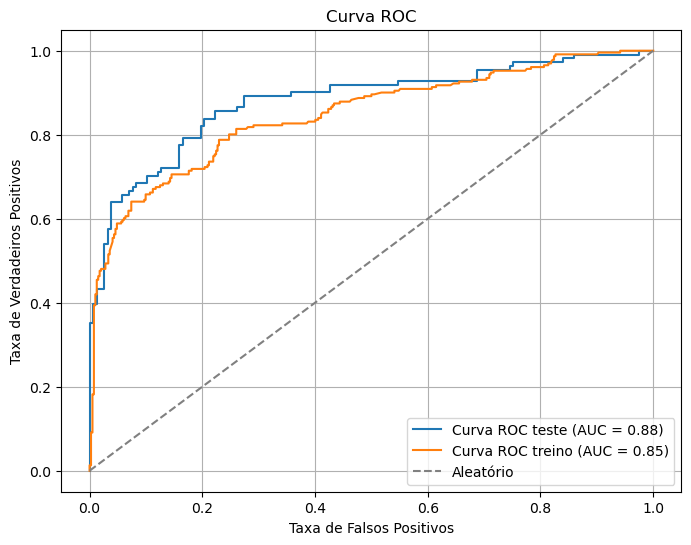

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt

# Carregar a base de dados Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# # Selecionar as colunas relevantes
# features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
# data = data[features + [target]]
ignore_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
numeric_preds = list(set(data._get_numeric_data().columns) - set([target] + ignore_cols))
cat_preds = list(set(data.columns)-set(numeric_preds)-set([target] + ignore_cols))
features = list(set(numeric_preds + cat_preds) - set(ignore_cols))

# Tratar valores ausentes
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Dividir os dados em treino e teste
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o pipeline de pré-processamento
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_preds),
        ('cat', categorical_transformer, cat_preds)
    ]
)

# Criar o pipeline com o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression( random_state=42))
])

# Definir os hiperparâmetros para otimização
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['saga'],
    'classifier__max_iter': [100, 300 , 500],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__l1_ratio': [0.0, 0.5, 1.0],
    
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
y_proba_train = best_model.predict_proba(X_train)[:, 1]

# Calcular métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
roc_auct = roc_auc_score(y_train, y_proba_train)
gini = 2 * roc_auc - 1

print("Melhores parâmetros:", grid_search.best_params_)
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Gini: {gini:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fprt, tprt, thresholdst = roc_curve(y_train, y_proba_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC teste (AUC = {roc_auc:.2f})')
plt.plot(fprt, tprt, label=f'Curva ROC treino (AUC = {roc_auct:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
X_Df = X.copy()
X_Df['target'] = y
X_Df['prob'] = best_model.predict_proba(X)[:, 1]  # Probabilidade da classe positiva
df_ks = ks(X_Df, target='target', prob='prob')

KS is 57.699999999999996% at decile 3


In [ ]:
df_ks

min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.798521  0.947137      86          3     25.15%         0.55%   
2       0.654744  0.795977      80          9     23.39%         1.64%   
3       0.551570  0.654607      58         31     16.96%         5.65%   
4       0.428141  0.551027      30         57      8.77%        10.38%   
5       0.283857  0.425704      34         57      9.94%        10.38%   
6       0.190409  0.279898      11         78      3.22%        14.21%   
7       0.160772  0.190408      14         75      4.09%        13.66%   
8       0.139036  0.158646       8         81      2.34%        14.75%   
9       0.124743  0.138977      17         72      4.97%        13.11%   
10      0.041198  0.124416       4         86      1.17%        15.66%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             25.15%            0.55%  24.6  
2             48.54%            2.19%  46.4  
3             65.50%            7.83%  57.7  
4             74.27%           18.21%  56.1  
5             84.21%           28.60%  55.6  
6             87.43%           42.81%  44.6  
7             91.52%           56.47%  35.1  
8             93.86%           71.22%  22.6  
9             98.83%           84.34%  14.5  
10           100.00%          100.00%   0.0

In [ ]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Parch', 'Fare',
                                                   'Age', 'SibSp']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier',
                 LogisticRegression(C=0.1, l1_ratio=0.5, penalty='elasticnet',
                                    random_state=42, solver='saga'))])

C:\Users\vgflg\AppData\Local\Temp\ipykernel_23900\3669720818.py:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, best_model['preprocessor'].transform(X), feature_names=numeric_preds + list(best_model['preprocessor'].named_transformers_['cat'].get_feature_names_out()))


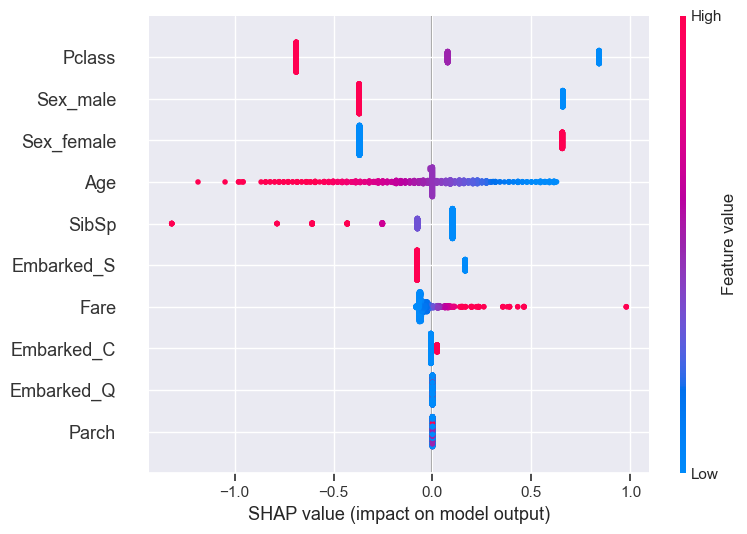

In [ ]:
import shap
explainer = shap.Explainer(best_model.named_steps['classifier'], 
                           best_model['preprocessor'].transform(X))

# Calcular os valores SHAP para o conjunto de teste
shap_values = explainer(best_model['preprocessor'].transform(X))

# Visualizar os valores SHAP
shap.summary_plot(shap_values, best_model['preprocessor'].transform(X), feature_names=numeric_preds + list(best_model['preprocessor'].named_transformers_['cat'].get_feature_names_out()))

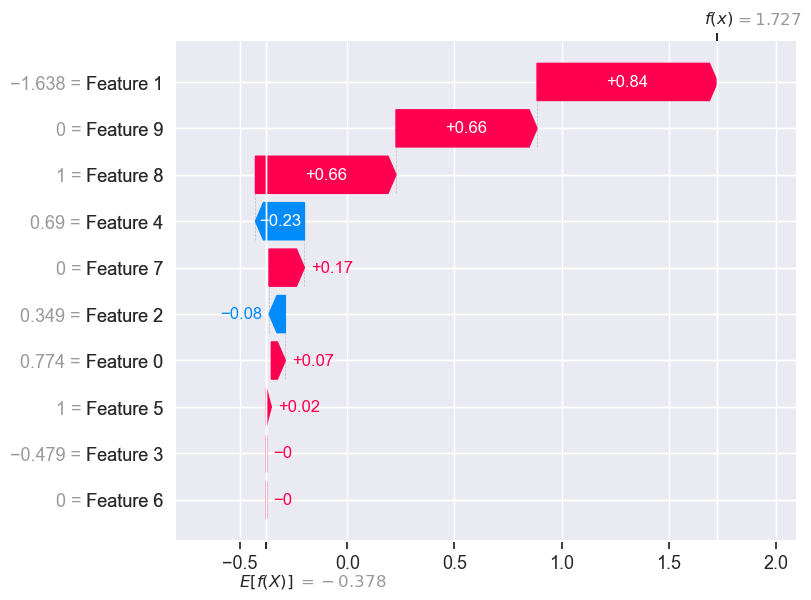

In [ ]:
shap.plots.waterfall(shap_values[1])

Intercepto: [-0.15763603]

Coeficientes:
Fare: 0.1056
Pclass: -0.6268
SibSp: -0.2154
Parch: 0.0000
Age: -0.2965
Embarked_C: 0.0314
Embarked_Q: 0.0000
Embarked_S: -0.2429
Sex_female: 1.0246
Sex_male: -1.0282

Fator Coeficientes exp(coef):
Fare: Aumenta = 1.1114
Pclass: Diminiu = 0.5343
SibSp: Diminiu = 0.8062
Parch: Diminiu = 1.0000
Age: Diminiu = 0.7434
Embarked_C: Aumenta = 1.0319
Embarked_Q: Diminiu = 1.0000
Embarked_S: Diminiu = 0.7843
Sex_female: Aumenta = 2.7860
Sex_male: Diminiu = 0.3576


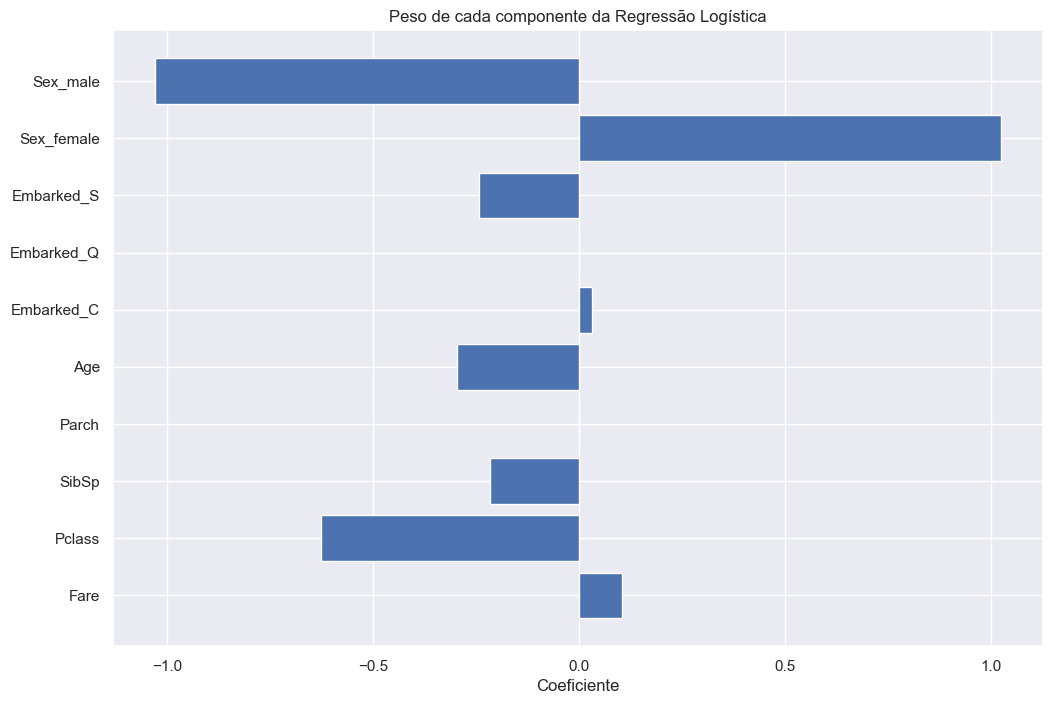

In [ ]:
# Exibir o intercepto e os coeficientes do modelo
feature_final = (numeric_preds + list(best_model['preprocessor'].named_transformers_['cat'].get_feature_names_out()))
print("Intercepto:", best_model[1].intercept_)
print("")
print("Coeficientes:")
for feature, coef in zip( feature_final, best_model[1].coef_[0]):
    print(f"{feature}: {coef:.4f}")

print('')
print("Fator Coeficientes exp(coef):")
for feature, coef in zip( feature_final, best_model[1].coef_[0]):
    if coef > 0:
        print(f"{feature}: Aumenta = {np.exp(coef):.4f}")
    else:
        print(f"{feature}: Diminiu = {np.exp(coef):.4f}")

# Visualizar os coeficientes em um gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh( feature_final, best_model[1].coef_[0])
plt.xlabel('Coeficiente')
plt.title('Peso de cada componente da Regressão Logística')
plt.show()

**# Análise do Peso de Cada Componente da Regressão Logística do scikit-learn**

Na regressão logística do scikit-learn, os "pesos" referem-se principalmente aos coeficientes estimados (armazenados no atributo `coef_`) e ao intercepto (`intercept_`). Esses componentes representam a contribuição de cada variável preditora no cálculo dos *log-odds* e, consequentemente, nas predições do modelo. A seguir, seguem alguns pontos-chave para essa análise:

- **Coeficientes (`coef_`):**
  - **Contribuição Individual:** Cada valor em `coef_` indica o quanto o *log-odds* aumenta (coeficiente positivo) ou diminui (coeficiente negativo) quando a respectiva feature aumenta em uma unidade, mantendo as demais constantes.
  - **Interpretação via Odds Ratio:** O expoente do coeficiente, $e^{coef}$, fornece o *odds ratio*; por exemplo, um coeficiente de 0.7 implica um *odds ratio* de $e^{0.7} \approx 2$, indicando que o aumento na feature duplica aproximadamente as chances da classe positiva.
  - **Comparação de Magnitude:** Em geral, features com valores absolutos maiores em seus coeficientes têm maior influência na decisão do modelo. Contudo, isso deve ser interpretado considerando a escala das features.

- **Intercepto (`intercept_`):**
  - Representa o valor de *log-odds* quando todas as features são iguais a zero, dando uma base à qual os efeitos das variáveis preditoras são somados.

- **Impacto da Regularização:**
  - Quando se utiliza regularização (L1 ou L2), os coeficientes podem ser "encolhidos" ou, no caso da L1, até zerados, promovendo uma seleção de features. Isso afeta diretamente a análise dos pesos, já que features irrelevantes tendem a aparecer com coeficientes baixos ou nulos.

- **Normalização dos Dados:**
  - A escala das variáveis pode influenciar a magnitude dos coeficientes. Por isso, é comum aplicar escalonamento (como normalização ou padronização) antes do ajuste do modelo para que a comparação entre os pesos seja mais significativa.

- **Interpretação Prática:**
  - **Coeficiente positivo:** Um aumento na feature correspondente aumenta o *log-odds* da classe positiva.
  - **Coeficiente negativo:** Um aumento na feature reduz o *log-odds* da classe positiva.
  - **Magnitude:** Indica a força do efeito. Porém, deve-se analisar juntamente com a significância estatística e o contexto do domínio.

Em resumo, ao examinar os valores de `coef_` e `intercept_`, podemos entender como cada componente influencia a predição final. Ferramentas de visualização, como gráficos de barras dos coeficientes (preferencialmente dos valores absolutos), ajudam na interpretação e na identificação das features mais influentes no modelo.

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores parâmetros: {'classifier__solver': 'saga', 'classifier__penalty': 'elasticnet', 'classifier__max_iter': 100, 'classifier__l1_ratio': 0.5, 'classifier__class_weight': None, 'classifier__C': 0.1}
Precisão: 0.79
Recall: 0.72
F1-Score: 0.75
ROC AUC: 0.88
Gini: 0.76


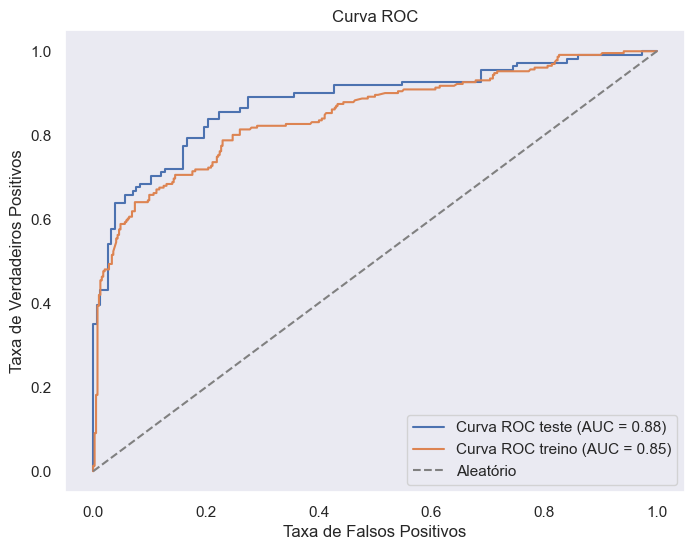

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt

# Carregar a base de dados Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# # Selecionar as colunas relevantes
# features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
# data = data[features + [target]]
ignore_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
numeric_preds = list(set(data._get_numeric_data().columns) - set([target] + ignore_cols))
cat_preds = list(set(data.columns)-set(numeric_preds)-set([target] + ignore_cols))
features = list(set(numeric_preds + cat_preds) - set(ignore_cols))

# Tratar valores ausentes
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Dividir os dados em treino e teste
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o pipeline de pré-processamento
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_preds),
        ('cat', categorical_transformer, cat_preds)
    ]
)

# Criar o pipeline com o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression( random_state=42))
])

# Definir os hiperparâmetros para otimização
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['saga'],
    'classifier__max_iter': [100, 300 , 500],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__l1_ratio': [0.0, 0.5, 1.0],
    
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=100,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Melhor modelo
best_model = random_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
y_proba_train = best_model.predict_proba(X_train)[:, 1]

# Calcular métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
roc_auct = roc_auc_score(y_train, y_proba_train)
gini = 2 * roc_auc - 1

print("Melhores parâmetros:", random_search.best_params_)
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Gini: {gini:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fprt, tprt, thresholdst = roc_curve(y_train, y_proba_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC teste (AUC = {roc_auc:.2f})')
plt.plot(fprt, tprt, label=f'Curva ROC treino (AUC = {roc_auct:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

C:\Users\vgflg\AppData\Local\Temp\ipykernel_23900\3669720818.py:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, best_model['preprocessor'].transform(X), feature_names=numeric_preds + list(best_model['preprocessor'].named_transformers_['cat'].get_feature_names_out()))


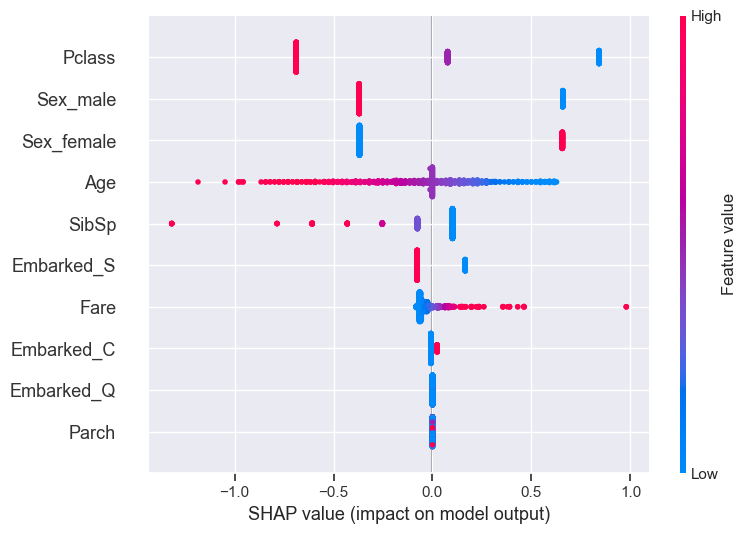

In [ ]:
import shap
explainer = shap.Explainer(best_model.named_steps['classifier'], 
                           best_model['preprocessor'].transform(X))

# Calcular os valores SHAP para o conjunto de teste
shap_values = explainer(best_model['preprocessor'].transform(X))

# Visualizar os valores SHAP
shap.summary_plot(shap_values, best_model['preprocessor'].transform(X), feature_names=numeric_preds + list(best_model['preprocessor'].named_transformers_['cat'].get_feature_names_out()))

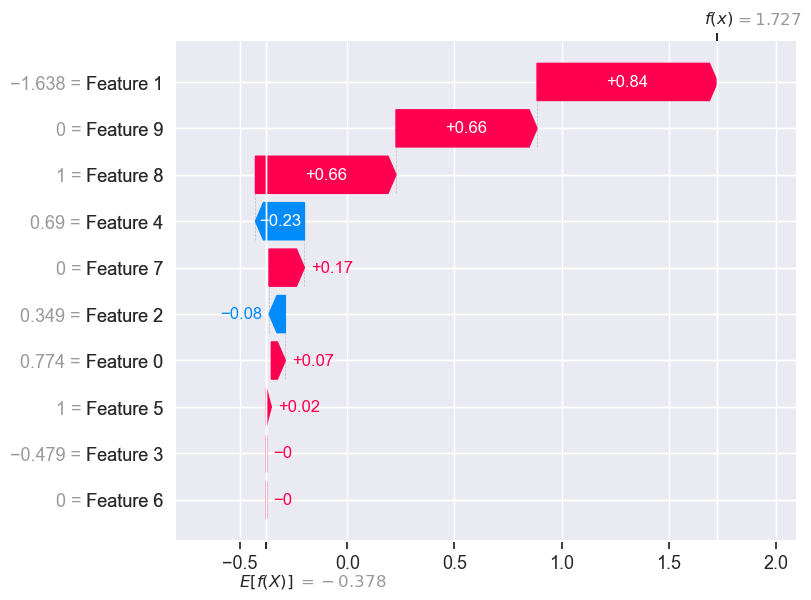

In [ ]:
shap.plots.waterfall(shap_values[1])

Intercepto: [-0.15763603]

Coeficientes:
Fare: 0.1056
Pclass: -0.6268
SibSp: -0.2154
Parch: 0.0000
Age: -0.2965
Embarked_C: 0.0314
Embarked_Q: 0.0000
Embarked_S: -0.2429
Sex_female: 1.0246
Sex_male: -1.0282

Fator Coeficientes exp(coef):
Fare: Aumenta = 1.1114
Pclass: Diminiu = 0.5343
SibSp: Diminiu = 0.8062
Parch: Diminiu = 1.0000
Age: Diminiu = 0.7434
Embarked_C: Aumenta = 1.0319
Embarked_Q: Diminiu = 1.0000
Embarked_S: Diminiu = 0.7843
Sex_female: Aumenta = 2.7860
Sex_male: Diminiu = 0.3576


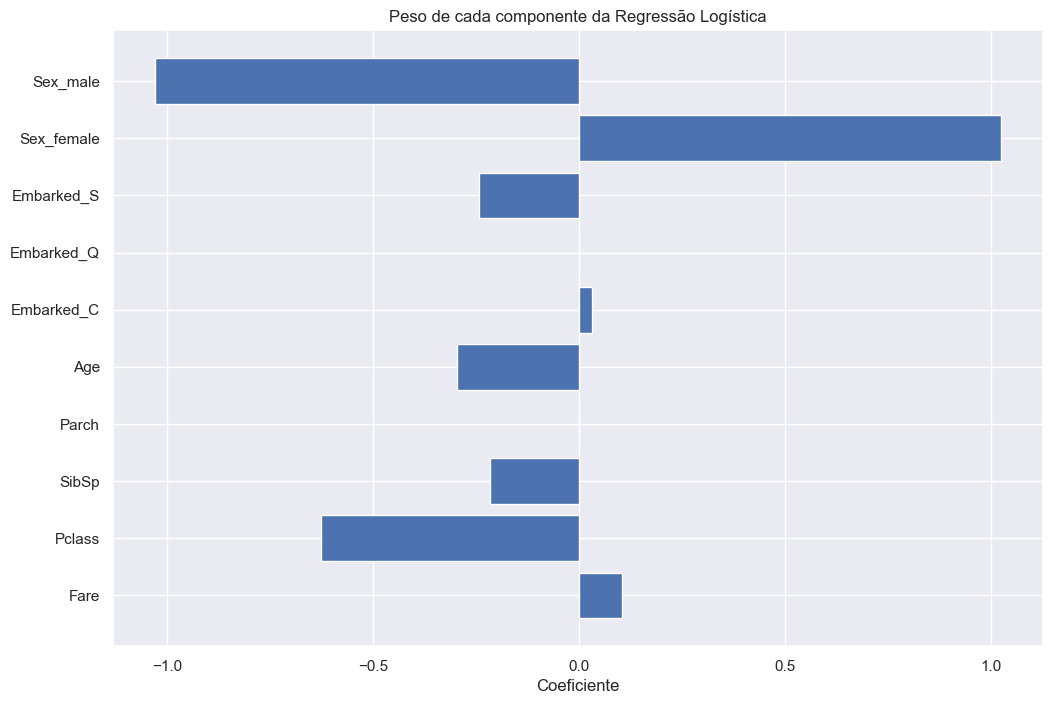

In [ ]:
# Exibir o intercepto e os coeficientes do modelo
feature_final = (numeric_preds + list(best_model['preprocessor'].named_transformers_['cat'].get_feature_names_out()))
print("Intercepto:", best_model[1].intercept_)
print("")
print("Coeficientes:")
for feature, coef in zip( feature_final, best_model[1].coef_[0]):
    print(f"{feature}: {coef:.4f}")

print('')
print("Fator Coeficientes exp(coef):")
for feature, coef in zip( feature_final, best_model[1].coef_[0]):
    if coef > 0:
        print(f"{feature}: Aumenta = {np.exp(coef):.4f}")
    else:
        print(f"{feature}: Diminiu = {np.exp(coef):.4f}")

# Visualizar os coeficientes em um gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh( feature_final, best_model[1].coef_[0])
plt.xlabel('Coeficiente')
plt.title('Peso de cada componente da Regressão Logística')
plt.show()

## KNN

**## 1. O Que É o Algoritmo?**

- **Algoritmo de Aprendizado Supervisionado:**  
  - Utilizado tanto para **classificação** quanto para **regressão**, embora seja mais popular em problemas de classificação.
- **Método "Preguiçoso" (Lazy Learning):**  
  - Não há um treinamento explícito; o algoritmo armazena os dados de treinamento e realiza a maior parte dos cálculos no momento da predição.
- **Baseado em Instâncias:**  
  - A predição é feita com base na similaridade (medida de distância) entre a nova amostra e os exemplos armazenados durante o treinamento.

---

**## 2. Como Ele Funciona?**

- **Armazenamento dos Dados:**  
  - Durante a fase de "treinamento", o KNN simplesmente armazena o conjunto de dados completo (ou uma versão reduzida, se for usado algum método de amostragem).
  
- **Definição do Número de Vizinhos (K):**  
  - O usuário define o parâmetro **K**, que determina quantos vizinhos serão considerados na hora de fazer a predição.

- **Cálculo de Distâncias:**  
  - Para prever a classe (ou valor) de uma nova amostra, o algoritmo calcula a distância entre esta e todas as amostras de treinamento.
  
- **Seleção dos K Vizinhos Mais Próximos:**  
  - A partir dos cálculos de distância, o algoritmo seleciona os **K** exemplos mais próximos à nova amostra.

- **Agregação dos Resultados:**  
  - **Classificação:**  
    - Aplica uma "votação" majoritária entre os rótulos dos K vizinhos.  
    - Pode usar pesos (por exemplo, inversamente proporcionais à distância) para influenciar a votação.
  - **Regressão:**  
    - Calcula a média ou mediana dos valores dos vizinhos escolhidos para determinar o valor de predição.
  
- **Predição Final:**  
  - O resultado da votação (ou agregação) determina a classe (ou valor) predito para a nova amostra.

---

**## 3. Medidas de Distância Aceitas no scikit-learn**

O scikit-learn permite usar várias métricas para calcular a distância entre pontos. Algumas das principais são:

- **Minkowski:**  
  - **Generalização:** A métrica padrão que generaliza diversas distâncias através do parâmetro **p**.  
  - **Configurações Comuns:**
    - `p=1`: Equivale à **distância Manhattan** (cityblock).
    - `p=2`: Equivale à **distância Euclidiana**.

- **Euclidean:**  
  - Implementada como **Minkowski com `p=2`**.  
  - Calcula a raiz quadrada da soma dos quadrados das diferenças entre as coordenadas.

- **Manhattan (Cityblock):**  
  - Implementada como **Minkowski com `p=1`**.  
  - Soma das diferenças absolutas em cada dimensão.

- **Chebyshev:**  
  - Mede a **máxima diferença** entre as dimensões.  
  - Útil quando se deseja considerar a pior discrepância entre os pontos.

- **Outras Métricas Suportadas:**  
  - **Cosine:** Mede a similaridade de orientação entre os vetores de características.  
  - **Mahalanobis:** Considera a correlação entre as variáveis e é útil quando as escalas variam significativamente.  
  - **Hamming:** Comum para dados categóricos (ou binários).
  - **Customizadas:** É possível definir uma função de distância personalizada e passá-la para o parâmetro `metric`.

No scikit-learn, ao instanciar o **KNeighborsClassifier** ou **KNeighborsRegressor**, o parâmetro `metric` permite configurar a métrica desejada, podendo ser uma string (para métricas pré-definidas) ou uma função callable.

---

Esta estrutura modular e intuitiva torna o KNN um algoritmo simples de entender e implementar, embora sua performance possa ser afetada pelo tamanho do conjunto de dados (devido ao cálculo de distâncias em tempo de predição) e pela escolha adequada da métrica e do valor de K.

**# Ball Tree e KD Tree no Algoritmo de KNN**

- **Propósito Geral:**
  - São estruturas de dados de indexação que aceleram a busca por vizinhos mais próximos, evitando a comparação com todos os pontos do conjunto de dados.

---

**## KD Tree (k-Dimensional Tree)**

- **Como Funciona:**
  - Divide recursivamente o espaço de dados usando hiperplanos alinhados com os eixos das features.
  - Cada nó da árvore representa uma divisão que separa os dados em duas regiões, de acordo com o valor de uma determinada feature.

- **Principais Características:**
  - **Eficiência em Baixas Dimensões:** Muito eficaz em conjuntos de dados com poucas dimensões (geralmente até 10-20 dimensões).
  - **Desempenho:** Permite uma busca rápida por vizinhos ao eliminar grandes regiões do espaço que não contêm pontos próximos ao query.
  - **Limitações:** Em altas dimensões, o desempenho do KD Tree tende a decair devido à "maldição da dimensionalidade".

---

**## Ball Tree**

- **Como Funciona:**
  - Organiza os dados agrupando-os em "bolas" (ou hiperesferas) que englobam pontos próximos.
  - Cada nó da árvore representa uma bola com um centro e um raio, contendo pontos que se encontram próximos uns dos outros.

- **Principais Características:**
  - **Adaptabilidade a Altas Dimensões:** Geralmente lida melhor que o KD Tree em espaços de alta dimensão, pois o agrupamento em forma de bola pode capturar melhor a distribuição dos dados.
  - **Flexibilidade de Métricas:** Permite o uso eficiente de diferentes métricas de distância.
  - **Desempenho:** Pode oferecer buscas em tempo mais rápido quando os dados possuem uma estrutura complexa e multidimensional.

---

**## Comparação e Uso no scikit-learn**

- **Escolha do Algoritmo:**
  - **KD Tree:** Indicada para conjuntos de dados com baixa dimensionalidade e quando as divisões alinhadas com os eixos são eficazes.
  - **Ball Tree:** Preferível em cenários com alta dimensionalidade ou quando a distribuição dos dados não se alinha bem com divisões ortogonais.

- **Implementação no scikit-learn:**
  - Ao utilizar classes como `KNeighborsClassifier` ou `KNeighborsRegressor`, o parâmetro `algorithm` pode ser definido como `'kd_tree'` ou `'ball_tree'`, permitindo a escolha da estrutura de indexação mais adequada para o conjunto de dados e a métrica de distância utilizada.

**# Vantagens e Desvantagens do KNN**

**## Vantagens**

- **Simplicidade:**  
  - Fácil de entender e implementar.
  - Não há fase de treinamento intensiva—o algoritmo apenas armazena os dados.

- **Flexibilidade:**  
  - Pode ser usado tanto para classificação quanto para regressão.
  - Permite utilizar diferentes métricas de distância, possibilitando a customização de acordo com a natureza dos dados.

- **Não Paramétrico:**  
  - Não faz suposições sobre a distribuição dos dados, o que o torna aplicável em diversos cenários sem a necessidade de modelar a relação funcional entre as variáveis.

- **Adaptativo:**  
  - Novos dados podem ser incluídos sem a necessidade de re-treinamento completo, já que o algoritmo utiliza o conjunto de dados completo para fazer predições.

- **Interpretação Intuitiva:**  
  - A lógica de “proximalidade” é fácil de compreender, já que a predição se baseia nos vizinhos mais próximos da amostra consultada.

---

**## Desvantagens**

- **Custo Computacional na Predição:**  
  - Como o algoritmo calcula distâncias de uma nova amostra para todos os pontos do conjunto de treinamento, ele pode ser computacionalmente custoso, principalmente em datasets grandes.

- **Sensibilidade à Dimensionalidade:**  
  - Em espaços de alta dimensão, o conceito de "distância" pode perder significado (maldição da dimensionalidade), degradando o desempenho do algoritmo.

- **Dependência da Escala dos Dados:**  
  - A performance do KNN é fortemente impactada pela escala dos atributos; é necessário normalizar ou padronizar os dados para evitar que variáveis com maior escala dominem a distância.

- **Escolha do Parâmetro K:**  
  - Um valor de K muito pequeno pode levar ao overfitting (sensibilidade ao ruído), enquanto um valor muito alto pode resultar em underfitting, suavizando demais a fronteira de decisão.

- **Sensibilidade a Outliers:**  
  - Dados ruidosos ou outliers podem afetar significativamente a predição, já que eles podem ser considerados entre os vizinhos mais próximos.

- **Armazenamento e Escalabilidade:**  
  - Como todo o conjunto de treinamento é necessário para fazer as predições, o KNN pode demandar grande espaço de memória e ter dificuldade para escalar com conjuntos de dados muito grandes.

**Resumo**:
1. Como é baseado em distância, atenção na normalização
2. Algorimto Não paramétrico
3. Classificação e Regressão
4. Principal conceito é em distância e proximidade dos dados
5. Algoritmo de instância
6. Memoriza as intâncias da base dados (treino) e as usa como aprendizado/conhecimento na fase de previsão/teste
7. Maior processamento na fase de teste
8. Quando K tende a 1:
    - Algoritmo tende ao overfitting
    - sensível a ruído e outliers
    - aumenta a variância do modelo
9. Quando K tende ao Numero da base de treino:
    - Tende ao underfitting
    - errar mais na base de treino
10. Outliers impactam o algoritmo - normalizacao, inverso da distancia, 
11. Classe desbalanceada afetam - inverso da distancia
12. Distâncias:
    - Hamming - categoricas
    - Euclidiana e de Manhatthan - númericas
    - Manhatthan é indicada para maiores dimensões/variáveis/features
    - Malahabonis maior custo computacional
13. Custo do KNN Brute force - quadratico
14. O que ocorre quando temos dois vizinhos k1 e k2 com a mesma distância porém com classes diferentes?
    - Nestes casos o voto será realizado levando em conta a ordem dos dados do conjunto de treino.
15. Qual a ideia por trás do algoritmo KD Tree utilizado no KNN?
    - Ele leva em conta o principio de que se o ponto A está muito distante do ponto B, e o ponto B está muito próximo do ponto C então, podemos dizer que o ponto A e C
estão muito distantes, reduzindo assim o número de cálculos de distância necessários

### Aplicação Sklearn

<div style="text-align: center;">
    <iframe type="text/html" src="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" width="90%" height="500" style="text-align: center; border: solid; border-radius: 10px">
</div>

### Python

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Melhores parâmetros: {'classifier__algorithm': 'ball_tree', 'classifier__leaf_size': 20, 'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Precisão: 0.81
Recall: 0.68
F1-Score: 0.74
ROC AUC: 0.87
Gini: 0.75


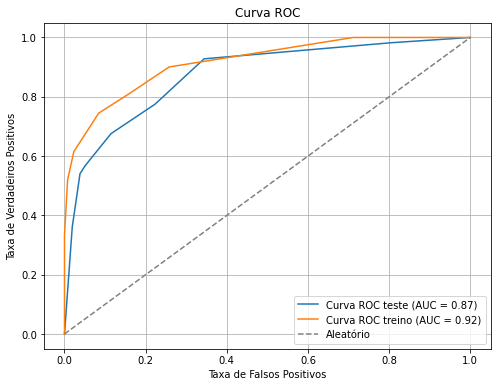

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt

# Carregar a base de dados Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# # Selecionar as colunas relevantes
# features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
# data = data[features + [target]]
ignore_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
numeric_preds = list(set(data._get_numeric_data().columns) - set([target] + ignore_cols))
cat_preds = list(set(data.columns)-set(numeric_preds)-set([target] + ignore_cols))
features = list(set(numeric_preds + cat_preds) - set(ignore_cols))

# Tratar valores ausentes
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Dividir os dados em treino e teste
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o pipeline de pré-processamento
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_preds),
        ('cat', categorical_transformer, cat_preds)
    ]
)

# Criar o pipeline com o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Definir os hiperparâmetros para otimização
param_grid = {
    'classifier__n_neighbors': [5,3,7,9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'classifier__leaf_size': [10, 20, 30],
    'classifier__p': [1,2]
    
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
y_proba_train = best_model.predict_proba(X_train)[:, 1]

# Calcular métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
roc_auct = roc_auc_score(y_train, y_proba_train)
gini = 2 * roc_auc - 1

print("Melhores parâmetros:", grid_search.best_params_)
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Gini: {gini:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fprt, tprt, thresholdst = roc_curve(y_train, y_proba_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC teste (AUC = {roc_auc:.2f})')
plt.plot(fprt, tprt, label=f'Curva ROC treino (AUC = {roc_auct:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
data.shape

(891, 12)

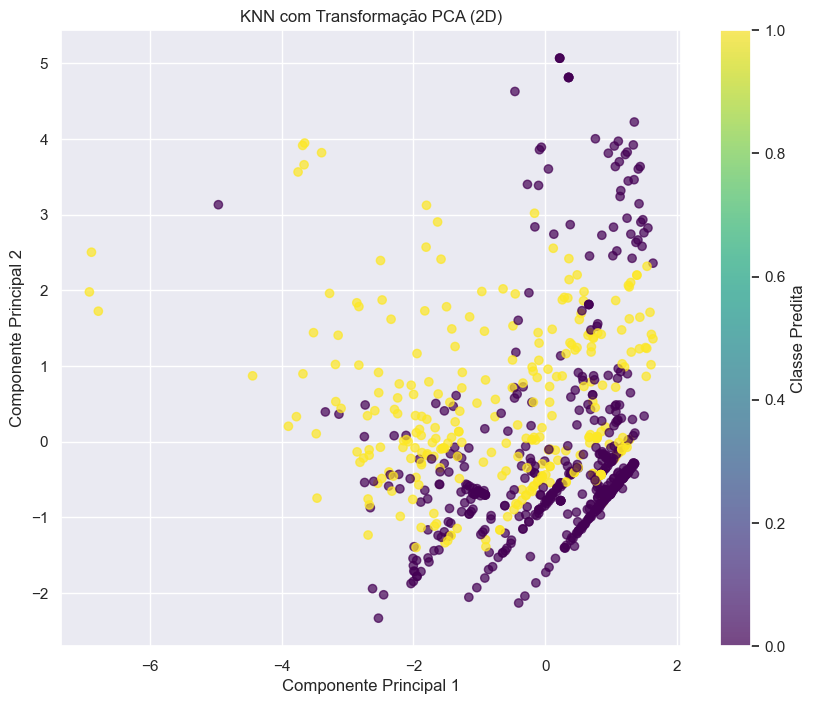

In [ ]:
from sklearn.decomposition import PCA

df_x = pd.DataFrame(best_model['preprocessor'].transform(X), columns=numeric_preds + list(best_model['preprocessor'].named_transformers_['cat'].get_feature_names_out()))
y_pred_final = best_model.predict(X)
# Aplicar PCA para reduzir os dados para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_x)

# Plotar os pontos
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_final, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Classe Predita')
plt.title('KNN com Transformação PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

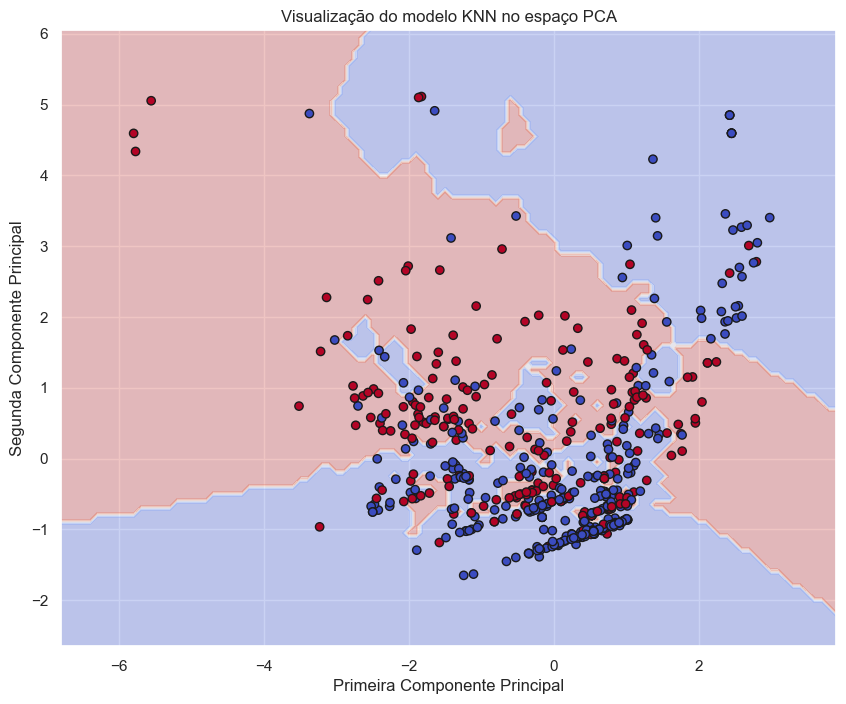

In [ ]:
from sklearn.decomposition import PCA

# Utiliza o melhor modelo obtido no GridSearch (pipeline completo)
# best_model é o que já treinamos com o conjunto completo de features
# Extraímos os dados transformados (após pré-processamento)
X_train_transf = best_model.named_steps['preprocessor'].transform(X_train)
X_test_transf = best_model.named_steps['preprocessor'].transform(X_test)

# Aplicar PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_transf)
X_test_pca = pca.transform(X_test_transf)

# Para visualizar, podemos treinar um modelo KNN com esses dados reduzidos,
# ou usar o mesmo classificador treinado (embora este esteja ajustado ao espaço original).
# Aqui, treinaremos um novo KNN no espaço PCA:
knn_pca = KNeighborsClassifier(n_neighbors=best_model.named_steps['classifier'].n_neighbors)
knn_pca.fit(X_train_pca, y_train)

# Criar grid no espaço PCA
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar a fronteira de decisão e os pontos transformados
plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
            edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("Primeira Componente Principal")
plt.ylabel("Segunda Componente Principal")
plt.title("Visualização do modelo KNN no espaço PCA")
plt.show()

In [ ]:
import shap

df_x = pd.DataFrame(best_model['preprocessor'].transform(X), columns=numeric_preds + list(best_model['preprocessor'].named_transformers_['cat'].get_feature_names_out()))
def f(x):
    return best_model.named_steps['classifier'].predict_proba(x)[:, 1]


med = df_x.median().values.reshape((1, df_x.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(df_x.iloc[0:1000, :])

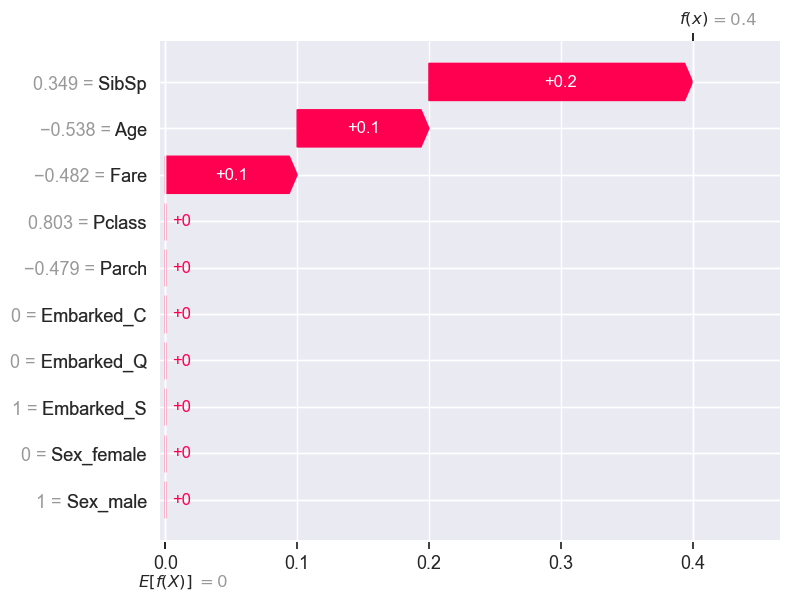

In [ ]:
shap.plots.waterfall(shap_values[0])


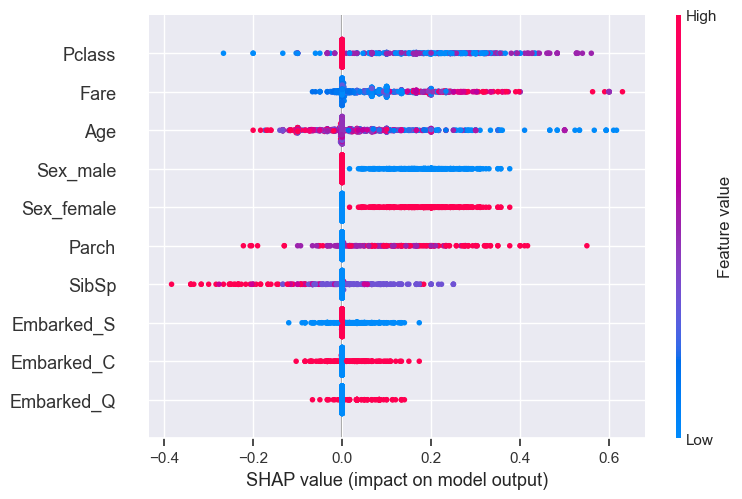

In [ ]:
shap.plots.beeswarm(shap_values)


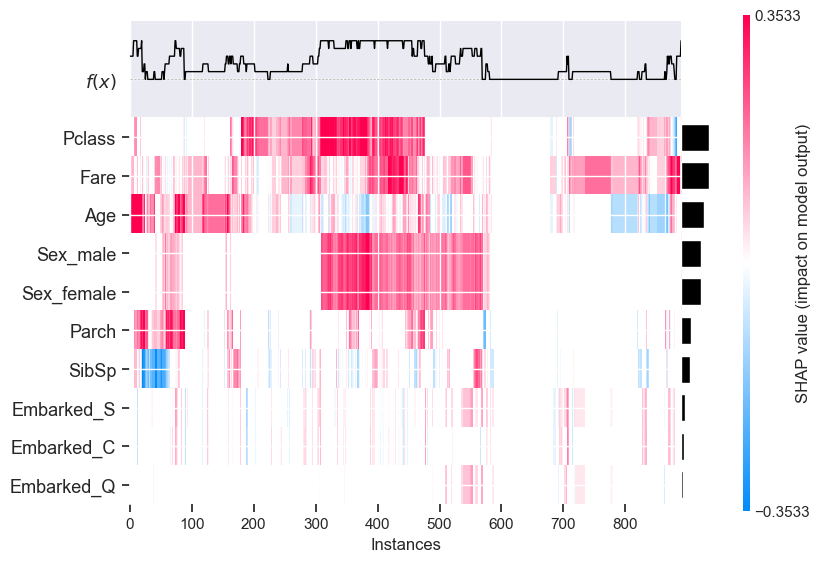

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(shap_values)


## Naive Bayes

### **Teorema de Bayes**

O **Teorema de Bayes** é uma regra fundamental da probabilidade que descreve a probabilidade de um evento, com base em informações anteriores ou conhecimento prévio. Ele permite atualizar as probabilidades à medida que novas evidências ou dados se tornam disponíveis. O teorema é amplamente usado em estatísticas, aprendizado de máquina, diagnóstico médico, entre outras áreas.

### Fórmula do Teorema de Bayes:

$$P(A|B) = \frac{P(B|A)  P(A)}{P(B)}$$

Onde:
- $P(A|B)$ é a **probabilidade condicional** de $A$ dado que $B$ ocorreu .
- $P(B|A)$ é a **probabilidade condicional** de $B$ dado que $A$ ocorreu .
- $P(A)$ é a **probabilidade marginal** de $A$.
- $P(B)$ é a **probabilidade marginal** de $B$.

### Interpretação Intuitiva:

- **$P(A)$** é o conhecimento prévio sobre $A$ antes de observar o evento $B$.
- **$P(B|A)$** é a probabilidade de observar $B$, dado que $A$ ocorreu.
- **$P(A|B)$** é a probabilidade revisada de $A$, após observar o evento $B$.

### Exemplo:
Imagine que você tem um teste médico que detecta uma doença com certa precisão.

- $P(A)$: A probabilidade de um paciente ter a doença (probabilidade a priori).
- $P(B|A)$: A probabilidade de o teste ser positivo dado que o paciente tem a doença (sensibilidade do teste).
- $P(B)$: A probabilidade de o teste ser positivo, independentemente de o paciente ter ou não a doença.

Usando o Teorema de Bayes, podemos calcular a probabilidade de que o paciente realmente tenha a doença, dado que o teste deu positivo.


### **Algortimo Naive Bayes**

O algoritmo Naive Bayes é um classificador probabilístico baseado no Teorema de Bayes, com a premissa de que os atributos são independentes entre si, dado a classe. Essa premissa de independência simplifica os cálculos e torna o algoritmo eficiente.

O nome "Naive Bayes" vem justamente da combinação de dois elementos:

- Bayes: O algoritmo é fundamentado no Teorema de Bayes, que relaciona a probabilidade condicional e a probabilidade marginal de eventos. Em termos simples, ele usa as probabilidades prévias e as evidências (dados observados) para calcular a probabilidade posterior de uma classe.

- Naive (ingênuo): O termo "ingênuo" se refere à suposição simplificada que o algoritmo faz: ele assume que todas as features são condicionalmente independentes entre si, dado o valor da classe. Essa suposição é considerada ingênua porque, na prática, as variáveis frequentemente exibem algum grau de correlação. Entretanto, essa simplificação torna os cálculos computacionalmente eficientes e, mesmo quando a independência total não se verifica, o algoritmo tende a funcionar razoavelmente bem em muitas aplicações.

Em resumo, o algoritmo é chamado de Naive Bayes porque utiliza o Teorema de Bayes como base e adota uma suposição "ingênua" de independência entre as variáveis, facilitando o cálculo das probabilidades e a classificação.
Essa combinação de simplicidade e eficácia explica por que, apesar de sua suposição forte, o Naive Bayes é amplamente utilizado em tarefas como classificação de textos (spam, análise de sentimentos, etc.) e outros problemas de classificação onde suas restrições não comprometem significativamente a capacidade preditiva.

**Exemplo**:

![image.png](attachment:image.png)

Abaixo segue um resumo sobre as principais variantes do Naive Bayes:

- **Gaussian Naive Bayes:**  
  - **Quando usar:** Para features contínuas.  
  - **Assunção:** Os dados seguem uma distribuição normal (Gaussiana) para cada classe.  
  - **Exemplo:** Classificação baseada em medidas físicas (como altura ou peso).

- **Multinomial Naive Bayes:**  
  - **Quando usar:** Para dados discretos (contagens ou frequências).  
  - **Assunção:** Os dados seguem uma distribuição multinomial.  
  - **Exemplo:** Classificação de texto usando a contagem de palavras (bag-of-words).

- **Bernoulli Naive Bayes:**  
  - **Quando usar:** Para features binárias (valores 0 ou 1).  
  - **Assunção:** Os dados são modelados como variáveis indicadoras (presença ou ausência).  
  - **Exemplo:** Classificação de textos quando se considera apenas se uma palavra aparece ou não no documento.

Cada variante adapta o mesmo princípio – a independência condicional entre features – para diferentes tipos de distribuição nos dados, permitindo que o algoritmo seja aplicado em contextos variados. 


---

### Vantagens

- **Simplicidade e Eficiência Computacional**  
  - **Treinamento rápido:** Por conta das suposições simplificadoras, o Naive Bayes tem baixa complexidade computacional, tornando-o ideal para grandes volumes de dados e aplicações em tempo real.  
  - **Implementação simples:** Com poucos passos e sem necessidade de ajustes complexos, é fácil de implementar e entender.

- **Boa Performance em Dados de Alta Dimensão**  
  - Em problemas com muitas features (como a classificação de textos), a independência assumida entre as variáveis permite que o algoritmo lide bem com espaços de alta dimensionalidade, mesmo quando muitas das features são esparsas.

- **Probabilidades Interpretáveis**  
  - Além de classificar, o algoritmo fornece uma estimativa de probabilidade para cada classe. Essa característica é útil para entender o grau de confiança em cada predição, auxiliando na interpretação dos resultados.

- **Resiliência a Atributos Irrelevantes**  
  - Mesmo que algumas features não sejam totalmente relevantes, seu efeito é diluído na multiplicação das probabilidades, o que pode levar a um desempenho razoável sem a necessidade de uma rigorosa seleção de features.

- **Aplicabilidade em Múltiplos Contextos**  
  - Variantes como o **Multinomial**, **Gaussian** e **Bernoulli** permitem adaptar o algoritmo a diferentes tipos de dados (contagens, contínuos ou binários), fazendo dele uma ferramenta versátil em diversas tarefas de classificação.

- **Suavização (Laplace Smoothing)**  
  - A utilização da suavização ajuda a evitar problemas com zero probabilístico, fornecendo estabilidade mesmo quando certos eventos ocorrem raramente.

---

### Desvantagens

- **Assunção de Independência Condicional**  
  - **Simplificação Excessiva:** O Naive Bayes assume que todas as features são independentes uma da outra dado a classe. Na prática, essa condição raramente é satisfeita, e a presença de correlações fortes entre variáveis pode comprometer a acurácia do modelo.
  
- **Problemas com Modelagem de Relações Complexas**  
  - **Interações Ignoradas:** Em problemas onde a interação entre features é fundamental para uma boa distinção entre classes, a abordagem ingênua pode ser limitada, levando a resultados subótimos comparados com modelos mais sofisticados que capturam essas interações.

- **Limitações com Dados Contínuos**  
  - **Distribuição Normal (Gaussian NB):** Ao aplicar o Gaussian Naive Bayes, o modelo assume que os dados seguem uma distribuição normal. Se os dados apresentarem distribuições muito assimétricas ou multimodais, a performance tende a cair.
  
- **Sensibilidade à Estimativa de Probabilidades**  
  - **Problemas de Zero Probabilidade:** Sem a aplicação de técnicas de suavização, a multiplicação de probabilidades pode resultar em zero se uma única feature tiver valor zero, anulando a contribuição de outras evidências.

- **Menor Capacidade de Ajuste Fino**  
  - Em problemas onde a complexidade dos dados exige modelos flexíveis (como redes neurais ou SVMs com kernel), o Naive Bayes pode ter desempenho inferior por não conseguir capturar relações não lineares ou interações sutis entre atributos.

---

### Conclusão

O algoritmo Naive Bayes representa uma excelente opção quando se busca:
- **Simplicidade e rapidez** no treinamento e na predição.
- Uma **abordagem probabilística** que fornece confiança nas predições.
- **Boa escalabilidade** para problemas com muitas features, como na classificação de textos.

Por outro lado, suas principais limitações—especialmente a suposição de independência condicional—podem prejudicar sua performance em cenários onde as variáveis possuem dependências significativas ou distribuições complexas.

### Aplicação Sklearn

<div style="text-align: center;">
    <iframe type="text/html" src="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html" width="90%" height="500" style="text-align: center; border: solid; border-radius: 10px">
</div>

**Principais**:
1. GaussianNB
    - `priors`:
        - Permite definir manualmente as probabilidades a priori para cada classe. Se não definido, o modelo estima essas probabilidades com base na frequência das classes nos dados.
    - `var_smoothing`:
        - É uma fração (geralmente um valor pequeno, como 1e-9) multiplicada pela variância dos dados, que é adicionada à variância calculada para garantir estabilidade numérica, principalmente quando os valores se aproximam de zero. Isso é especialmente importante para dados contínuos que se espera seguir uma distribuição normal.
2. MultinomialNB
    - `alpha`:
        - Parâmetro de suavização aditiva (também conhecido como Laplace smoothing). Um valor de alpha maior que zero evita que probabilidades possam se tornar zero, o que é fundamental quando se lidam com dados esparsos ou contagens (por exemplo, em classificação de textos). Valor padrão: 1.0
    - `fit_prior`:
        - Se definido como `True` (padrão), o modelo aprende as probabilidades a priori com base nos dados de treinamento; se `False`, assume probabilidades a priori uniformes para todas as classes.
    - `class_prior`:
        - Permite especificar, manualmente, as probabilidades a priori das classes. Se não for fornecido, elas são estimadas a partir dos dados (desde que `fit_prior=True`).
3. BernoulliNB
    - `alpha`:
        - Assim como no MultinomialNB, é usado para suavização aditiva, prevenindo probabilidades nulas.
    - `binarize`:
        -   Um limiar opcional que serve para transformar as features em dados binários (por exemplo, "palavra presente" ou "ausente" em classificação de textos). Se definido, todos os valores acima do limiar serão considerados 1 e os inferiores, 0. Se `None`, assume-se que os dados já estão binarizados.
    - `fit_prior` e `class_prior`
        - Funcionam de forma análoga ao MultinomialNB, definindo como as probabilidades a priori são tratadas no treinamento.



### Python

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Melhores parâmetros: {'classifier__var_smoothing': 1e-09}
Precisão: 0.81
Recall: 0.77
F1-Score: 0.79
ROC AUC (teste): 0.90
ROC AUC (treino): 0.92
Gini: 0.80


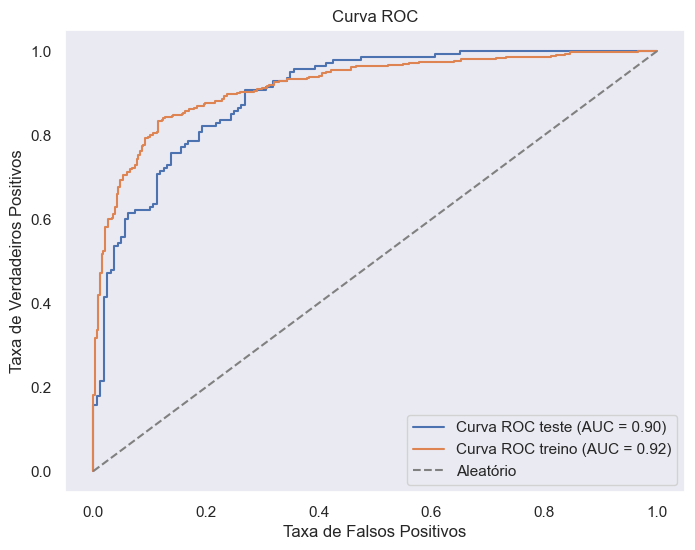

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Gerar dados fictícios
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42
)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o pipeline de pré-processamento
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, slice(0, X.shape[1]))
    ]
)

# Criar o pipeline com o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Definir os hiperparâmetros para otimização
param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
y_proba_train = best_model.predict_proba(X_train)[:, 1]

# Calcular métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
roc_auct = roc_auc_score(y_train, y_proba_train)
gini = 2 * roc_auc - 1

print("Melhores parâmetros:", grid_search.best_params_)
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC (teste): {roc_auc:.2f}")
print(f"ROC AUC (treino): {roc_auct:.2f}")
print(f"Gini: {gini:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fprt, tprt, thresholdst = roc_curve(y_train, y_proba_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC teste (AUC = {roc_auc:.2f})')
plt.plot(fprt, tprt, label=f'Curva ROC treino (AUC = {roc_auct:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros: {'classifier__alpha': 0.1, 'classifier__fit_prior': True}
Precisão: 0.63
Recall: 0.93
F1-Score: 0.75
ROC AUC (teste): 0.84
ROC AUC (treino): 0.87
Gini: 0.68


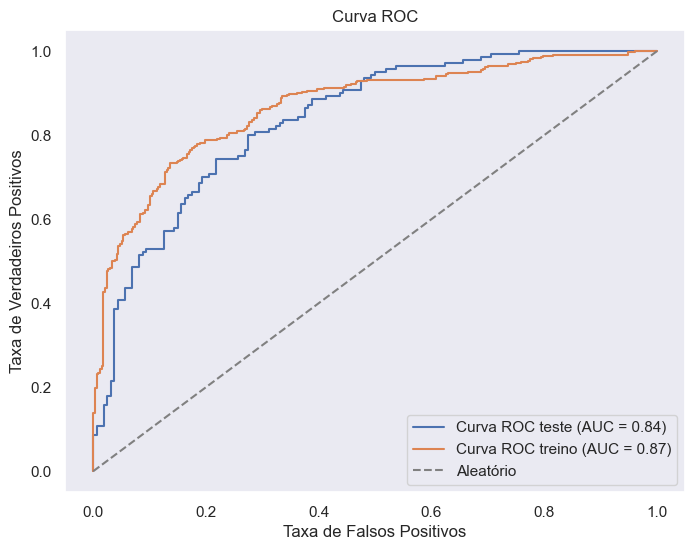

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Gerar dados fictícios
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42
)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o pipeline de pré-processamento
numeric_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, slice(0, X.shape[1]))
    ]
)

# Criar o pipeline com o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

# Definir os hiperparâmetros para otimização
param_grid = {
    'classifier__alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'classifier__fit_prior': [True, False]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
y_proba_train = best_model.predict_proba(X_train)[:, 1]

# Calcular métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
roc_auct = roc_auc_score(y_train, y_proba_train)
gini = 2 * roc_auc - 1

print("Melhores parâmetros:", grid_search.best_params_)
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC (teste): {roc_auc:.2f}")
print(f"ROC AUC (treino): {roc_auct:.2f}")
print(f"Gini: {gini:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fprt, tprt, thresholdst = roc_curve(y_train, y_proba_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC teste (AUC = {roc_auc:.2f})')
plt.plot(fprt, tprt, label=f'Curva ROC treino (AUC = {roc_auct:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros: {'classifier__alpha': 2.0, 'classifier__binarize': 0.0, 'classifier__fit_prior': True}
Precisão: 0.76
Recall: 0.72
F1-Score: 0.74
ROC AUC (teste): 0.84
ROC AUC (treino): 0.84
Gini: 0.68


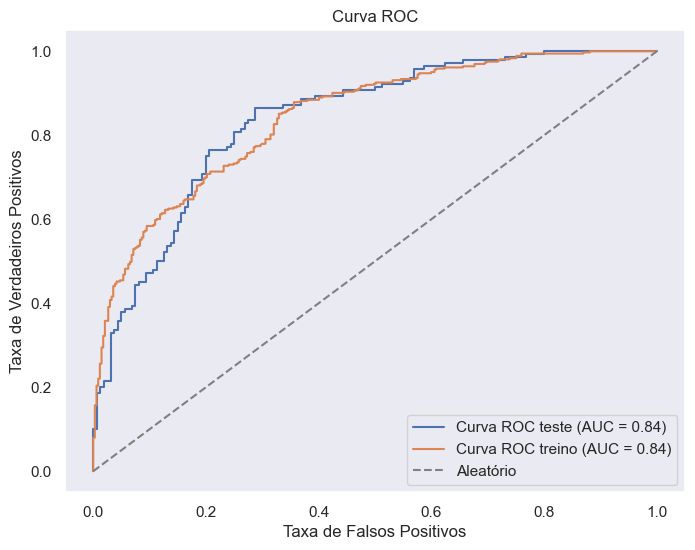

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Binarizer

from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Gerar dados fictícios
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42
)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('binarizer', Binarizer(), slice(0, X.shape[1]))
    ]
)

# Criar o pipeline com o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BernoulliNB())
])

# Definir os hiperparâmetros para otimização
param_grid = {
    'classifier__alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'classifier__binarize': [0.0, 0.5, 1.0],
    'classifier__fit_prior': [True, False]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
y_proba_train = best_model.predict_proba(X_train)[:, 1]

# Calcular métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
roc_auct = roc_auc_score(y_train, y_proba_train)
gini = 2 * roc_auc - 1

print("Melhores parâmetros:", grid_search.best_params_)
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC (teste): {roc_auc:.2f}")
print(f"ROC AUC (treino): {roc_auct:.2f}")
print(f"Gini: {gini:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fprt, tprt, thresholdst = roc_curve(y_train, y_proba_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC teste (AUC = {roc_auc:.2f})')
plt.plot(fprt, tprt, label=f'Curva ROC treino (AUC = {roc_auct:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

                    precision    recall  f1-score   support

talk.politics.misc       0.75      0.95      0.84       394
         sci.space       0.91      0.59      0.72       310

          accuracy                           0.79       704
         macro avg       0.83      0.77      0.78       704
      weighted avg       0.82      0.79      0.78       704

Acurácia: 0.7940340909090909
Precisão: 0.91
Recall: 0.59
F1-Score: 0.72
ROC AUC (teste): 0.93
ROC AUC (treino): 0.99
Gini: 0.86


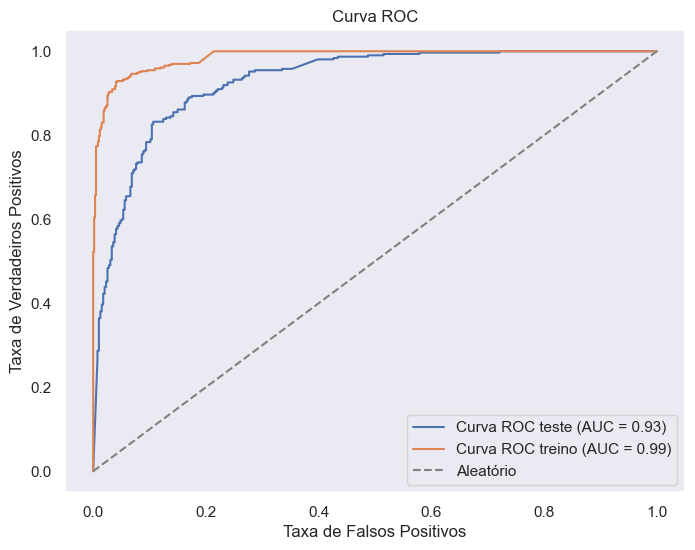

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Selecionar duas categorias para classificação binária
categories = ['talk.politics.misc', 'sci.space']

# Carregar os dados de treinamento e teste
train_data = fetch_20newsgroups(subset='train', categories=categories, 
                                remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', categories=categories, 
                               remove=('headers', 'footers', 'quotes'))

# Criar um pipeline para transformar os textos e classificar
pipeline = Pipeline([
    # CountVectorizer converte o texto em uma matriz esparsa de contagens,
    # com binary=True, cada entrada vira 1 (presença) ou 0 (ausência) da palavra.
    ('vectorizer', CountVectorizer(binary=True)),
    # BernoulliNB é indicado para dados binários.
    ('classifier', BernoulliNB(alpha=1.0))
])

# Treinar o modelo
pipeline.fit(train_data.data, train_data.target)

# Fazer predições no conjunto de teste
y_pred = pipeline.predict(test_data.data)

# Exibir relatório de classificação e acurácia
print(classification_report(test_data.target, y_pred, target_names=categories))
print("Acurácia:", accuracy_score(test_data.target, y_pred))


# Fazer previsões
y_proba = pipeline.predict_proba(test_data.data)[:, 1]
y_proba_train = pipeline.predict_proba(train_data.data)[:, 1]

# Calcular métricas
precision = precision_score(test_data.target, y_pred)
recall = recall_score(test_data.target, y_pred)
f1 = f1_score(test_data.target, y_pred)
roc_auc = roc_auc_score(test_data.target, y_proba)
roc_auct = roc_auc_score(train_data.target, y_proba_train)
gini = 2 * roc_auc - 1

print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC (teste): {roc_auc:.2f}")
print(f"ROC AUC (treino): {roc_auct:.2f}")
print(f"Gini: {gini:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(test_data.target, y_proba)
fprt, tprt, thresholdst = roc_curve(train_data.target, y_proba_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC teste (AUC = {roc_auc:.2f})')
plt.plot(fprt, tprt, label=f'Curva ROC treino (AUC = {roc_auct:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## SVM

1. Introdução:

    **Support Vector Machines (SVM)** são modelos de aprendizado supervisionado usados tanto para **classificação** quanto para **regressão**. O princípio básico do SVM é encontrar um **hiperplano** que separe as classes (ou ajuste os dados no caso de regressão) com a maior margem possível entre as amostras de cada classe. As amostras que ficam **próximas** do hiperplano são chamadas de **support vectors** e são fundamentais para definir a fronteira de decisão.

2. Funcionamento Básico:

    2.1. Dados Linearmente Separáveis
    - **Hiperplano Ideal:** O algoritmo busca o hiperplano que separa as classes maximizando a distância (margem) para as amostras mais próximas de cada classe. Sem permitir erros também chamados de **Hard Margin**
    - **Problema de Otimização:** Para dados linearmente separáveis, o SVM resolve o seguinte problema:
  
    Minimize:
    $$
    \frac{1}{2} \|w\|^2
    $$
  
    sujeitando-se a:
    $$
    y_i (w^T x_i + b) \geq 1, \quad \forall i
    $$
  
    onde ($w$) é o vetor de pesos, ($b$) é o intercepto e ($y_i$) são os rótulos das classes (geralmente (+1) e (-1)).

    - **Soft Margin:**  

    Em problemas reais, os dados frequentemente possuem ruídos, sobreposições entre classes ou outliers, o que torna a separação perfeita inviável. O **soft margin** permite que algumas amostras possam violar a margem ou até mesmo ser classificadas erroneamente. Essa abordagem introduz **variáveis de slack** (ou folgas) que quantificam a "penalidade" de cada amostra que desrespeita a margem ideal.

    No SVM com soft margin, o problema de otimização pode ser formulado da seguinte forma:

    Minimizar:
    $$
    \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
    $$      

    sujeito a:
    $$
    y_i (w^T x_i + b) \geq 1 - \xi_i \quad \text{e} \quad \xi_i \geq 0 \quad \text{para todo } i,
    $$

    onde:
    - \( w \) e \( b \) definem o hiperplano,
    - \( $xi_i$ \) são as variáveis de slack,
    - \( C \) é o parâmetro de penalização que controla o compromisso entre margem larga e erros de classificação. Trade-off de máximizar a distância e minimizar o erro.


    2.2. Dados Não-Linearmente Separáveis e o Kernel Trick
    
    - **Problema Real:** Na prática, muitas vezes os dados não podem ser separados por um hiperplano simples.
    - **Kernel Trick:** Em vez de transformar explicitamente os dados para um espaço de alta dimensão, o SVM utiliza funções de *kernel* para computar o produto interno em um espaço (possivelmente infinito) sem precisar realizar o mapeamento diretamente.

    - **Principais Kernels:**
        - **linear:** Não transforma os dados; usado quando a separação é linear.
        - **polinomial:** Aplica uma transformação polinomial.
        - **rbf (Radial Basis Function):** Um kernel gaussiano; é o mais comum e flexível na prática.
        - **sigmoid:** Emula o comportamento de uma rede neural com funções de ativação sigmoid.

3. Outros pontos:

    - Para problemas com mais de 2 classes usa-se as técnicas de *One-vs-one* (Ovo) e *One-vs-rest* (OvR), visto na seção de regressão logistica
    - Sensivél a outilers/ruidos principalmente no *Hard margin*
    - Não lida bem com dados missing
    - Para classes desbalanceadas tende a favorecer a classe majoritária.

![image.png](attachment:image.png)

By Larhmam - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=73710028

![image.png](attachment:image.png)

By Original: Alisneaky Vector: Zirguezi - Own work based on: Kernel Machine.png, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=47868867

![image.png](attachment:image.png)

### Python

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt
from scipy.stats import uniform, loguniform, randint

In [ ]:
df = pd.read_csv('titanic.csv')
pd.set_option('display.max_columns', None)
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
display(df.isnull().sum())
print('')
display(df.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(891, 12)

In [ ]:
# # Selecionar as colunas relevantes
# features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
# data = data[features + [target]]
ignore_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
numeric_preds = list(set(data._get_numeric_data().columns) - set([target] + ignore_cols))
cat_preds = list(set(data.columns)-set(numeric_preds)-set([target] + ignore_cols))
features = list(set(numeric_preds + cat_preds) - set(ignore_cols))

# Tratar valores ausentes
df['Age'] = df['Age'].fillna(data['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Dividir os dados em treino e teste
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o pipeline de pré-processamento
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_preds),
        ('cat', categorical_transformer, cat_preds)
    ]
)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit

Melhores parâmetros: {'classifier__C': 0.0017332659667798492, 'classifier__class_weight': 'balanced', 'classifier__coef0': 3, 'classifier__degree': 3, 'classifier__kernel': 'poly', 'classifier__max_iter': 589}
Precisão: 0.77
Recall: 0.73
F1-Score: 0.75
ROC AUC: 0.88
Gini: 0.76


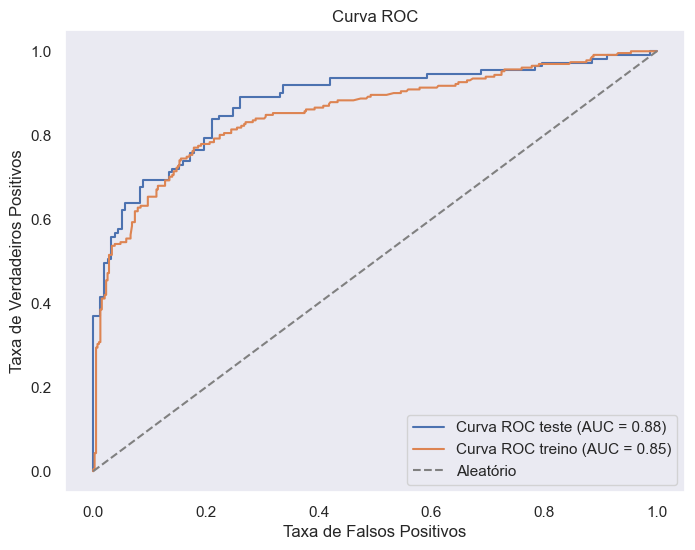

In [ ]:
# Criar o pipeline com o modelo



pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42,probability=True,))
])

# Definir os hiperparâmetros para otimização
param_grid = {
    'classifier__kernel': ['poly', 'rbf', 'sigmoid', 'precomputed'],
    'classifier__degree': randint(1,5),
    'classifier__max_iter': randint(500, 1000),
    'classifier__class_weight': [None, 'balanced'],
    'classifier__C': loguniform(1e-3,1e3),
    'classifier__coef0': randint(-1,4)
    
}

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=kf, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
y_proba_train = best_model.predict_proba(X_train)[:, 1]

# Calcular métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
roc_auct = roc_auc_score(y_train, y_proba_train)
gini = 2 * roc_auc - 1

print("Melhores parâmetros:", grid_search.best_params_)
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Gini: {gini:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fprt, tprt, thresholdst = roc_curve(y_train, y_proba_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC teste (AUC = {roc_auc:.2f})')
plt.plot(fprt, tprt, label=f'Curva ROC treino (AUC = {roc_auct:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Rede Neurais

1. **Perceptron**:

    É a estrutura mais simples de uma Rede Neural, sendo inspirado em 1 neuronio humano. Um perceptron recebe múltiplas entradas, aplica pesos a essas entradas, soma os valores ponderados e passa essa soma através de uma função de ativação para produzir uma saída.
    $$y = \phi \left(\sum_{i=1}^n w_i x_i + b  \right) $$

    onde:
    - $y$ : É a saída do neurônio
    - $\phi$ : É a função de ativação
    - $x_i$ : É o número de entradas
    - $w_i$ : É o peso que multiplica as entradas
    - $b$ : É o bias, ou viés introduzido aleatorio.

2. **Funções de Ativação**:

    - Degrau(Step): 
    $$ \phi(x) = \begin{cases}
    1 & x \geq 0 \\
    0 & x < 0
    \end{cases} $$

    - Sigmoide:
    $$\phi(x) = \frac{1}{1 + e^{-x}}$$

    - ReLU (Rectified Linear Unit):
    $$\phi(x) = max(0, x)$$

    - Identidade:
    $$\phi(x) = x$$

    - Tangante Hiperbolica:
    $$\phi(x) = tanh(x)$$


### Python

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt
from scipy.stats import uniform, loguniform, randint, norm

Fitting 20 folds for each of 10 candidates, totalling 200 fits


c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (196) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores parâmetros: {'classifier__activation': 'relu', 'classifier__alpha': 0.020987942135261253, 'classifier__hidden_layer_sizes': 103, 'classifier__learning_rate': 'adaptive', 'classifier__max_iter': 196, 'classifier__solver': 'adam'}
Precisão: 0.86
Recall: 0.66
F1-Score: 0.74
ROC AUC: 0.88
Gini: 0.76


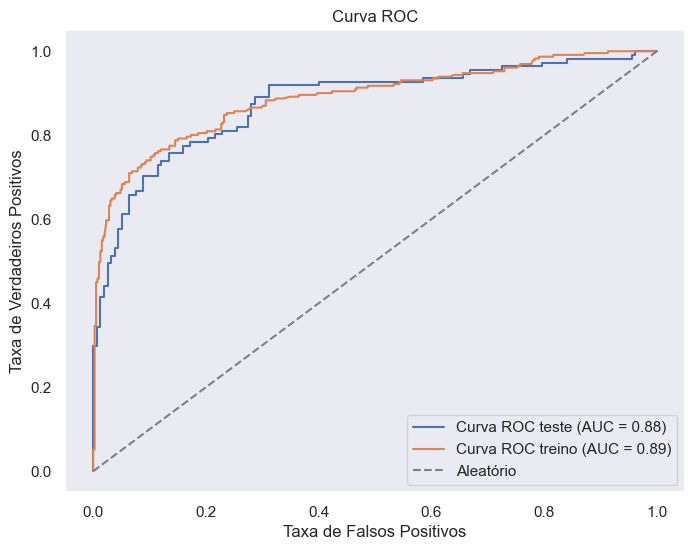

In [ ]:
# Criar o pipeline com o modelo

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state=42,))
])

learning_rate = ['constant', 'invscaling', 'adaptive']

# Definir os hiperparâmetros para otimização
param_grid = {
    'classifier__hidden_layer_sizes': randint(100,200),
    'classifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'classifier__solver': ['lbfgs', 'sgd', 'adam'],
    'classifier__alpha': uniform(loc=0,scale=0.1),
    'classifier__learning_rate': learning_rate,
    'classifier__max_iter': randint(100,300)
    
}

kf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=kf, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
y_proba_train = best_model.predict_proba(X_train)[:, 1]

# Calcular métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
roc_auct = roc_auc_score(y_train, y_proba_train)
gini = 2 * roc_auc - 1

print("Melhores parâmetros:", grid_search.best_params_)
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Gini: {gini:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fprt, tprt, thresholdst = roc_curve(y_train, y_proba_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC teste (AUC = {roc_auc:.2f})')
plt.plot(fprt, tprt, label=f'Curva ROC treino (AUC = {roc_auct:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<Axes: ylabel='Count'>

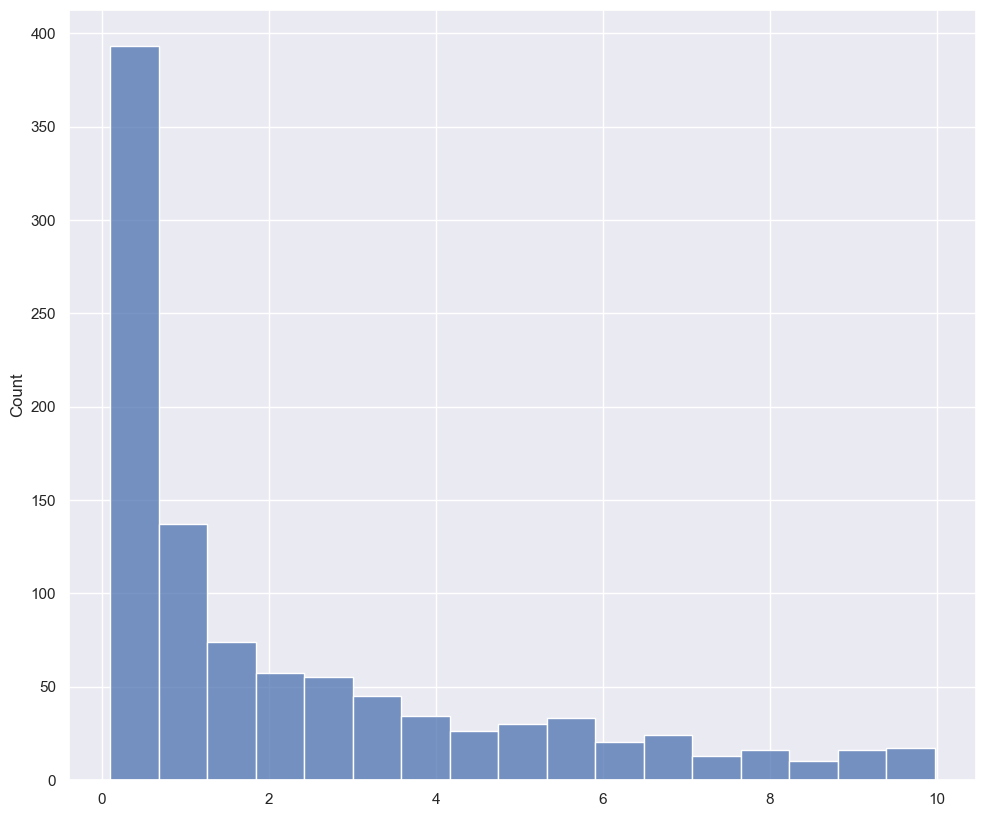

In [ ]:
sns.histplot(loguniform.rvs(1e-1,10,size=1000))

<Axes: ylabel='Count'>

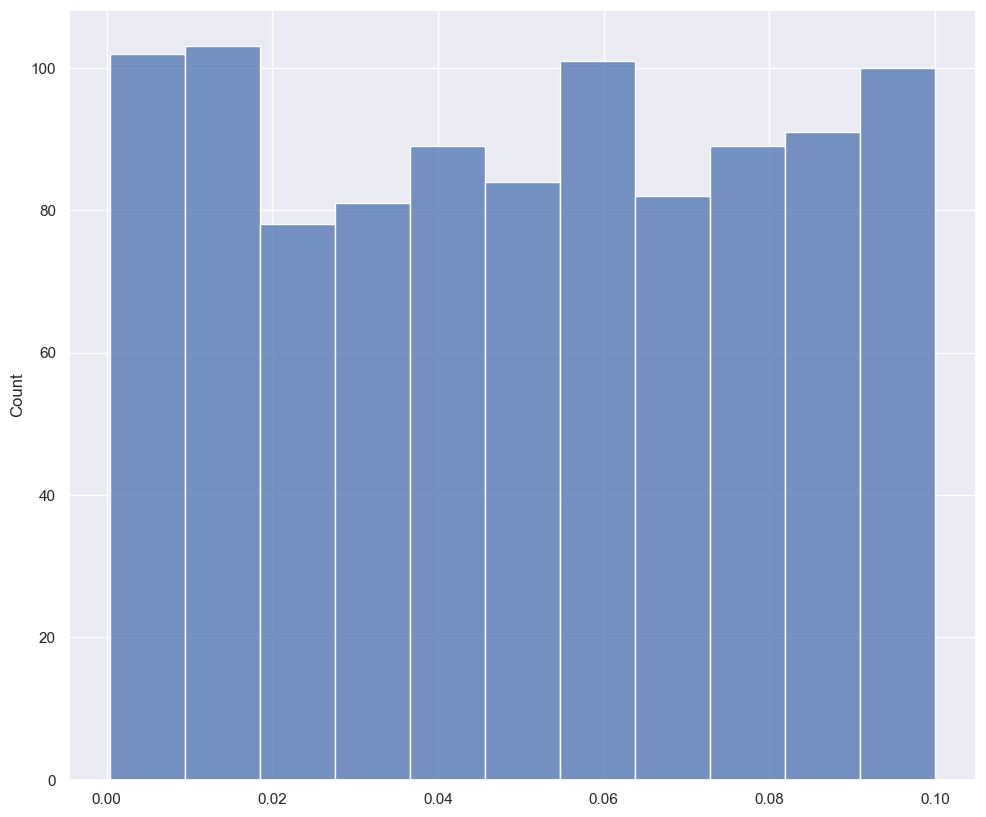

In [ ]:
sns.histplot(uniform.rvs(loc=0,scale=0.1,size=1000))

In [ ]:
df_final = X.copy()
df_final['y_probf'] = best_model.predict_proba(X)[:,1]
df_final['target'] = y
dF_ks = ks(df_final, 'target', 'y_probf')
df_ks

KS is 62.8% at decile 4


min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.798521  0.947137      86          3     25.15%         0.55%   
2       0.654744  0.795977      80          9     23.39%         1.64%   
3       0.551570  0.654607      58         31     16.96%         5.65%   
4       0.428141  0.551027      30         57      8.77%        10.38%   
5       0.283857  0.425704      34         57      9.94%        10.38%   
6       0.190409  0.279898      11         78      3.22%        14.21%   
7       0.160772  0.190408      14         75      4.09%        13.66%   
8       0.139036  0.158646       8         81      2.34%        14.75%   
9       0.124743  0.138977      17         72      4.97%        13.11%   
10      0.041198  0.124416       4         86      1.17%        15.66%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             25.15%            0.55%  24.6  
2             48.54%            2.19%  46.4  
3             65.50%            7.83%  57.7  
4             74.27%           18.21%  56.1  
5             84.21%           28.60%  55.6  
6             87.43%           42.81%  44.6  
7             91.52%           56.47%  35.1  
8             93.86%           71.22%  22.6  
9             98.83%           84.34%  14.5  
10           100.00%          100.00%   0.0

Média da Precisão: 0.8164210727893932
Média do Recall: 0.7951983883201524
Média do AUC:  0.9
Média do AUC (Train):  0.9
Média do Gini: 0.7531605550837718


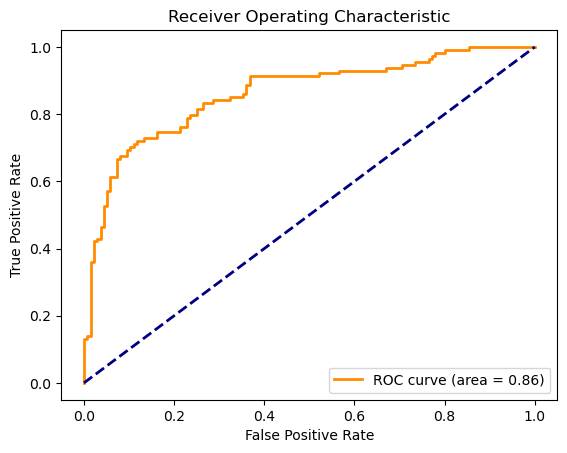

In [ ]:
from sklearn.datasets import load_iris, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


# Criando um conjunto de dados fictício
df = pd.read_csv(r"C:\Users\vgflg\OneDrive\Documentos\python\datasets\exercicios_prova\classificacao_Q2.csv")
X = df.drop(columns=['target'])
y = df['target']
# Transformando em DataFrame para melhor visualização
# X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])


# Configurar o k-fold
kf = KFold(n_splits=10, shuffle=False)

# Inicializar métricas
conf_matrices = []
precisions = []
recalls = []
aucs = []
aucs_Train = []
ginis = []

# Loop pelos folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Treinar o modelo
    clf = LogisticRegression(C=0.1, penalty='l2', random_state=42)
    clf.fit(X_train, y_train)
    
    # Previsões
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    
    # Matriz de confusão
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Precisão e recall
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
    # AUC e Gini
    auc_score = roc_auc_score(y_test, y_proba[:, 1])
    aucs.append(auc_score)

    auc_score_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
    aucs_Train.append(auc_score_train)

    ginis.append(2 * auc_score - 1)

# Exibir métricas médias
print("Média da Precisão:", np.mean(precisions))
print("Média do Recall:", np.mean(recalls))
print(f"Média do AUC:  {np.mean(aucs):.1f}")
print(f"Média do AUC (Train):  {np.mean(aucs_Train):.1f}")
print("Média do Gini:", np.mean(ginis))

# Plotar a curva ROC do último fold
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

![{492678D7-4446-4362-A8FE-6F0CEC78B398}.png](attachment:{492678D7-4446-4362-A8FE-6F0CEC78B398}.png)

In [ ]:
from sklearn.datasets import load_iris, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


# Criando um conjunto de dados fictício
df = pd.read_csv(r"C:\Users\Pichau\OneDrive\Documentos\python\datasets\Nova pasta\classificacao_Q2.csv")
X = df.drop(columns=['target'])
y = df['target']
df.head()


v_1      v_2      v_3      v_4      v_5      v_6      v_7      v_8  \
0 -1.39917  0.96108 -0.36145  0.26092  2.78953 -1.55046 -0.79886  0.24304   
1 -2.48564  1.24529 -0.39431  1.06648  1.71957 -0.60296 -2.35698 -2.31878   
2 -0.57025  0.65495 -0.73706  0.22444 -0.44094 -0.42596  0.44267 -1.74196   
3  2.10165  1.46236 -0.25678  2.58908 -3.40158  2.43561  0.74701 -0.65229   
4  3.01588 -2.50913 -2.01442  2.10296 -3.05465  5.38227  0.46846  1.57586   

       v_9     v_10     v_11     v_12     v_13  target  
0  1.51733 -0.03357 -1.51127 -0.97444 -0.01934       0  
1  0.95555 -2.00420 -0.75294 -3.64680 -0.55923       0  
2 -0.06599 -0.36783  0.93065 -0.72392  0.37139       0  
3 -0.45497 -1.57951  2.07367  1.86435 -0.37664       1  
4  3.02176 -0.86271 -1.14418 -0.89712  0.61823       1

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Treinar o modelo
clf = LogisticRegression(C=1e-5, penalty='l2', random_state=42)
clf.fit(X_train, y_train)


# AUC e Gini
auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

auc_score_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])

# Plotar a curva ROC do último fold
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f"Média do AUC:  {auc_score:.4f}")
print(f"Média do AUC (Train):  {auc_score_train:.4f}")
print(f"roc auc: {roc_auc:.4f}")

Média do AUC:  0.8421
Média do AUC (Train):  0.8549
roc auc: 0.8421


In [ ]:
from sklearn.datasets import load_iris, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


# Criando um conjunto de dados fictício
X, y = make_classification(n_samples=10000000, n_features=20, n_informative=5, n_redundant=5, random_state=42)
# Transformando em DataFrame para melhor visualização
# X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Exibir métricas médias
display(clf)

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.datasets import load_iris, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve, log_loss
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv(r"C:\Users\Pichau\OneDrive\Documentos\python\datasets\Nova pasta\classificacao_Q1.csv")
df.head()

v_1      v_2      v_3      v_4      v_5      v_6      v_7      v_8  \
0 -1.79796 -1.75901 -2.14257 -0.01878 -0.58601 -3.08224 -1.71369  1.41805   
1 -2.78612 -1.60622 -4.05247  3.33814  1.44255 -3.95343 -3.32328  0.71019   
2 -1.31957  2.61125 -0.99663  0.34752  0.85253  4.22652  0.84765  0.88530   
3 -3.26219 -2.11510  0.68081 -0.49290 -2.45122 -2.37668 -0.00338  3.95559   
4  5.26181  1.85527 -2.29242 -0.86763  0.11625 -2.17675 -1.72692 -2.34726   

       v_9     v_10     v_11     v_12  target  
0  2.29783  1.11745 -3.43483  1.94926       0  
1  2.31973  0.57596 -4.22278  0.51171       0  
2 -1.01460  1.03488 -0.84593  2.64307       1  
3  1.42793  1.68710 -1.35533  2.82004       0  
4  1.98107 -4.58177 -2.26649 -3.33875       1

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
# Configurar o k-fold
kf = KFold(n_splits=7, shuffle=False)
# Define a validacão cruzada sequencial com 5 folds (útil para dados temporais)
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=7)


# Inicializar métricas
log_loss_Train = []
log_loos_Test = []

# Loop pelos folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Treinar o modelo
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    clf.fit(X_train, y_train)
    
    # Previsões
    y_pred = clf.predict_proba(X_test)
    y_pred_Train = clf.predict_proba(X_train)
    
    # Matriz de confusão
    ll_train= log_loss(y_train, y_pred_Train)
    log_loss_Train.append(ll_train)

    ll_test = log_loss(y_test, y_pred)
    log_loos_Test.append(ll_test)

# Exibir métricas médias

print(f"MSE médio Train: {np.mean(log_loss_Train):.2f}")
print(f"MSE médio Test: {np.mean(log_loos_Test):.2f}")

MSE médio Train: 0.27
MSE médio Test: 0.32


In [ ]:
X = df.drop(columns=['target'])
y = df['target']
# Configurar o k-fold
kf = KFold(n_splits=7, shuffle=False)

# Inicializar métricas
log_loss_Train = []
log_loos_Test = []

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

cv = cross_validate(clf, X, y, cv=kf, scoring='neg_log_loss', return_train_score=True)
log_loss_Train = -cv['train_score']
log_loos_Test = -cv['test_score']
print(f"MSE médio Train: {np.mean(log_loss_Train):.2f}")
print(f"MSE médio Test: {np.mean(log_loos_Test):.2f}")

MSE médio Train: 0.27
MSE médio Test: 0.32


In [ ]:
cv

{'fit_time': array([0.00954556, 0.00903678, 0.00730515, 0.00700736, 0.00852704,
        0.00702763, 0.00651789]),
 'score_time': array([0.00551677, 0.00150394, 0.00201273, 0.00100088, 0.00101161,
        0.00101089, 0.00115824]),
 'test_score': array([-0.34377049, -0.35030852, -0.30553635, -0.34064259, -0.34357783,
        -0.2482155 , -0.30307331]),
 'train_score': array([-0.26697935, -0.26307539, -0.26754207, -0.26539411, -0.26075272,
        -0.28104   , -0.27022417])}

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
# Configurar o k-fold
kf = KFold(n_splits=7, shuffle=False)

# Inicializar métricas
log_loss_Train = []
log_loos_Test = []

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

cv = cross_validate(clf, X, y, cv=7, scoring='neg_log_loss', return_train_score=True)
log_loss_Train = -cv['train_score']
log_loos_Test = -cv['test_score']
print(f"MSE médio Train: {np.mean(log_loss_Train):.2f}")
print(f"MSE médio Test: {np.mean(log_loos_Test):.2f}")

MSE médio Train: 0.27
MSE médio Test: 0.33


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import log_loss
import numpy as np

# Configurar o modelo de árvore de decisão
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Configurar a validação cruzada sequencial com 7 folds
tscv = TimeSeriesSplit(n_splits=7)
# Configurar o k-fold
kf = KFold(n_splits=7, shuffle=False)
# Inicializar listas para armazenar os resultados de log loss
log_loss_train = []
log_loss_val = []

# Loop pelos folds
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Treinar o modelo
    clf.fit(X_train, y_train)
    
    # Fazer previsões
    y_train_pred = clf.predict_proba(X_train)
    y_val_pred = clf.predict_proba(X_val)
    
    # Calcular log loss para treino e validação
    log_loss_train.append(log_loss(y_train, y_train_pred))
    log_loss_val.append(log_loss(y_val, y_val_pred))

# Calcular as médias de log loss
mean_log_loss_train = np.mean(log_loss_train)
mean_log_loss_val = np.mean(log_loss_val)

# Exibir os resultados arredondados para 2 casas decimais
print(f"Média do Log Loss (Treino): {mean_log_loss_train:.3f}")
print(f"Média do Log Loss (Validação): {mean_log_loss_val:.3f}")

Média do Log Loss (Treino): 0.268
Média do Log Loss (Validação): 0.319
